In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import pandas_profiling
import missingno
import xgboost as xgb
import lightgbm as lgb

import reverse_geocoder as rg
import pprint

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [6]:
#checking for unique values

df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
#removing ploicy number / incident location since every row has a unique value which is not useful and _c39 which has only null values.

In [8]:
df.drop(["policy_number", "incident_location", "_c39"], axis=1, inplace=True)

In [9]:
df.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_availa

In [11]:
#separating column with Object data type and numerical data type


# getting list of all object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n ",object_datatype)

# getting the list of all numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_datatype)

Object Data Type Columns are:
  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [12]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

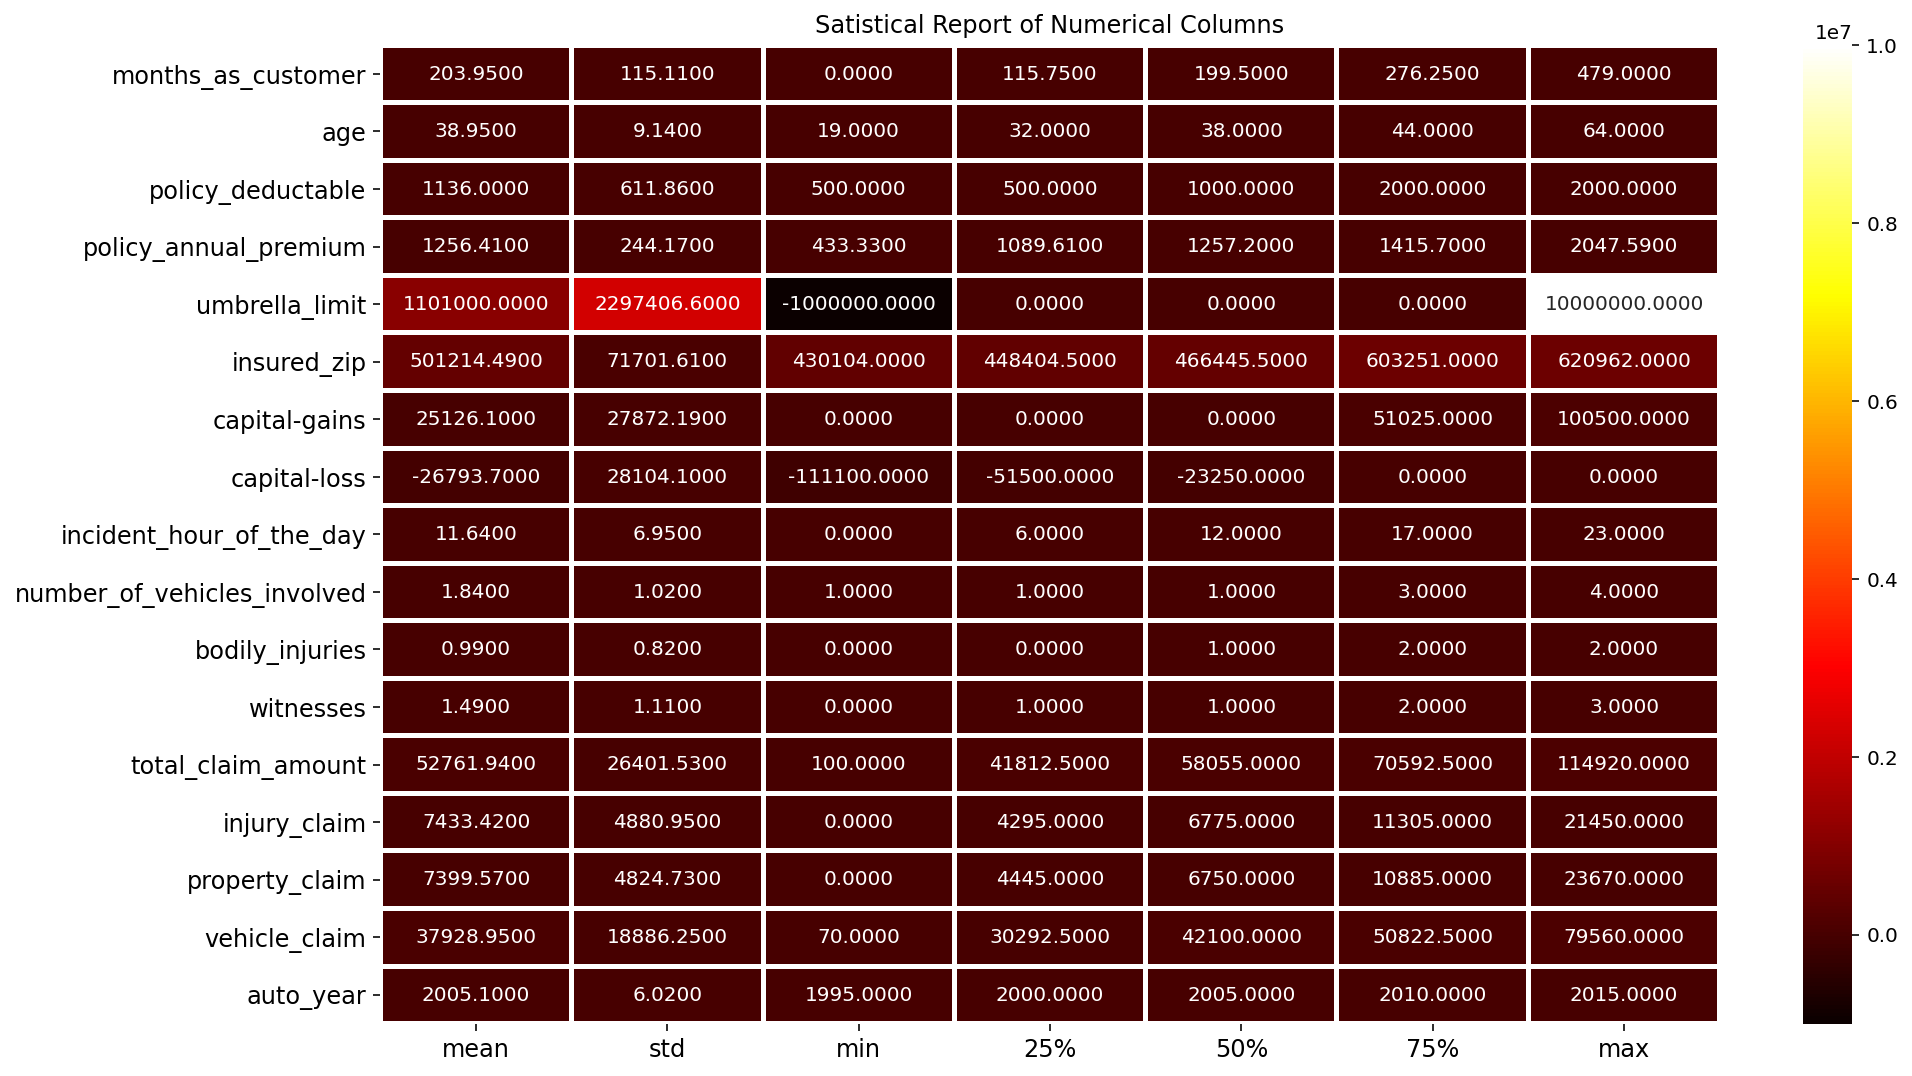

In [13]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="hot")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [14]:
#So the column that stands out the most in terms of values that are present in the column is umbrella_limit. We can see that this particular column has numeric data higher than all the remaining columns present in our entire dataset.

In [15]:
df.describe(include="all").T

count unique                      top freq  \
months_as_customer           1000.0    NaN                      NaN  NaN   
age                          1000.0    NaN                      NaN  NaN   
policy_bind_date               1000    951               01-01-2006    3   
policy_state                   1000      3                       OH  352   
policy_csl                     1000      3                  250/500  351   
policy_deductable            1000.0    NaN                      NaN  NaN   
policy_annual_premium        1000.0    NaN                      NaN  NaN   
umbrella_limit               1000.0    NaN                      NaN  NaN   
insured_zip                  1000.0    NaN                      NaN  NaN   
insured_sex                    1000      2                   FEMALE  537   
insured_education_level        1000      7                       JD  161   
insured_occupation             1000     14        machine-op-inspct   93   
insured_hobbies                1000     20                  reading   64   
insured_relationship           1000      6                own-child  183   
capital-gains                1000.0    NaN                      NaN  NaN   
capital-loss                 1000.0    NaN                      NaN  NaN   
incident_date                  1000     60               02-02-2015   28   
incident_type                  1000      4  Multi-vehicle Collision  419   
collision_type                 1000      4           Rear Collision  292   
incident_severity              1000      4             Minor Damage  354   
authorities_contacted          1000      5                   Police  292   
incident_state                 1000      7                       NY  262   
incident_city                  1000      7              Springfield  157   
incident_hour_of_the_day     1000.0    NaN                      NaN  NaN   
number_of_vehicles_involved  1000.0    NaN                      NaN  NaN   
property_damage                1000      3                        ?  360   
bodily_injuries              1000.0    NaN                      NaN  NaN   
witnesses                    1000.0    NaN                      NaN  NaN   
police_report_available        1000      3                       NO  343   
total_claim_amount           1000.0    NaN                      NaN  NaN   
injury_claim                 1000.0    NaN                      NaN  NaN   
property_claim               1000.0    NaN                      NaN  NaN   
vehicle_claim                1000.0    NaN                      NaN  NaN   
auto_make                      1000     14                     Saab   80   
auto_model                     1000     39                      RAM   43   
auto_year                    1000.0    NaN                      NaN  NaN   
fraud_reported                 1000      2                        N  753   

                                   mean             std        min        25%  \
months_as_customer              203.954      115.113174        0.0     115.75   
age                              38.948        9.140287       19.0       32.0   
policy_bind_date                    NaN             NaN        NaN        NaN   
policy_state                        NaN             NaN        NaN        NaN   
policy_csl                          NaN             NaN        NaN        NaN   
policy_deductable                1136.0      611.864673      500.0      500.0   
policy_annual_premium        1256.40615      244.167395     433.33  1089.6075   
umbrella_limit                1101000.0  2297406.598118 -1000000.0        0.0   
insured_zip                  501214.488    71701.610941   430104.0   448404.5   
insured_sex                         NaN             NaN        NaN        NaN   
insured_education_level             NaN             NaN        NaN        NaN   
insured_occupation                  NaN             NaN        NaN        NaN   
insured_hobbies                     NaN             NaN        NaN        NaN   
insured

In [16]:
#In this dataset we have the details of an automobile insurance policy along with the customer details. It also has the details of the accident on the basis of which the insurance claims have been made.

In [17]:
#differentiating Feature Columns and Target Label.


#Feature columns:

#Company's data for insurance claim policy: months_as_customer, age, policy_number(dropped), policy_bind_date, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit
#Personal details of the customers: insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital- gains, capital-loss.
#Details of the incident: incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location(dropped), incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_amount_claimed, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year


#Target label:

#fraud_reported : Y-YES / N-NO

In [18]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("-"*75)

policy_bind_date
01-01-2006    3
05-08-1992    3
28-04-1992    3
03-01-2004    2
29-09-1999    2
             ..
20-11-2010    1
07-09-2006    1
25-11-2002    1
04-01-2009    1
28-01-2003    1
Name: policy_bind_date, Length: 951, dtype: int64
---------------------------------------------------------------------------
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------------------------------------------------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------------------------------------------------------------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
---------------------------------------------------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
--------------

In [19]:
#Checking the number of rows covered by all the unique values present in our object data type columns. 

#My observations from this are:

#policy_bind_date has date related data
#incident_date again has date related data
#These two columns are marked as object data type but they hold date related information and will need to be handled accordingly.

#Also we see rows that are filled with a "?" data in the below columns:

#collision_type
#property_damage
#police_report_available

#So we will need to name something meangingful to these values present in above 3 columns.

In [20]:
df[object_datatype].nunique().to_frame("Unique Values")

Unique Values
policy_bind_date                   951
policy_state                         3
policy_csl                           3
insured_sex                          2
insured_education_level              7
insured_occupation                  14
insured_hobbies                     20
insured_relationship                 6
incident_date                       60
incident_type                        4
collision_type                       4
incident_severity                    4
authorities_contacted                5
incident_state                       7
incident_city                        7
property_damage                      3
police_report_available              3
auto_make                           14
auto_model                          39
fraud_reported                       2

In [21]:
df[number_datatype].nunique().to_frame("Unique Values")

Unique Values
months_as_customer                     391
age                                     46
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
capital-gains                          338
capital-loss                           354
incident_hour_of_the_day                24
number_of_vehicles_involved              4
bodily_injuries                          3
witnesses                                4
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_year                               21

In [22]:
#Pre Processing Data

In [23]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [24]:
# dropping the original Date columns after separating the desired outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [26]:
# replacing the "?" filled rows with a meaningful name of "questionable"
df['collision_type'] = df['collision_type'].replace('?', 'questionable')
df['property_damage'] = df['property_damage'].replace('?', 'questionable')
df['police_report_available'] = df['police_report_available'].replace('?', 'questionable')


#replaced all "?" as "questionable"

In [27]:
# cheking for any missing data and if yes then it's percentage
for col in df:
    percentage = np.round((df[col].isnull().sum()/1000)*100, 2)
    print(col, ":".format(), percentage, '%')

months_as_customer : 0.0 %
age : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_hour_of_the_day : 0.0 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
policy_bind_Day : 0.0 %
policy_bind_Month : 0.0 %
policy_bind_Year : 0.0 %
incident_Day : 0.0 %
incident_Month : 0.0 %
incident_Year : 0.0 %


In [30]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim        

In [31]:
#Removing incident year column since the data belongs to one particular year its not going to be useful when we already segregated the data with month.

In [32]:
df.drop("incident_Year", axis=1, inplace=True)

# Visualization

Single digit category column name: fraud_reported


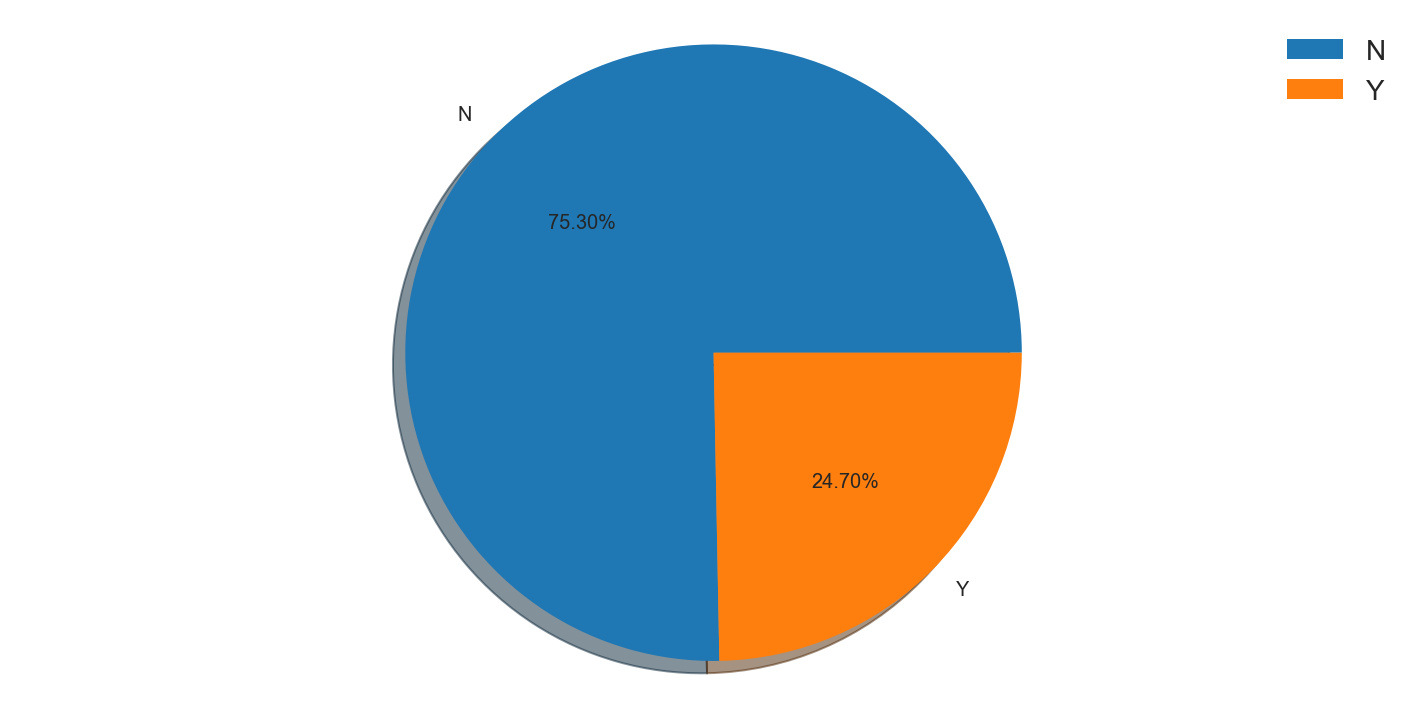

Single digit category column name: insured_sex


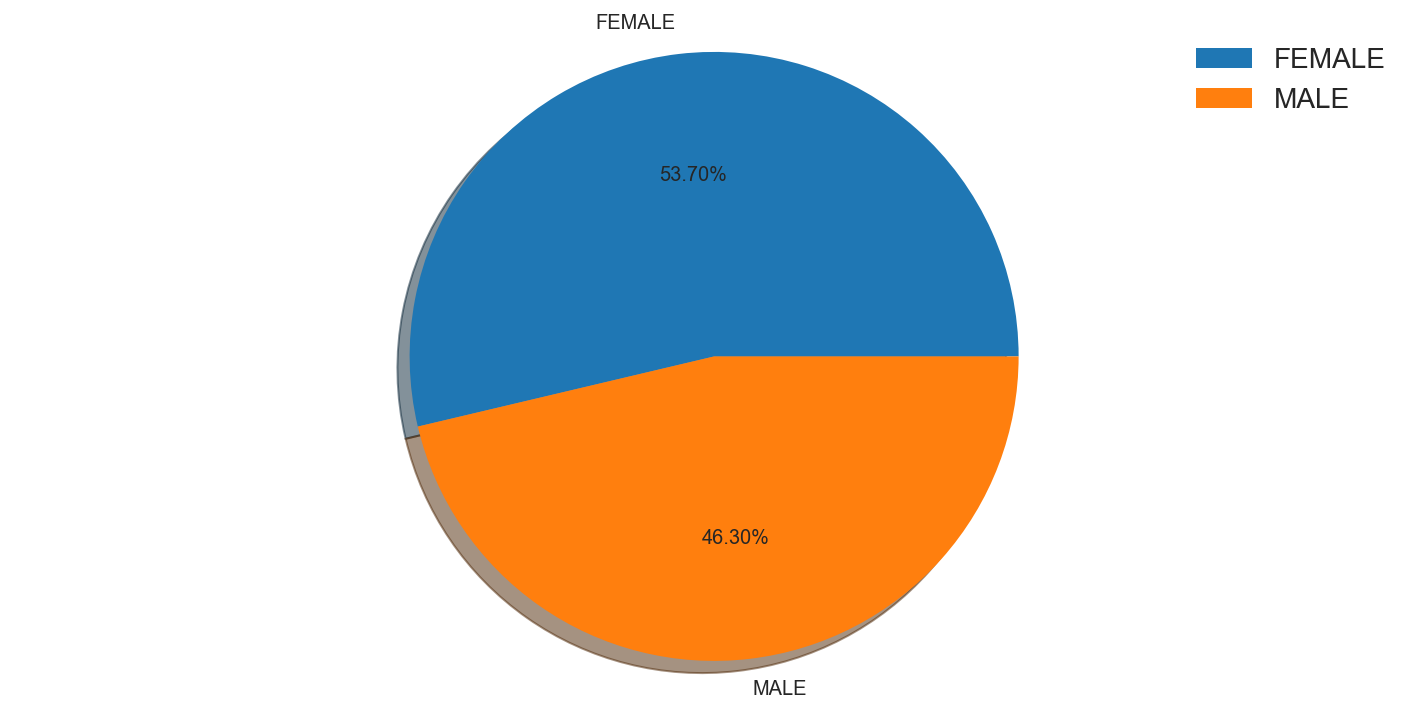

Single digit category column name: policy_state


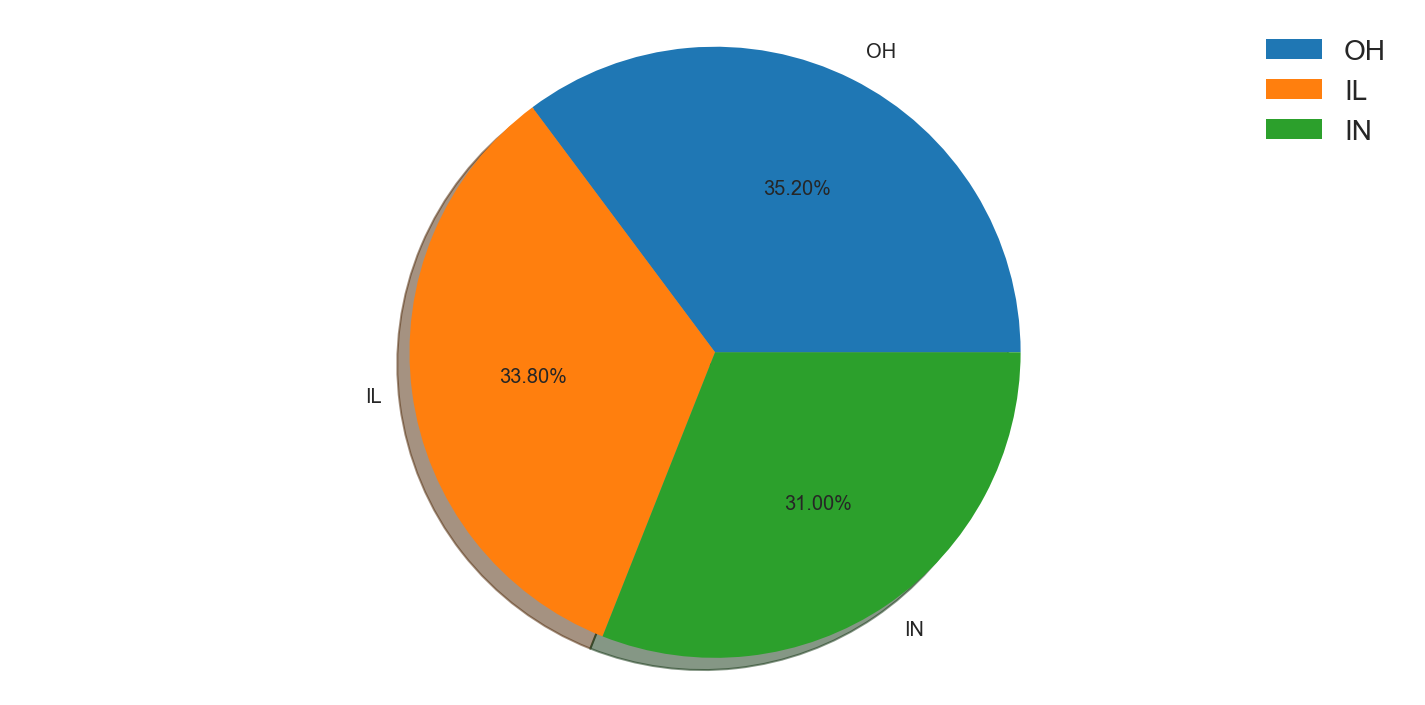

Single digit category column name: policy_csl


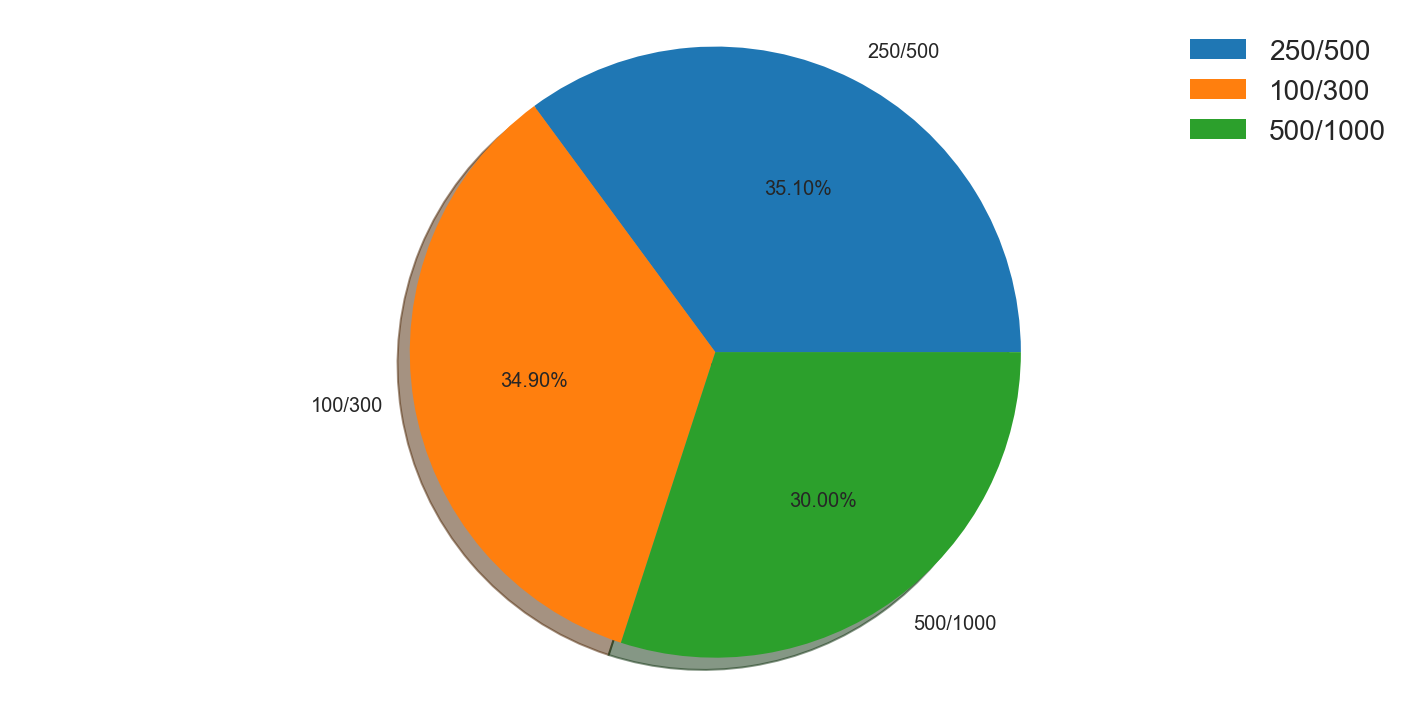

Single digit category column name: policy_deductable


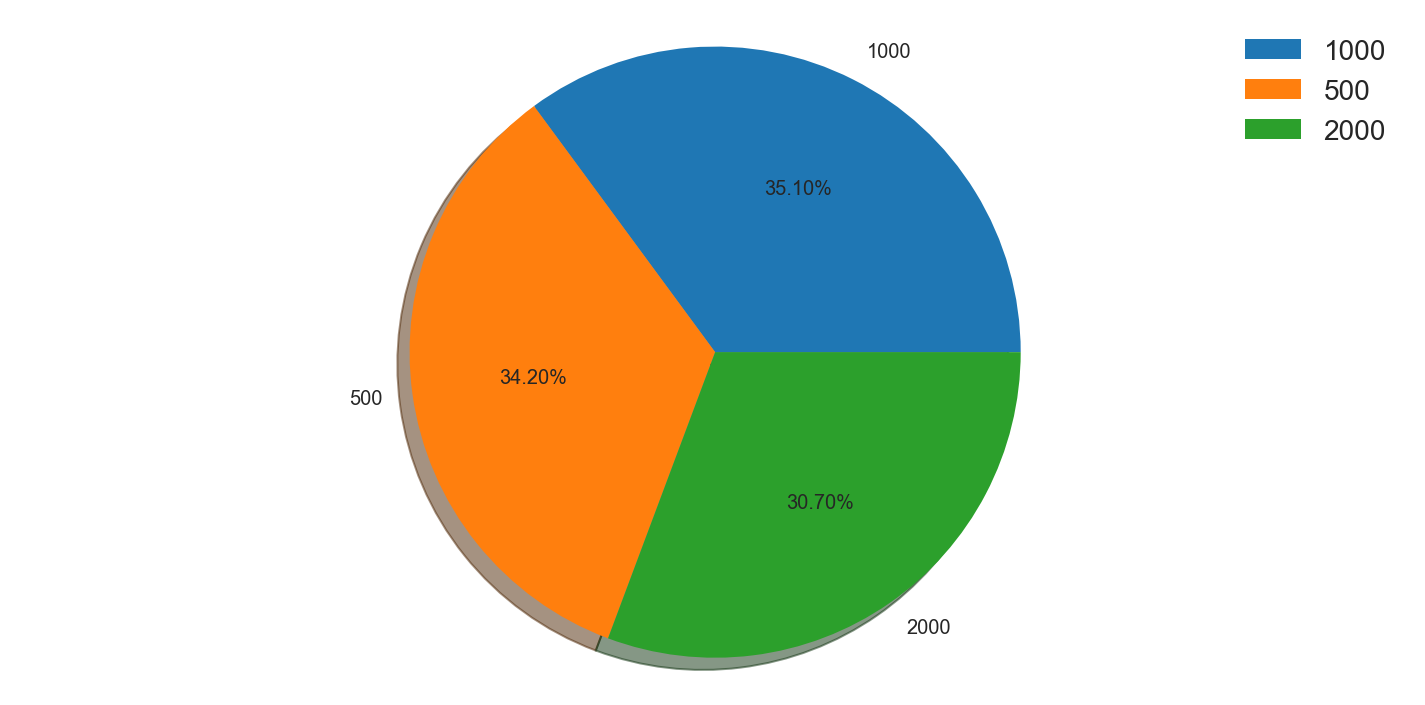

Single digit category column name: bodily_injuries


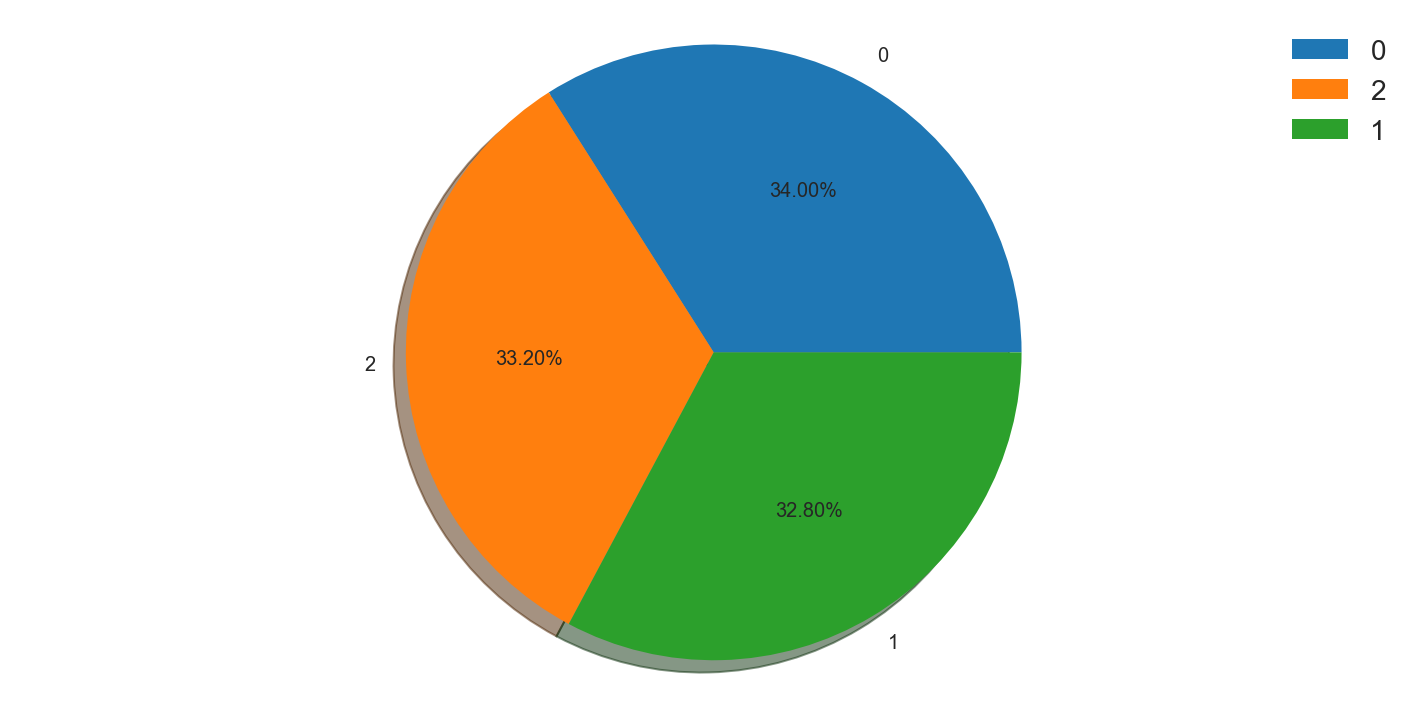

Single digit category column name: police_report_available


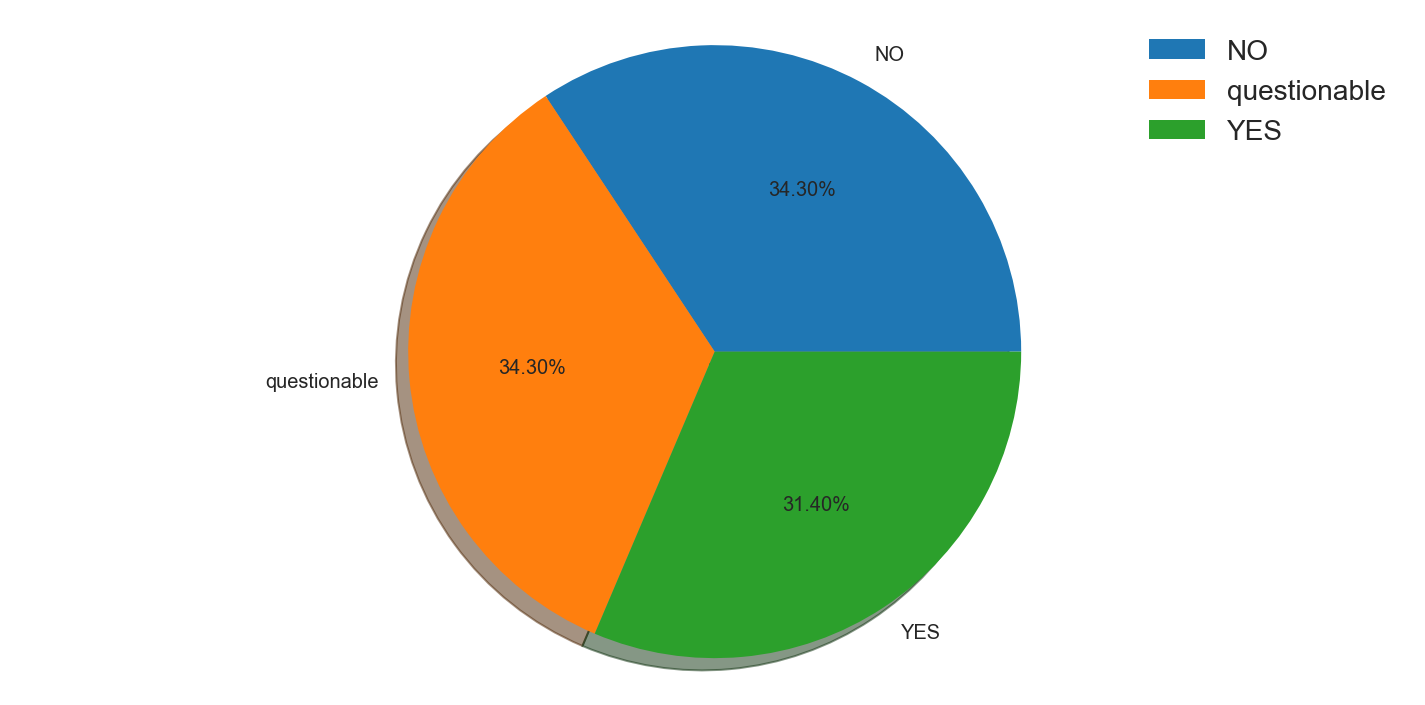

Single digit category column name: property_damage


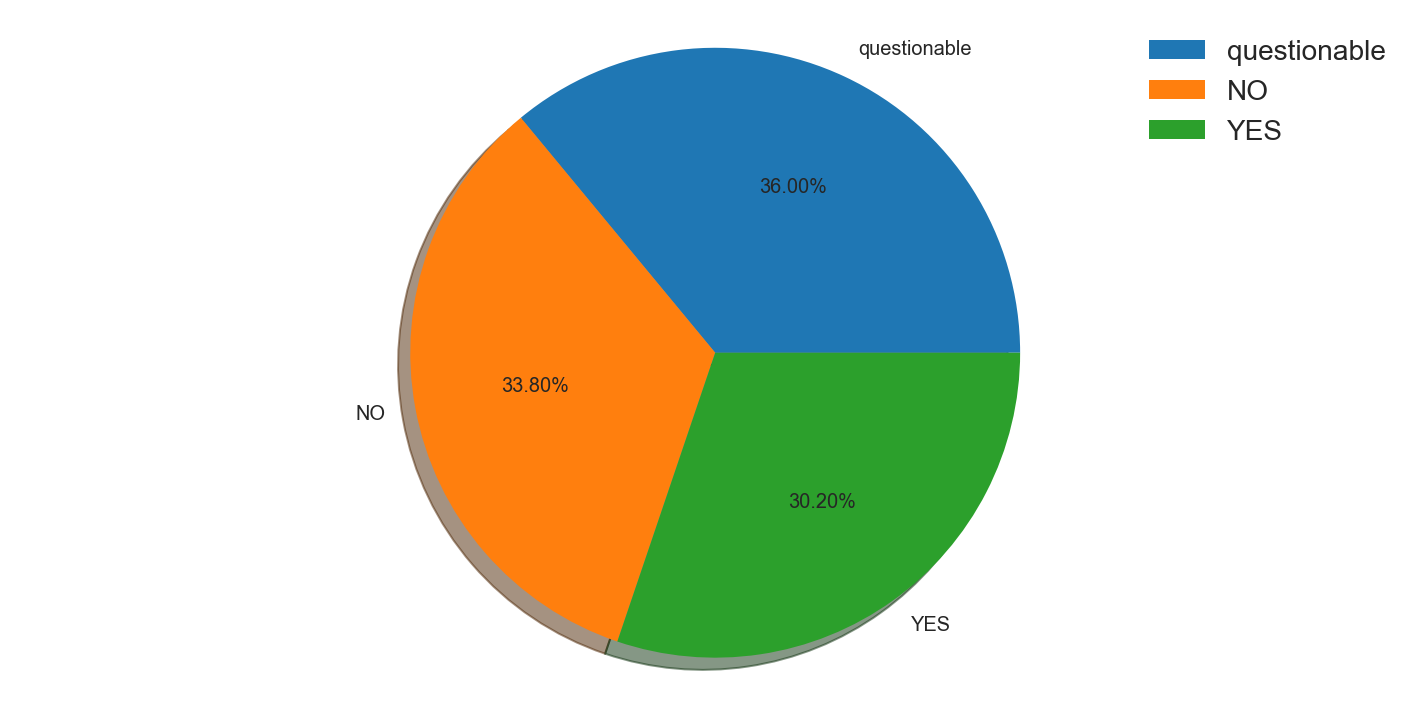

Single digit category column name: incident_type


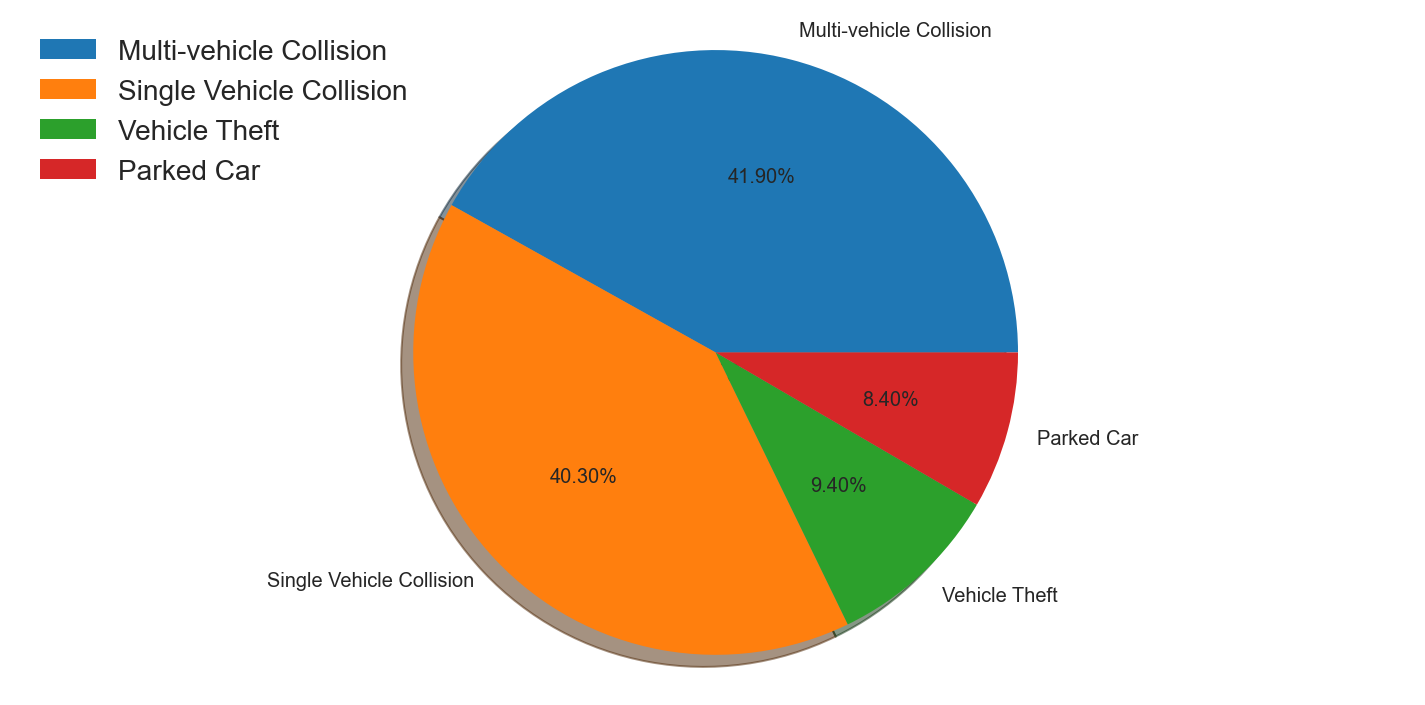

Single digit category column name: collision_type


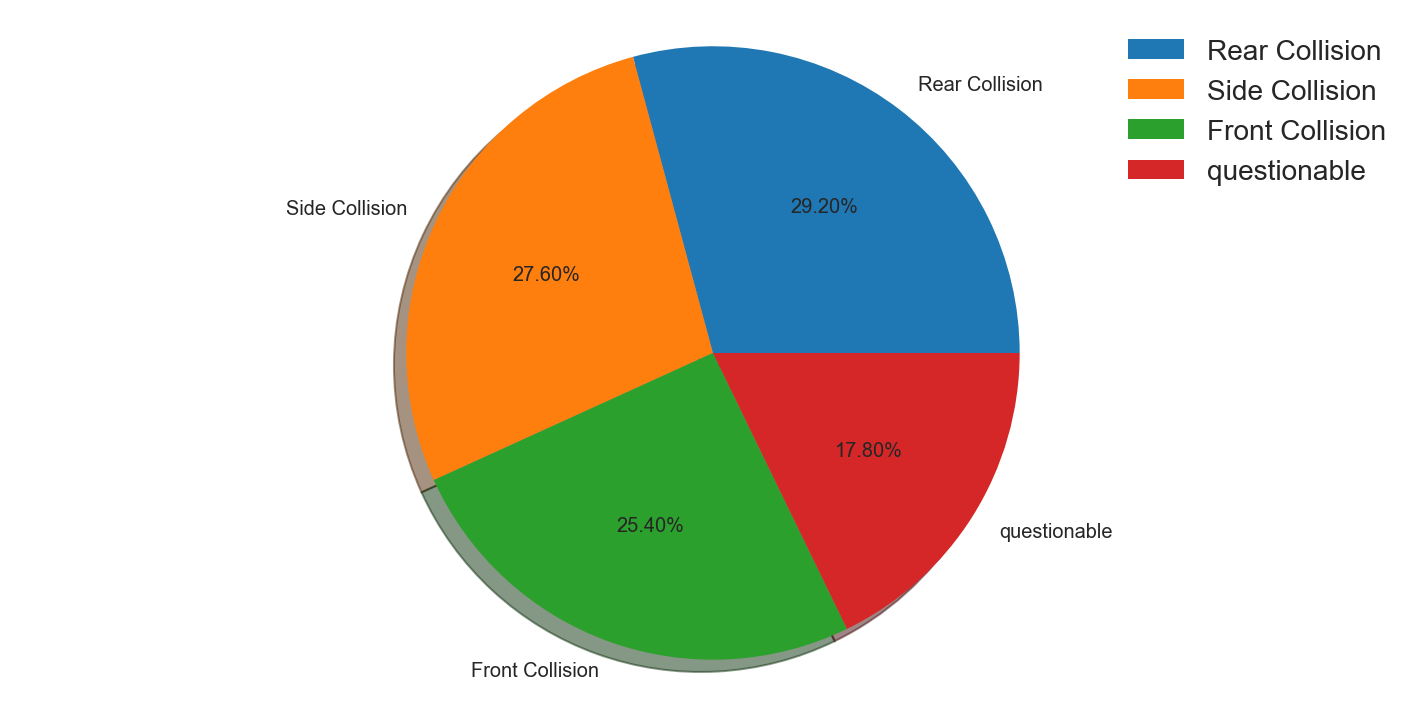

Single digit category column name: incident_severity


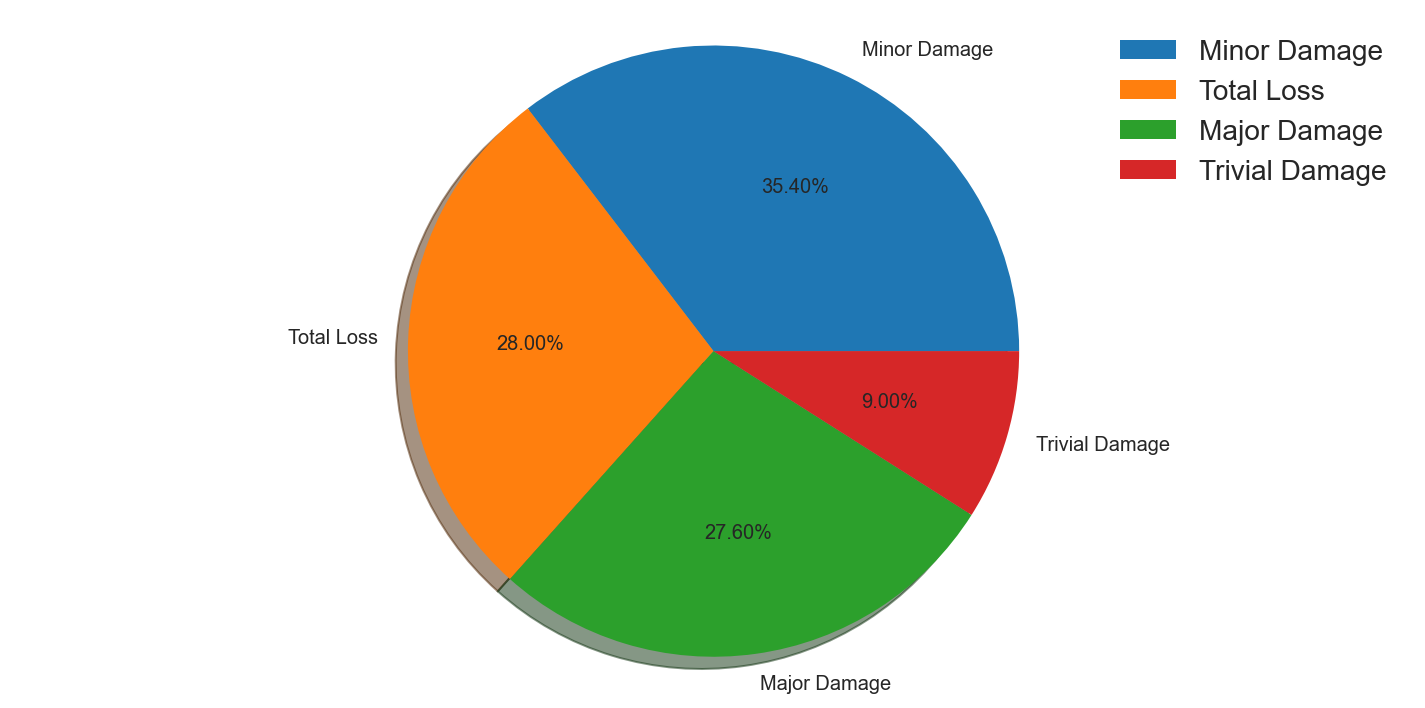

Single digit category column name: number_of_vehicles_involved


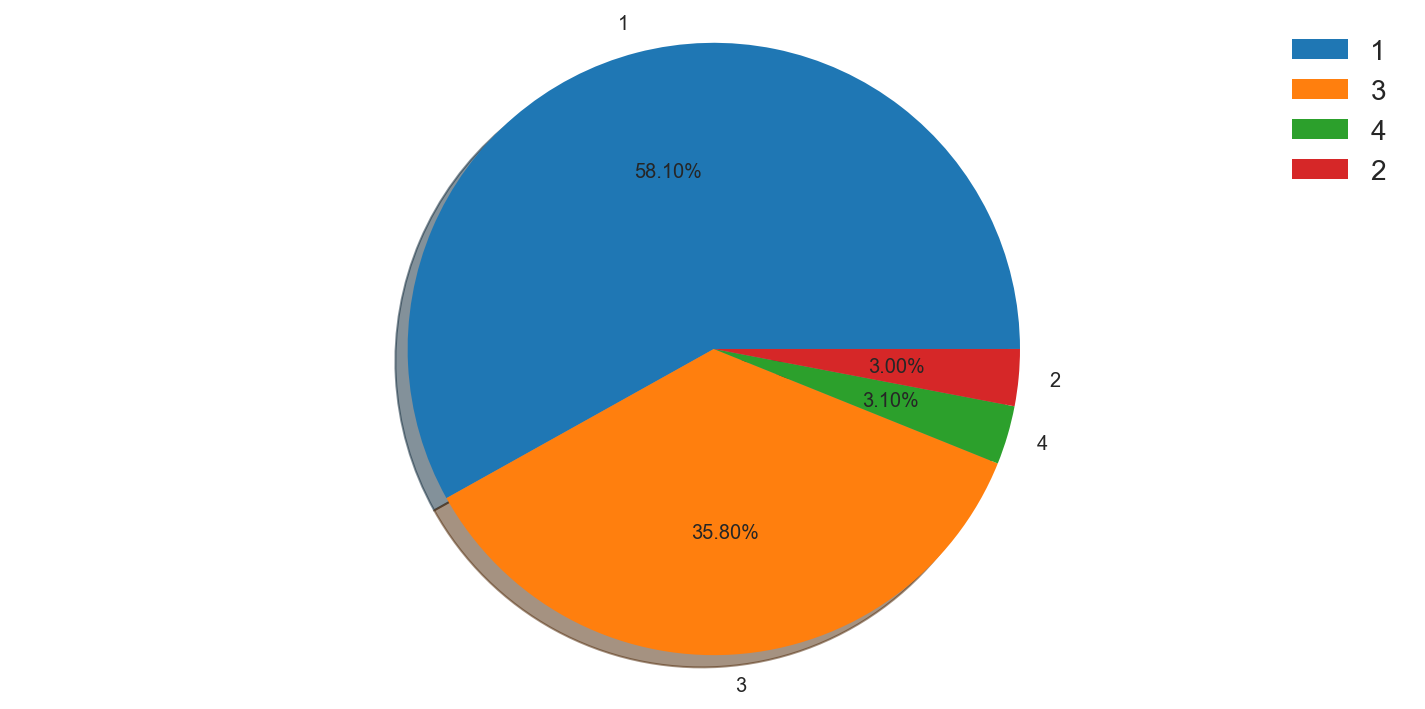

Single digit category column name: witnesses


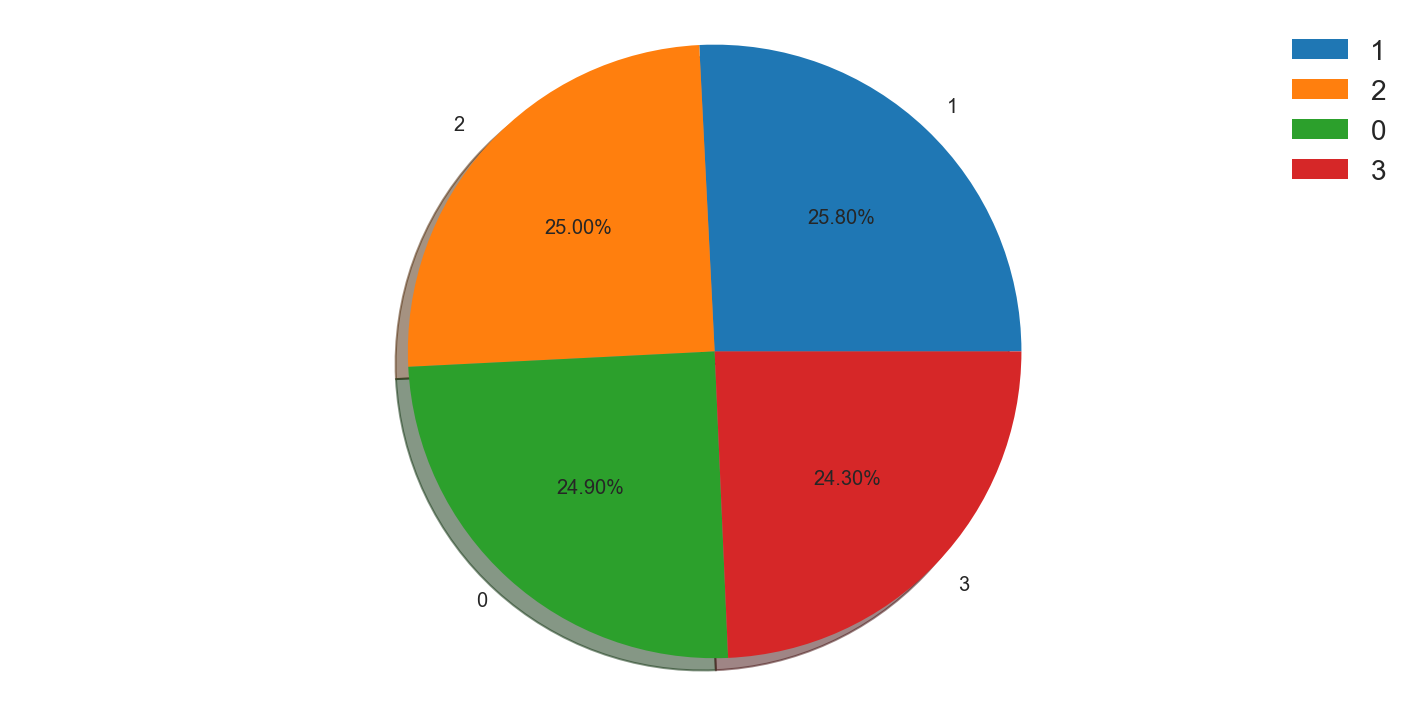

Single digit category column name: authorities_contacted


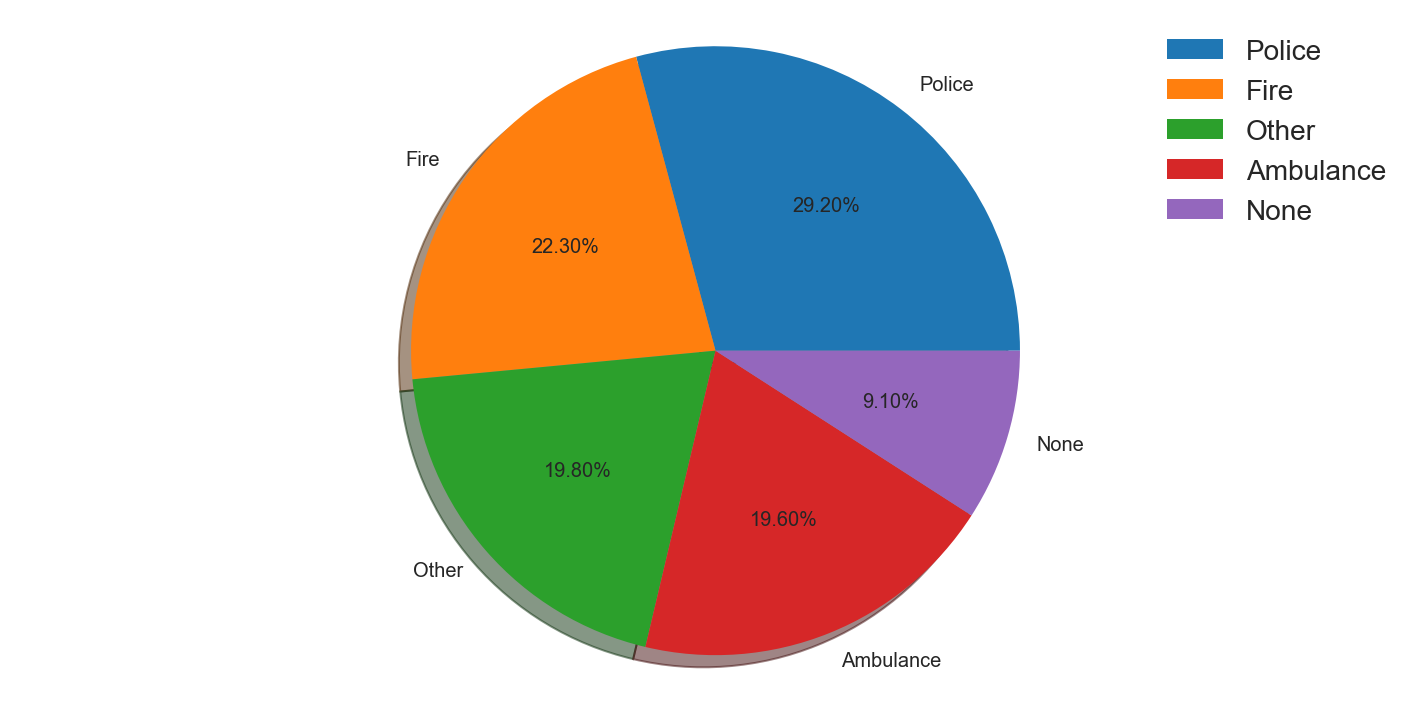

Single digit category column name: insured_relationship


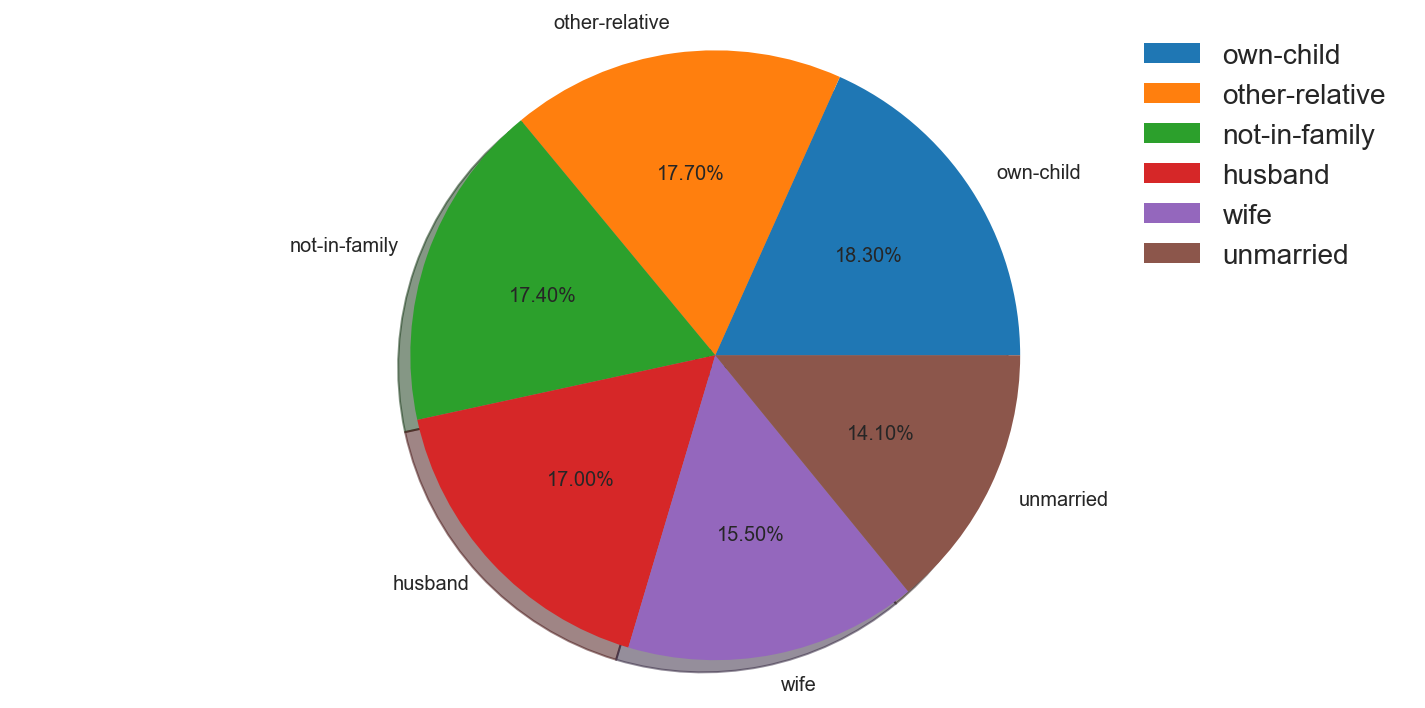

Single digit category column name: insured_education_level


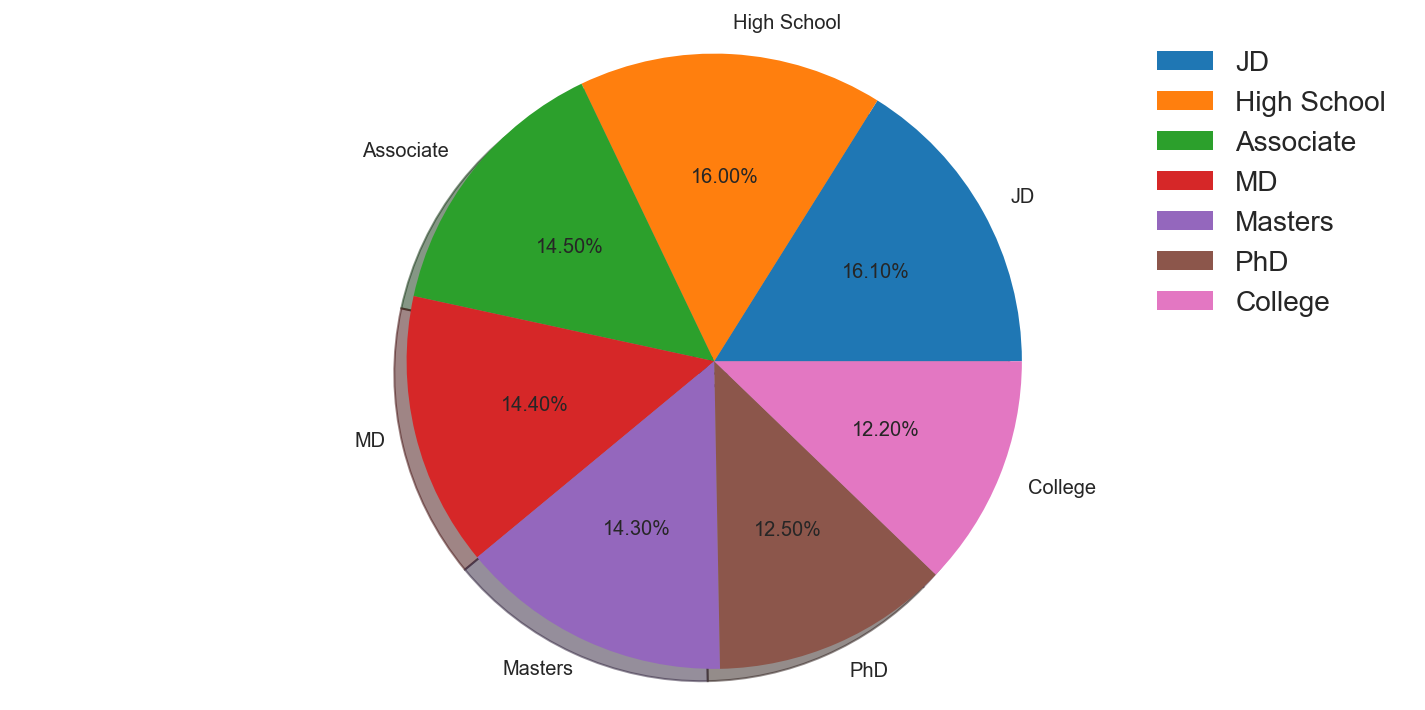

Single digit category column name: incident_state


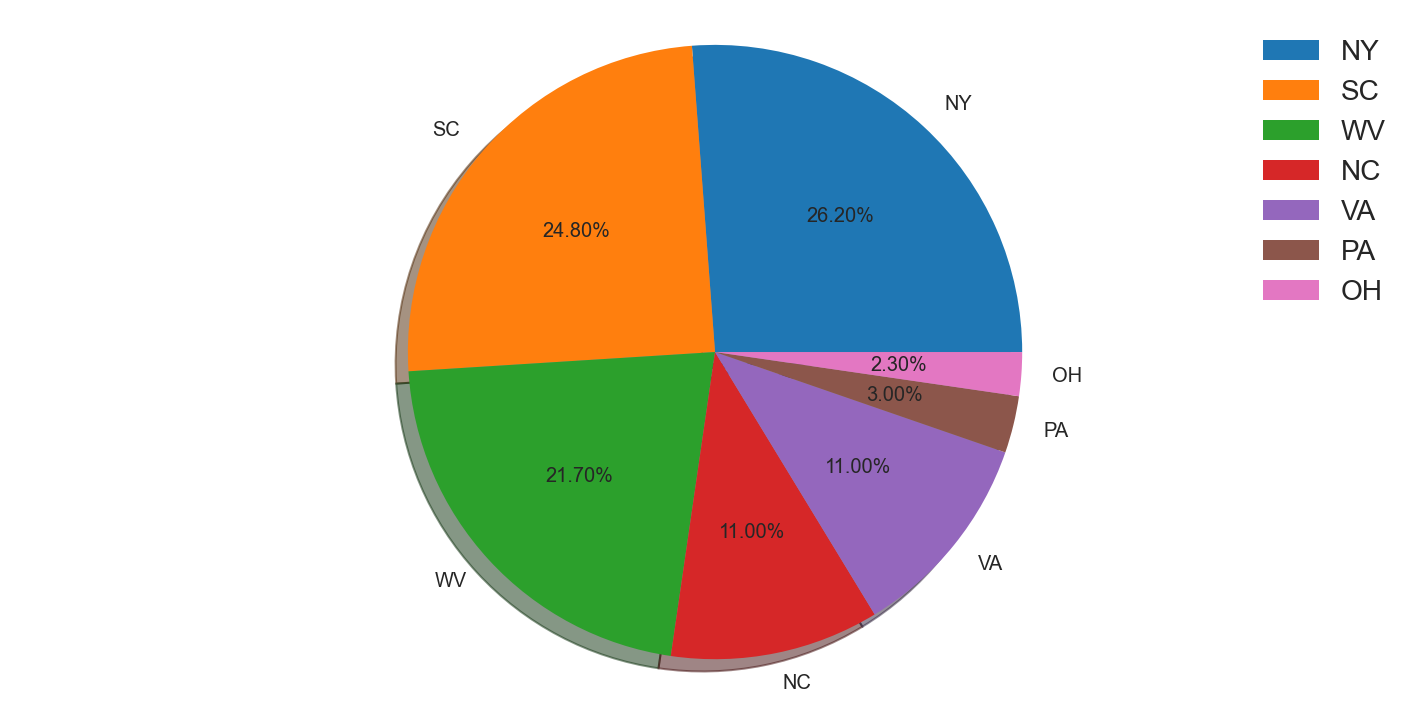

Single digit category column name: incident_city


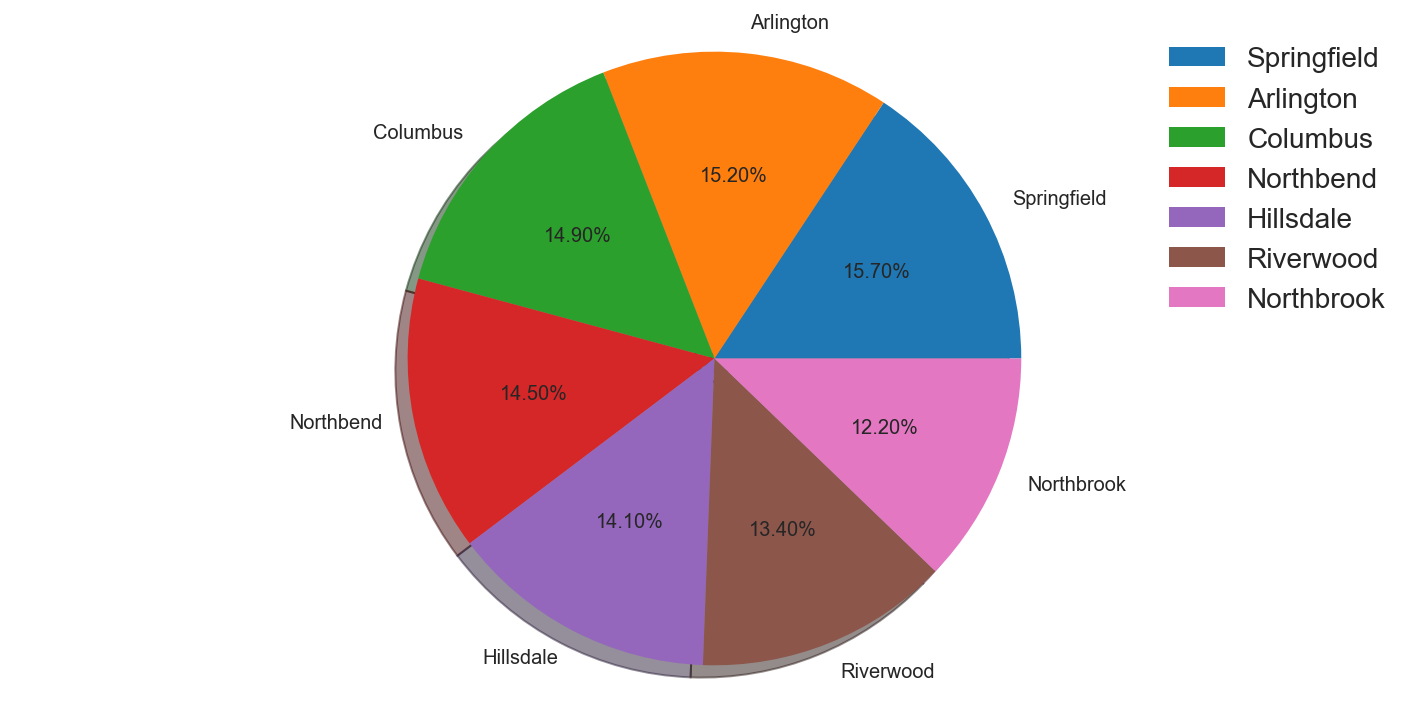

In [33]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

In [34]:
#In the above pie plots we can see the categorical data distribution among the dataset rows covering a single set number of data points in each value.

#My observations:

#we can see that less number of data cover the yes portion of fraud reported and since this is our target label it indicates towards the problem of class imbalance as well
#we can see that almost both male and female have insurance but the data coverage for female is a bit higher than their male couterparts
#for policy state Ohio has a larger chunk of data as compared to Illinois and Indiana but all 3 have pretty much similar data points
#in the policy csl sections again we see that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories
#with respect to policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts
#in terms of bodily injueries the severity for level 0 is slightly higher than the level 2 and 1
#for police report availability only 31.40 percent people were able to produce genuine reports while the remaining 34.30 percent were either unable to show a report or the authenticity was questionable
#when checking for property damage data we see that 36 percent of the information is questionable while 33.80 percent people did not face any property damage so only 30.20 percent people suffered from property damage
#when we check for incident type then single vehicle and multi vehicle collisions have covered more than 40 percent data each and then we have 9.40 percent incidents for vehicle theft and 8.40 percent incidents for parked car
#for collision type categories we see 29.20 percent incident vehicles with rear collision which is like the highest and 17.80 percent of vehicle incidents are questionable
#measuring the incident severity the highest category covers for minor damages with 35.40 percent and lowest number in incident severity is of 9 percent that only has trivial damage data
#for number of vehicles being involved in an incident majorly lies for 1 and 3
#when we check for witnesses section then all the categories of witnesses are almost similarly distributed
#the data on whether an authority was contacted after an accident covers the police being notified the most then the fire brigade and ambulances but also has data on others being called and none being informed when it came to contacting people
#again for insured relationship column I see almost all the categorical value equally distributed and covering the data rows
#similar to insured relationship even insured education level column has it's data rows distributed equally amongst all the categorical values it holds
#for the incident state columns covers major portion of data rows are covered by New York, South Carolina and West Virginia states
#while checking for incident related city all the cities that are listed in the column have an equal share of data coverage

Double digit category column name: umbrella_limit


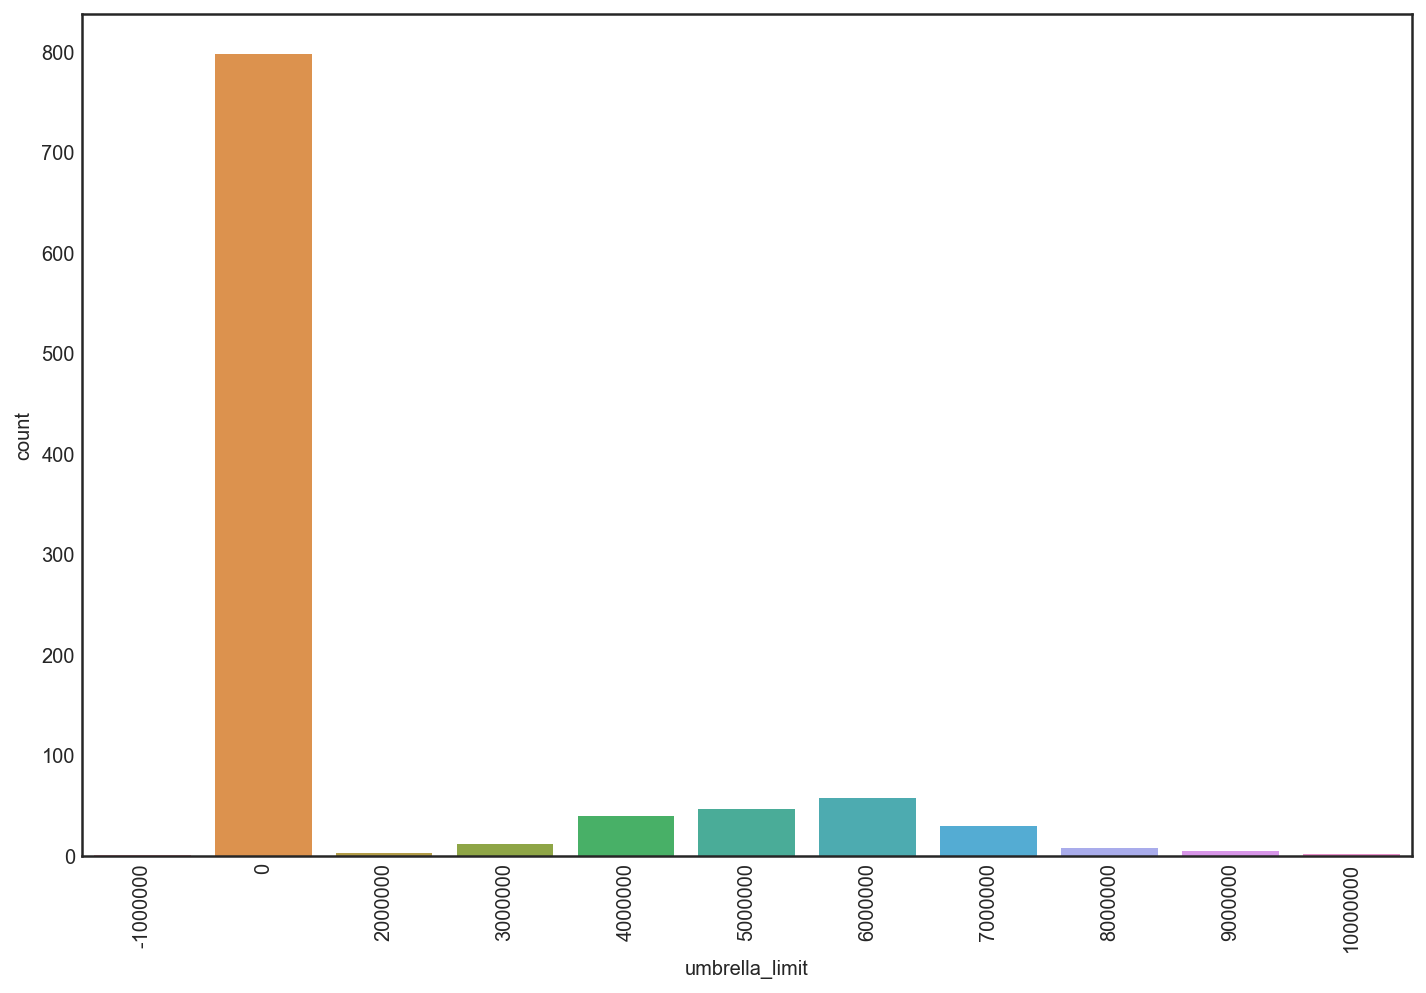

Double digit category column name: insured_occupation


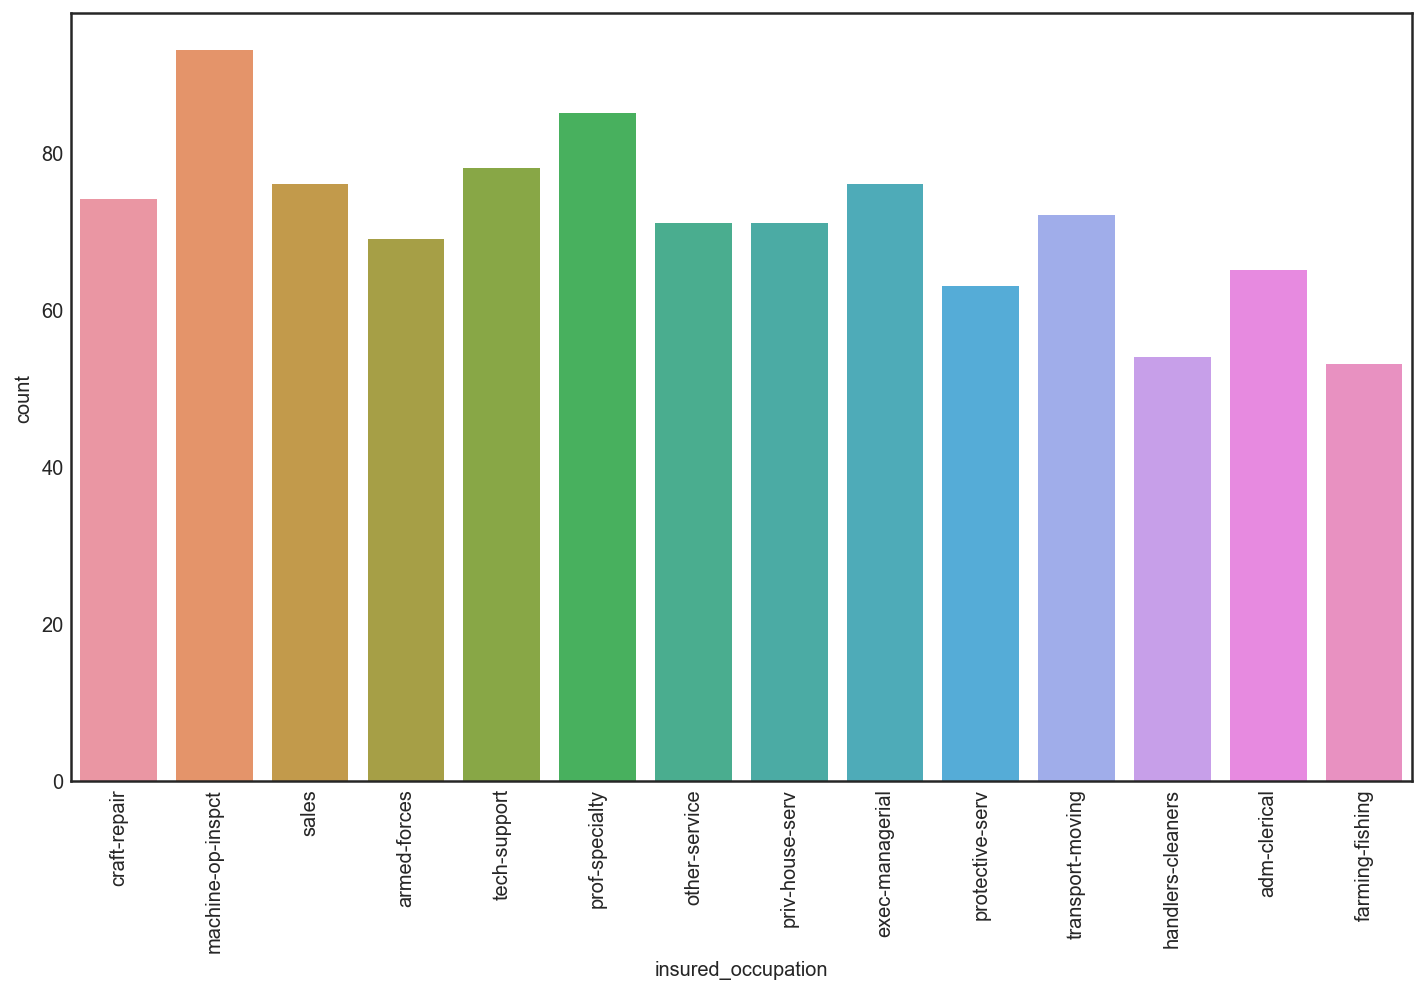

Double digit category column name: auto_make


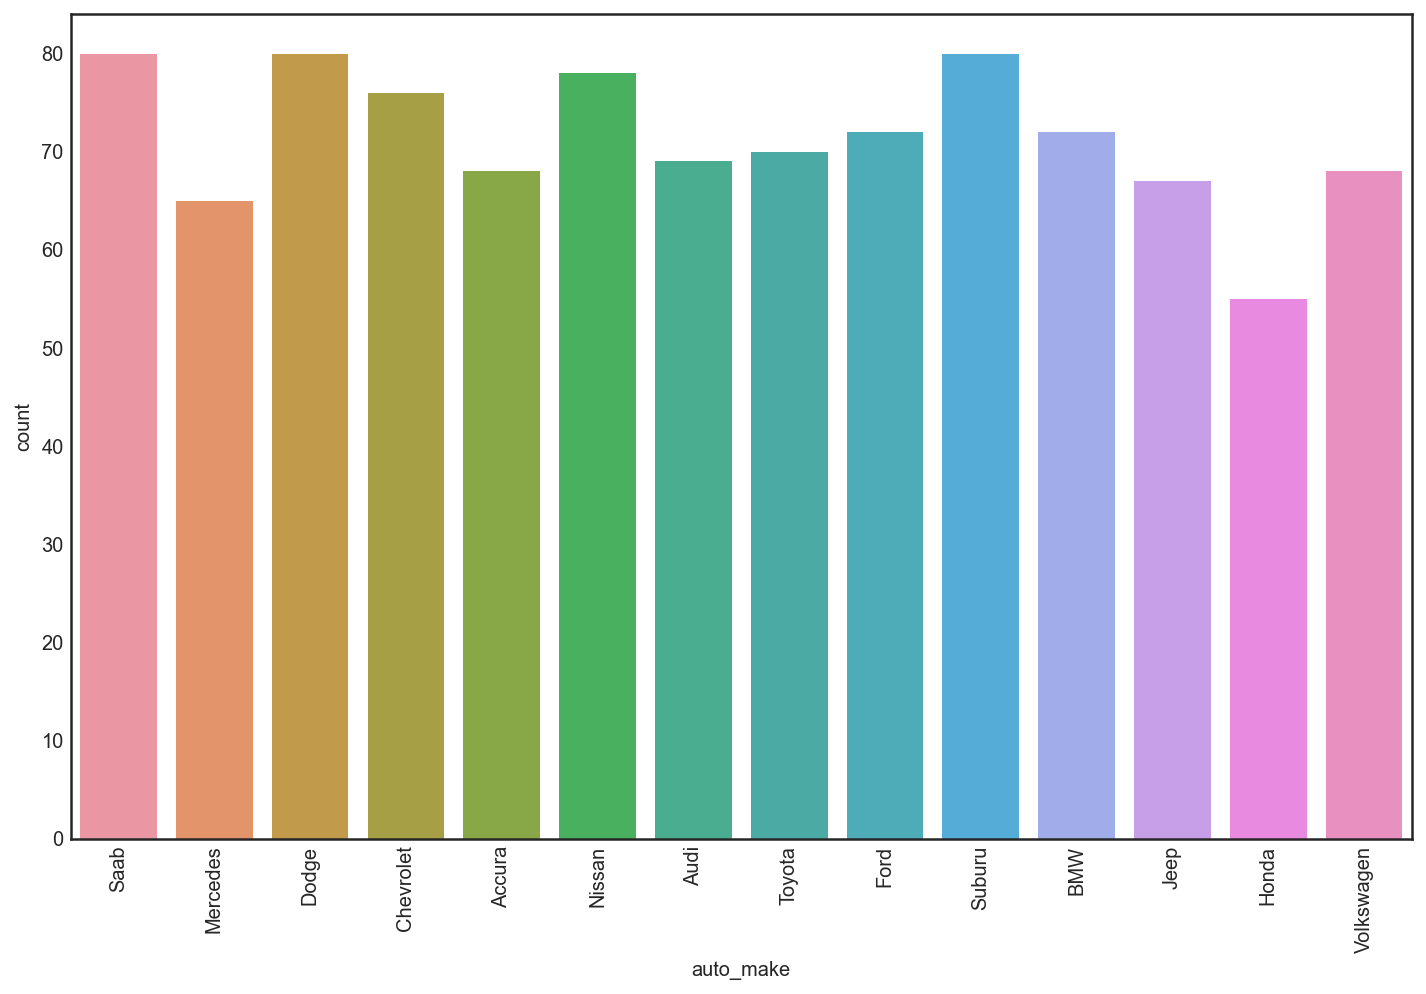

Double digit category column name: insured_hobbies


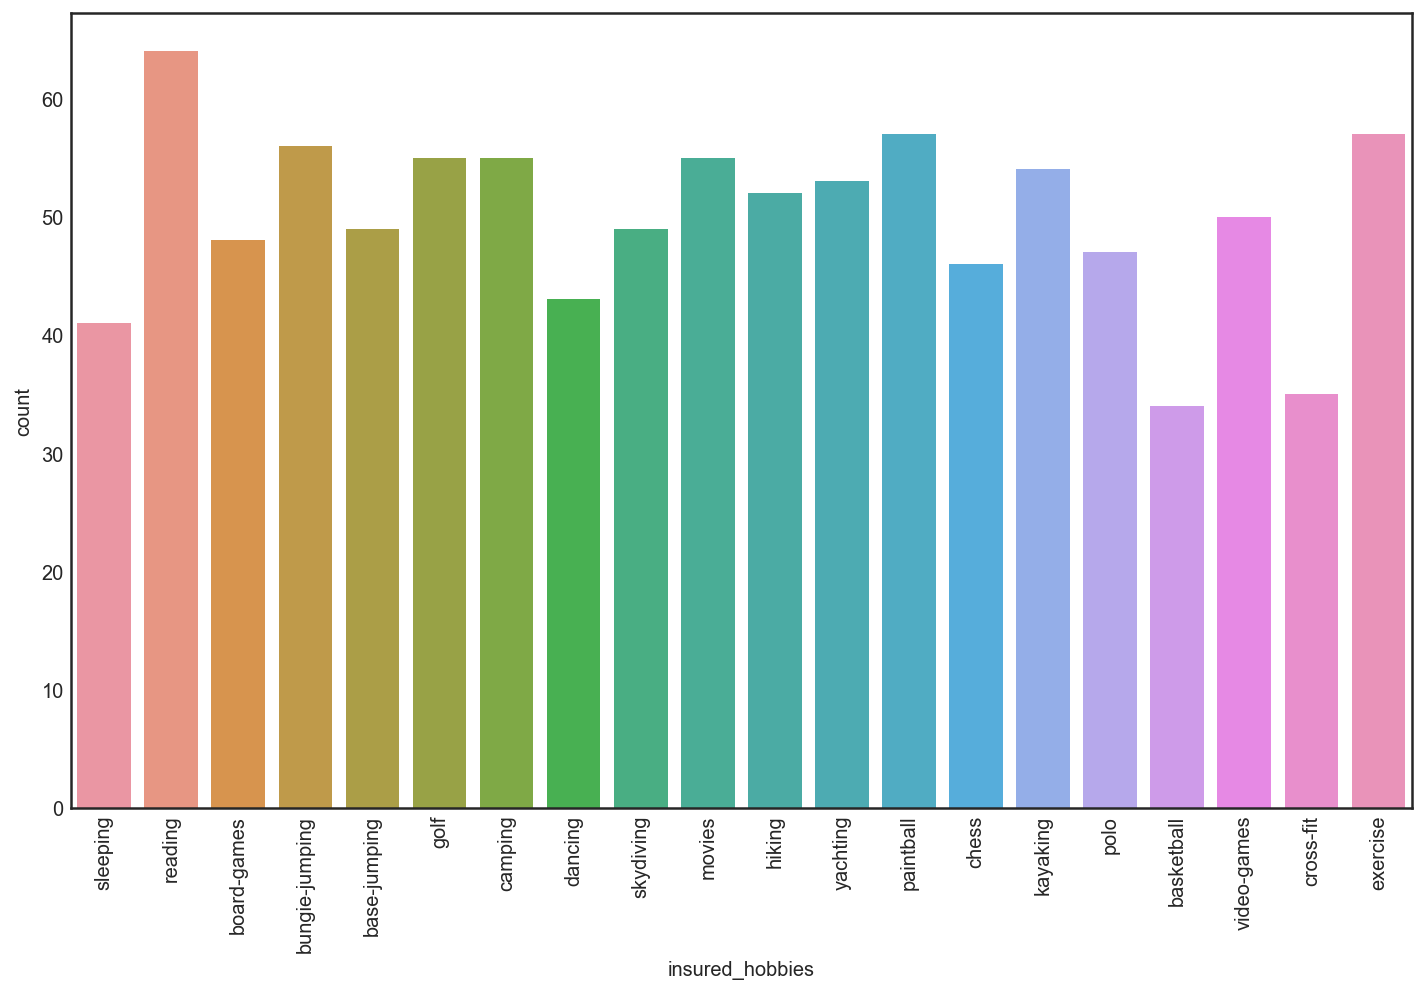

Double digit category column name: auto_model


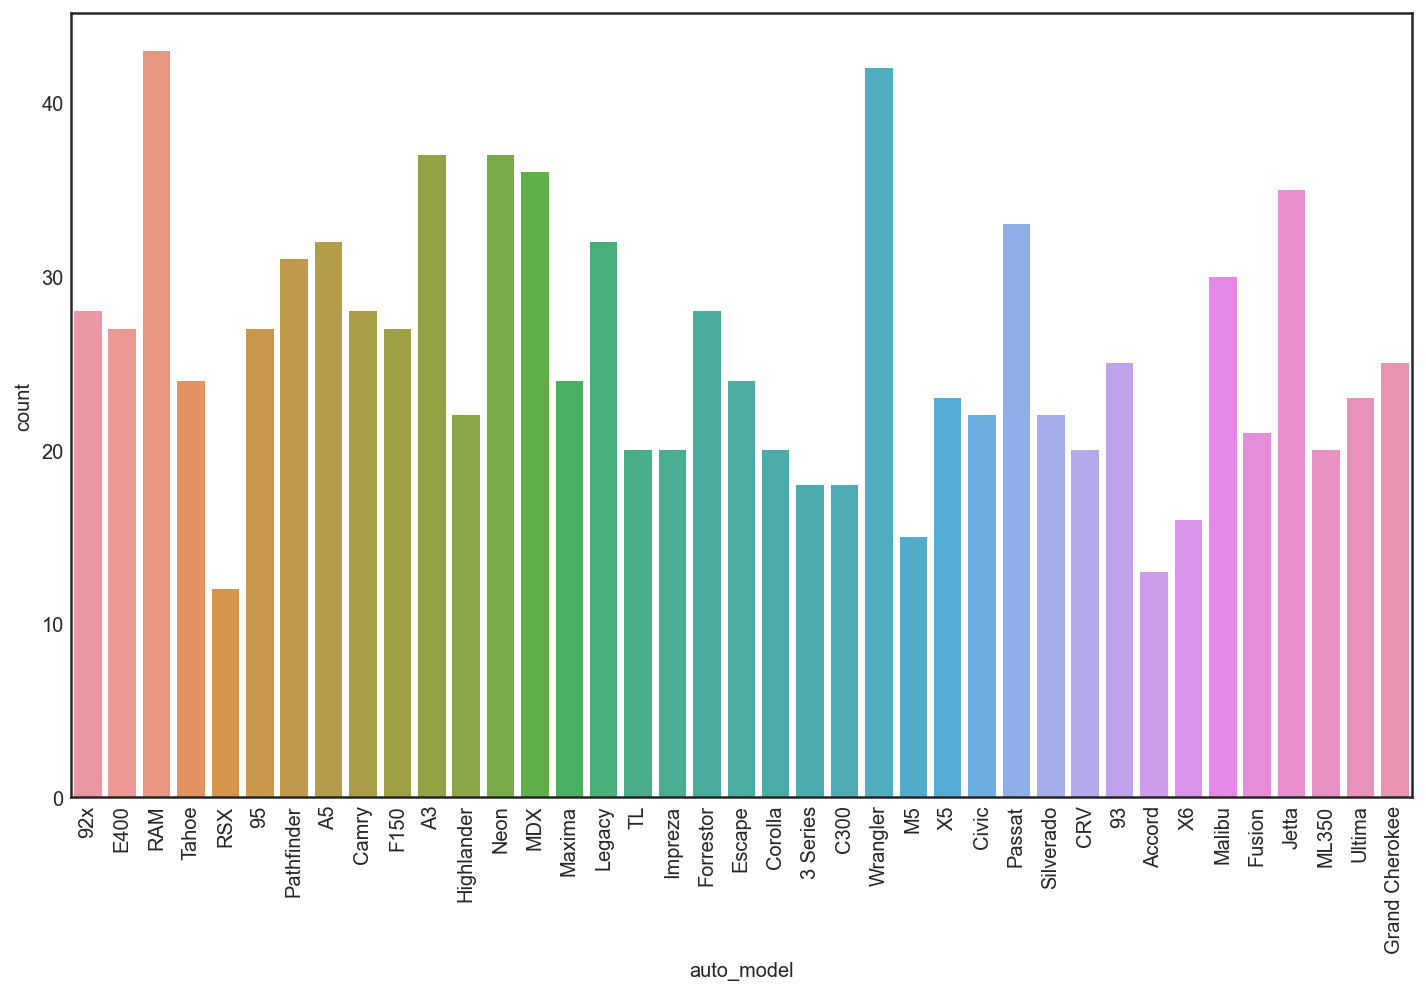

In [35]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(f"Double digit category column name:", j)
    generate_countplot(df[j])

In [36]:
#In the above count plots we can see the categorical data distribution among the dataset rows covering double digit category in a set number of data points for each value.

#My observations:

#we see that the umbrella limit is the highest for the number 0 than any other value listed in that column
#with respect to occupation of all the insured people we see the highest data coverage by machine operation inspector and professional speciality designations
#taking a look at vehicle companies we see a higher scale of data for saab, dodge, nissan, suburu and volkswagen
#the listeing of hobbies held by insured people has the highest data coverage on reading
#if we take a look at the vehicle models that were registered for incidents then we see lots of data rows covered by RAM and Wrangler automobile models

insured_sex vs fraud_reported column ->


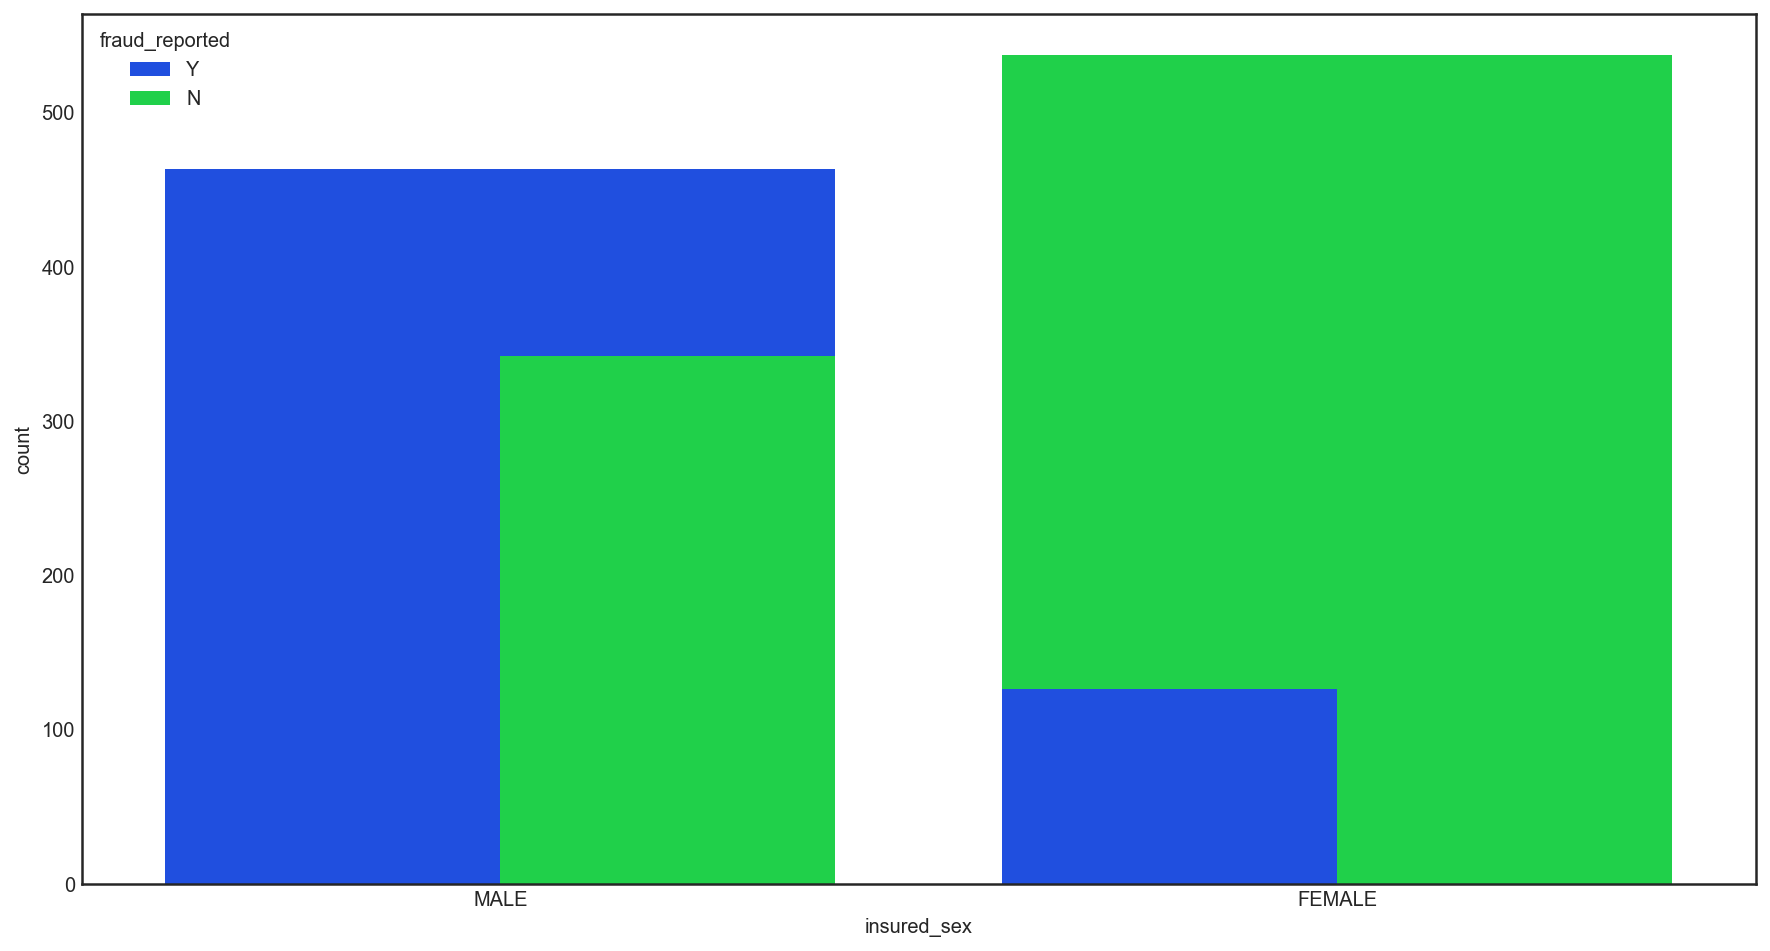

policy_state vs fraud_reported column ->


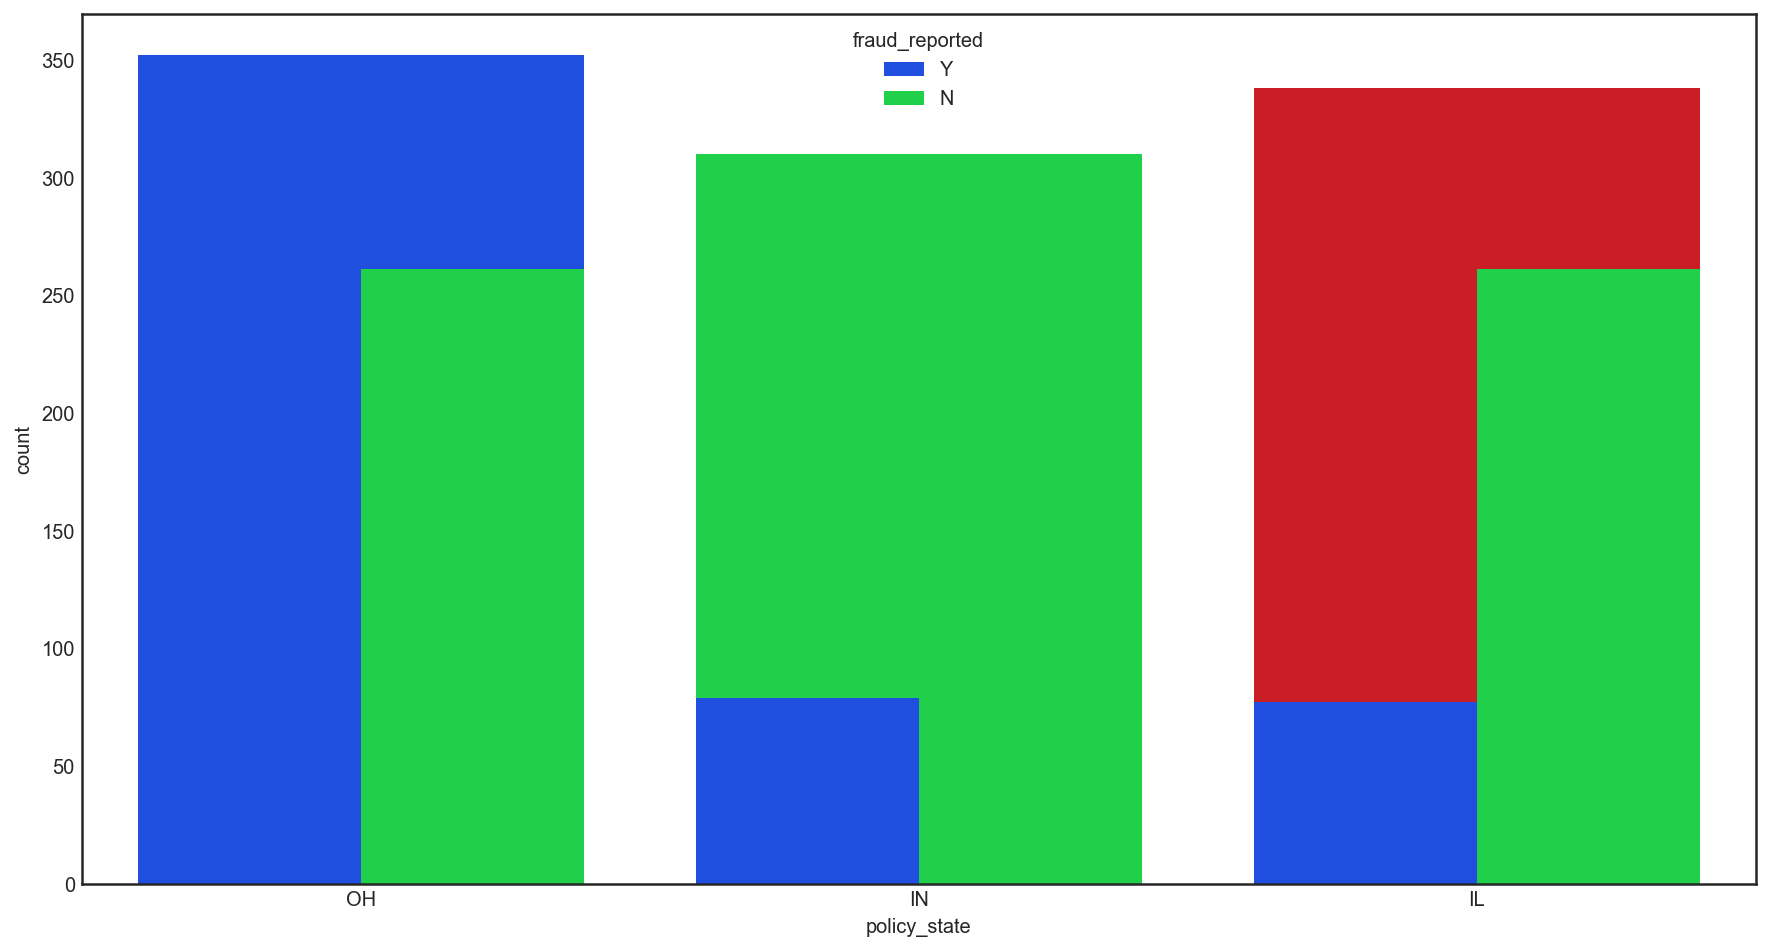

policy_csl vs fraud_reported column ->


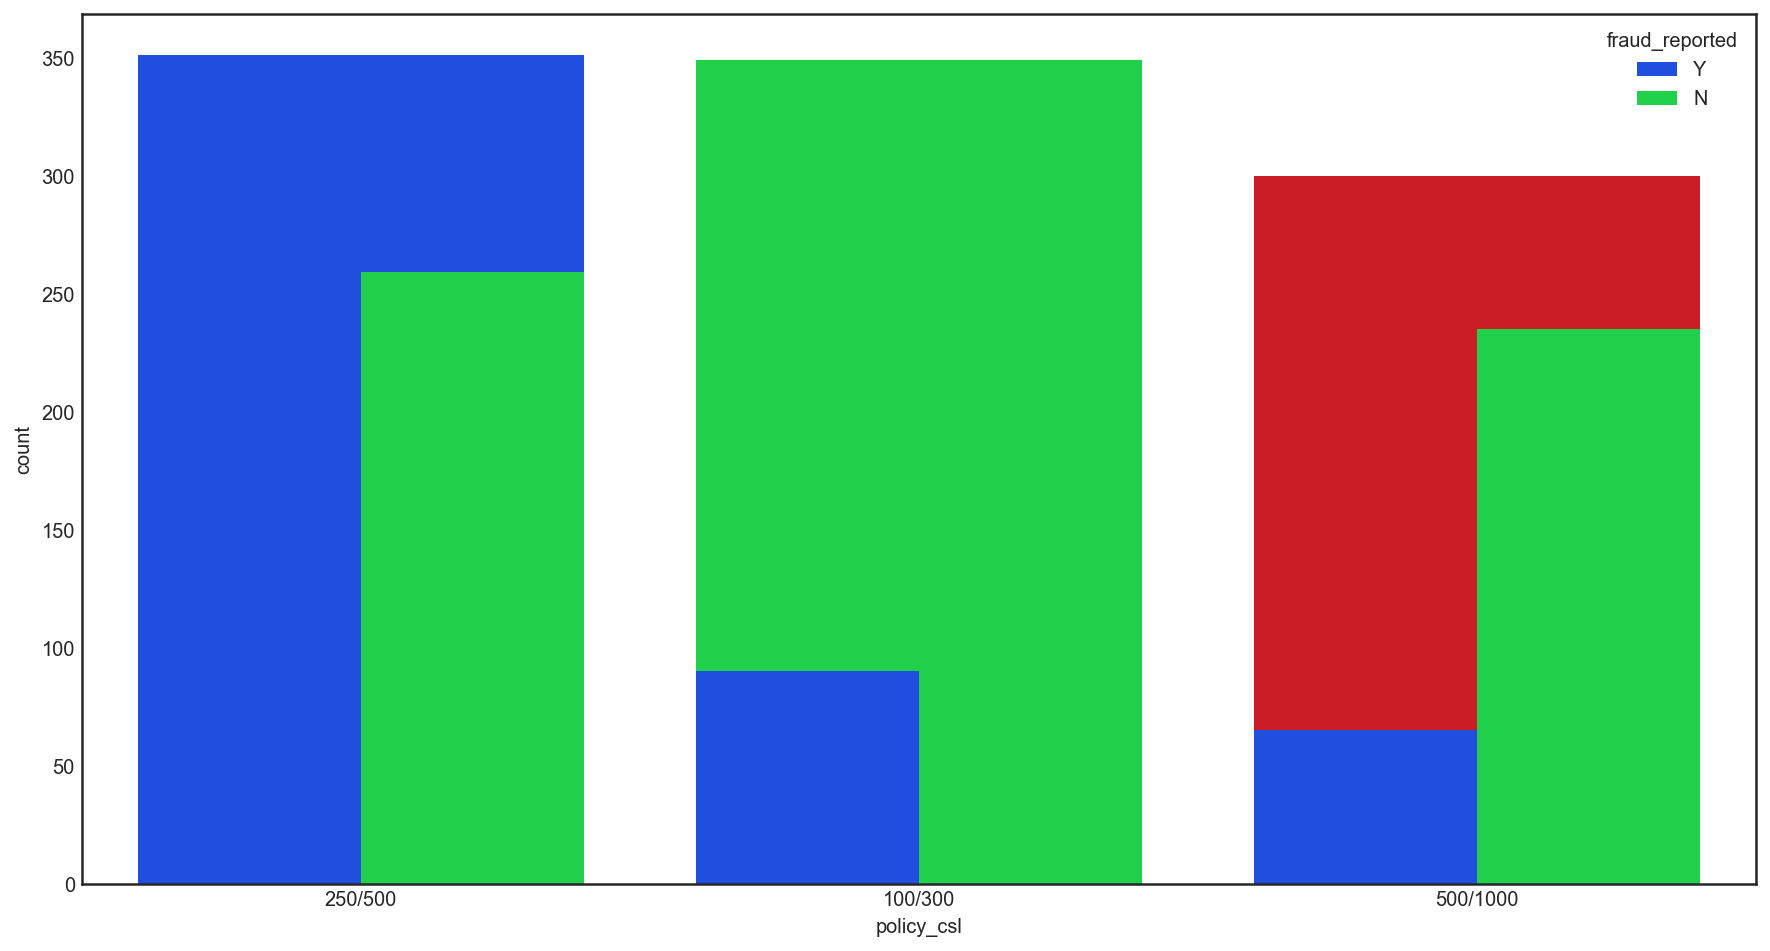

policy_deductable vs fraud_reported column ->


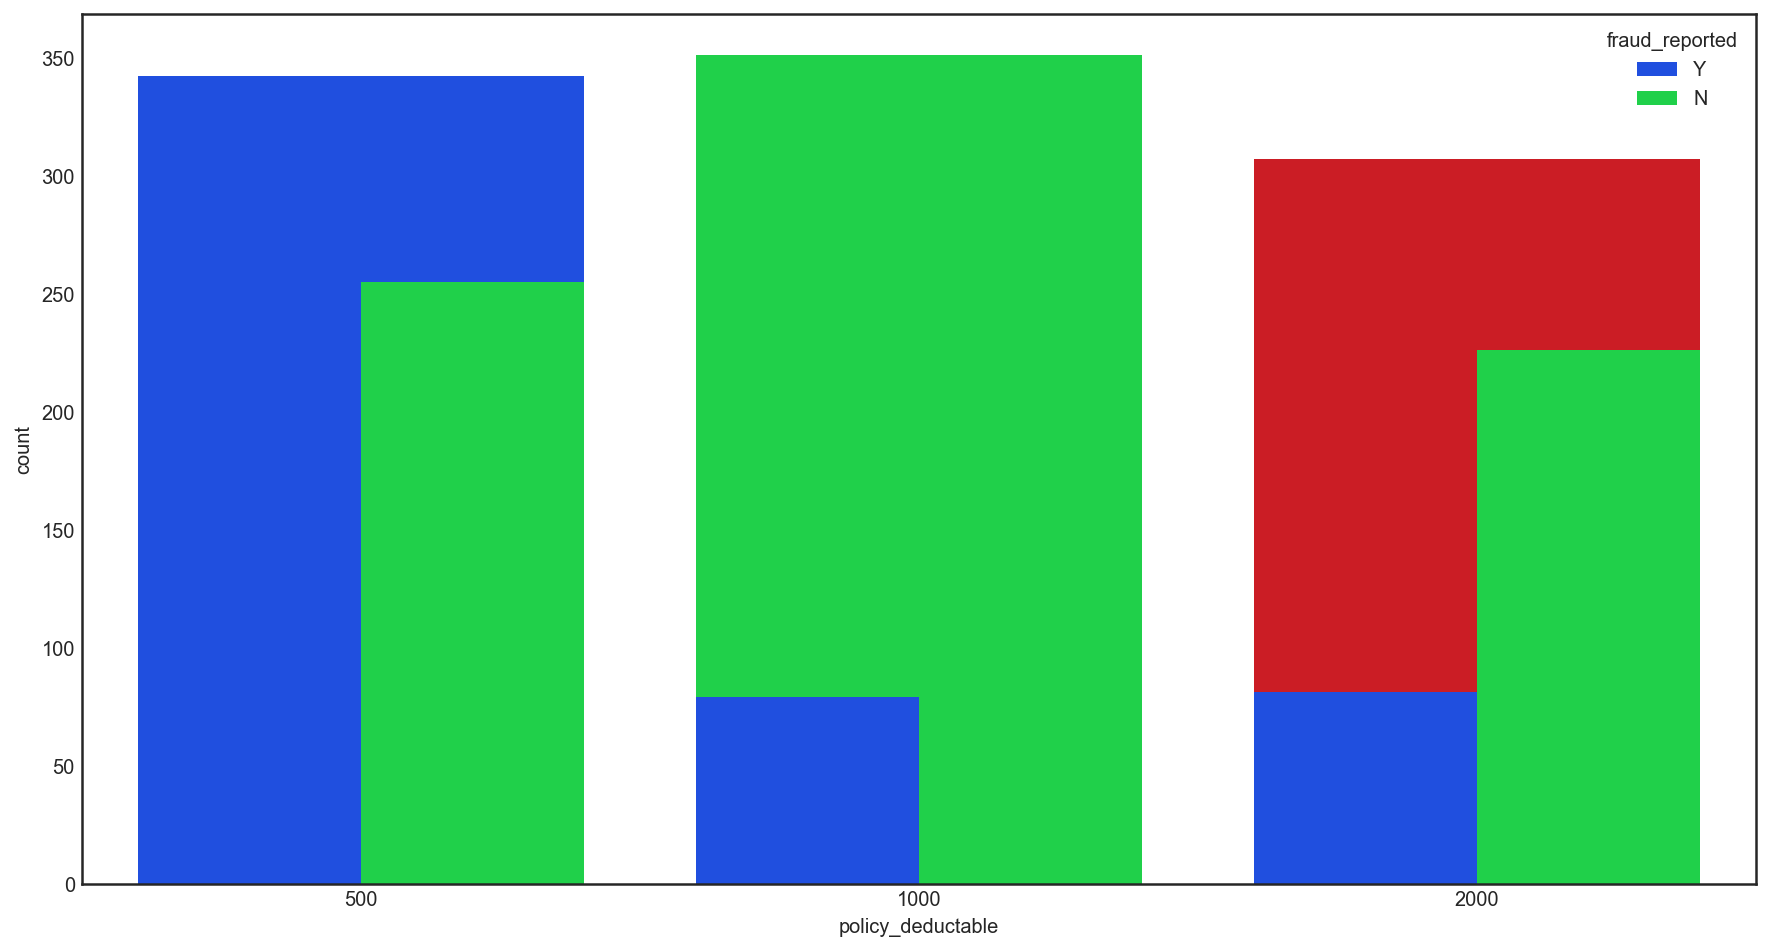

bodily_injuries vs fraud_reported column ->


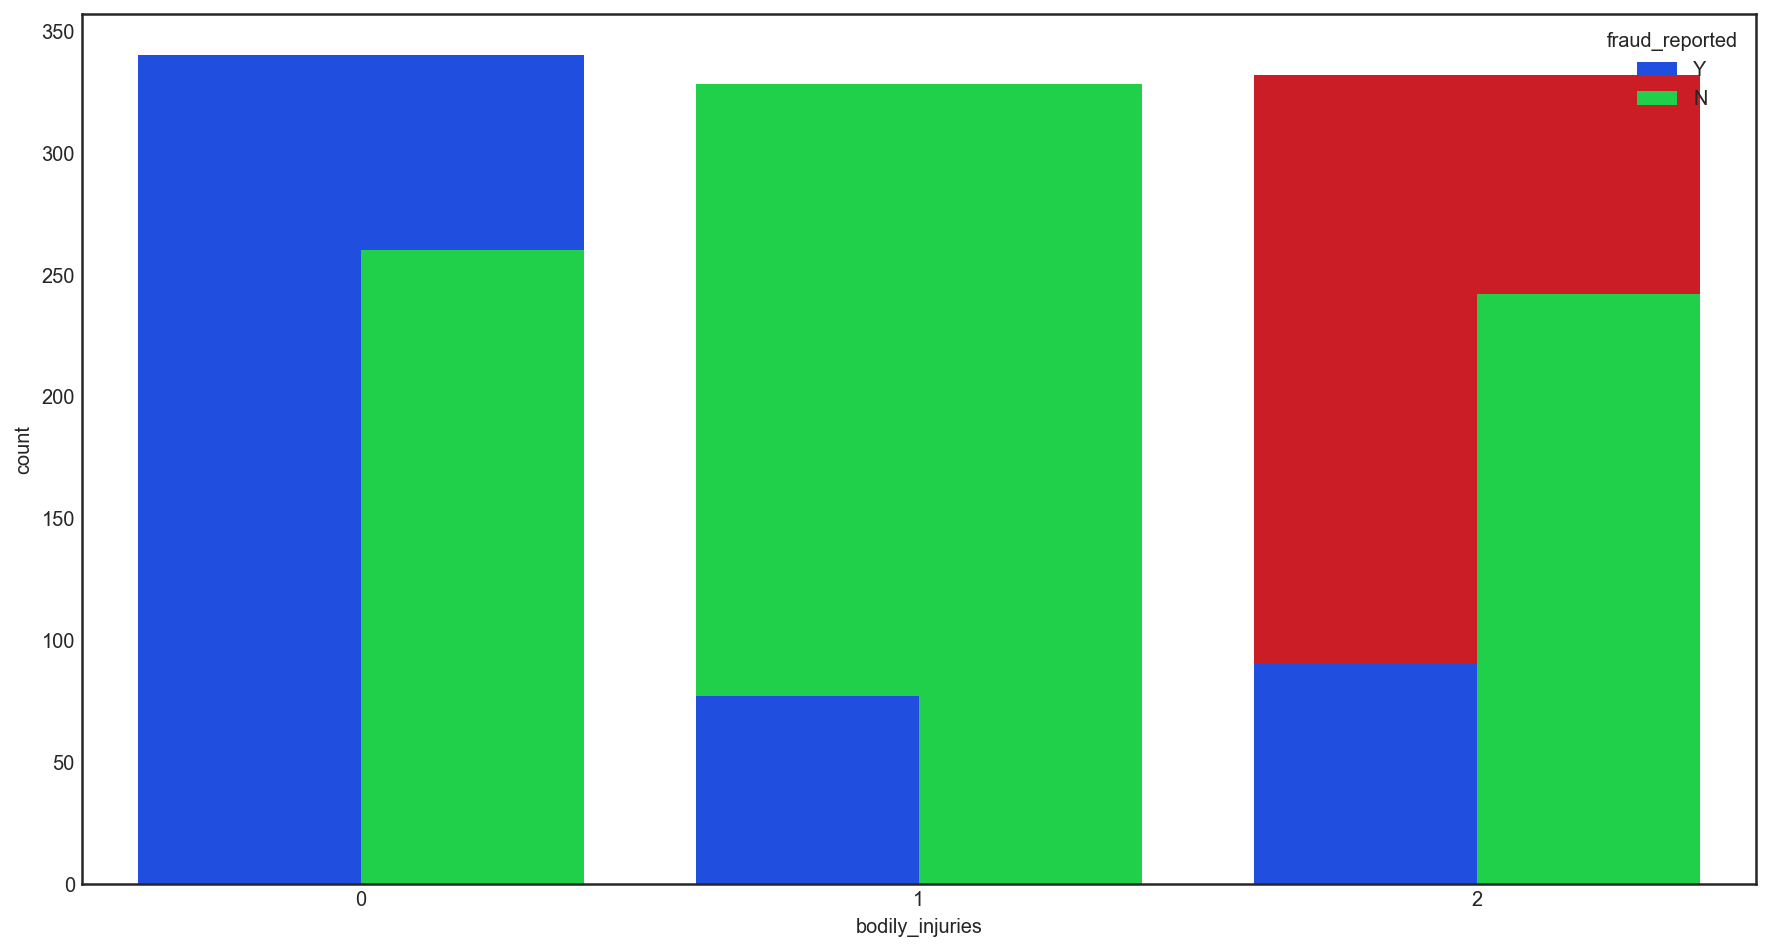

police_report_available vs fraud_reported column ->


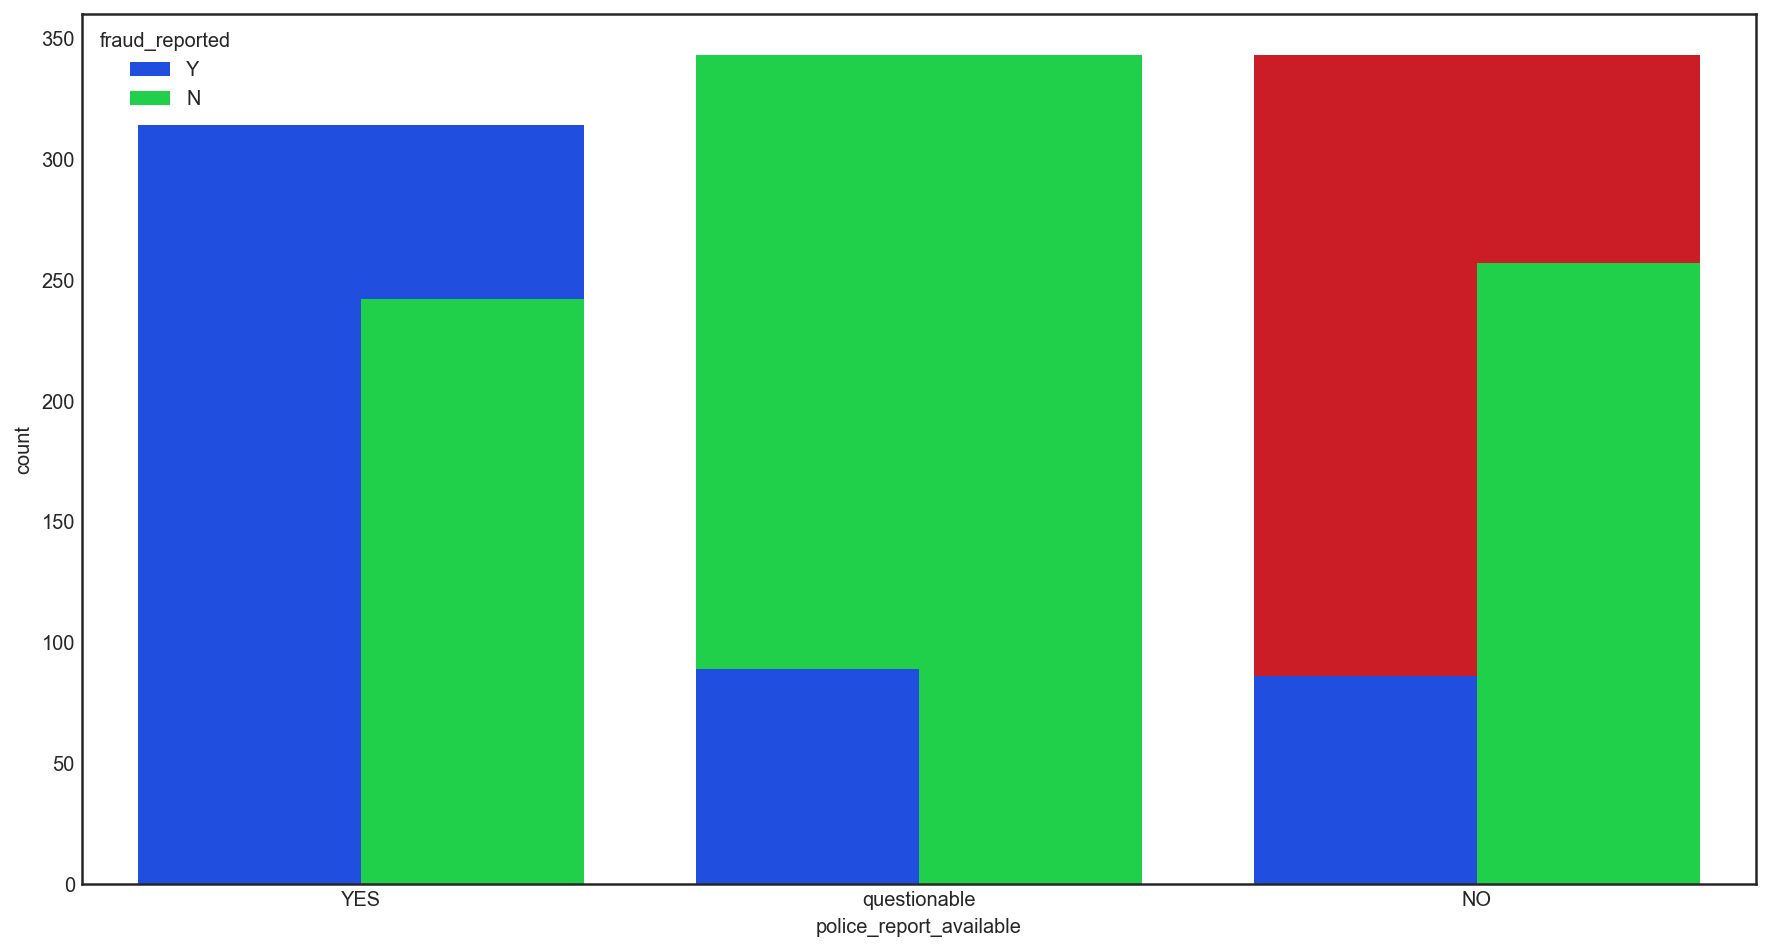

property_damage vs fraud_reported column ->


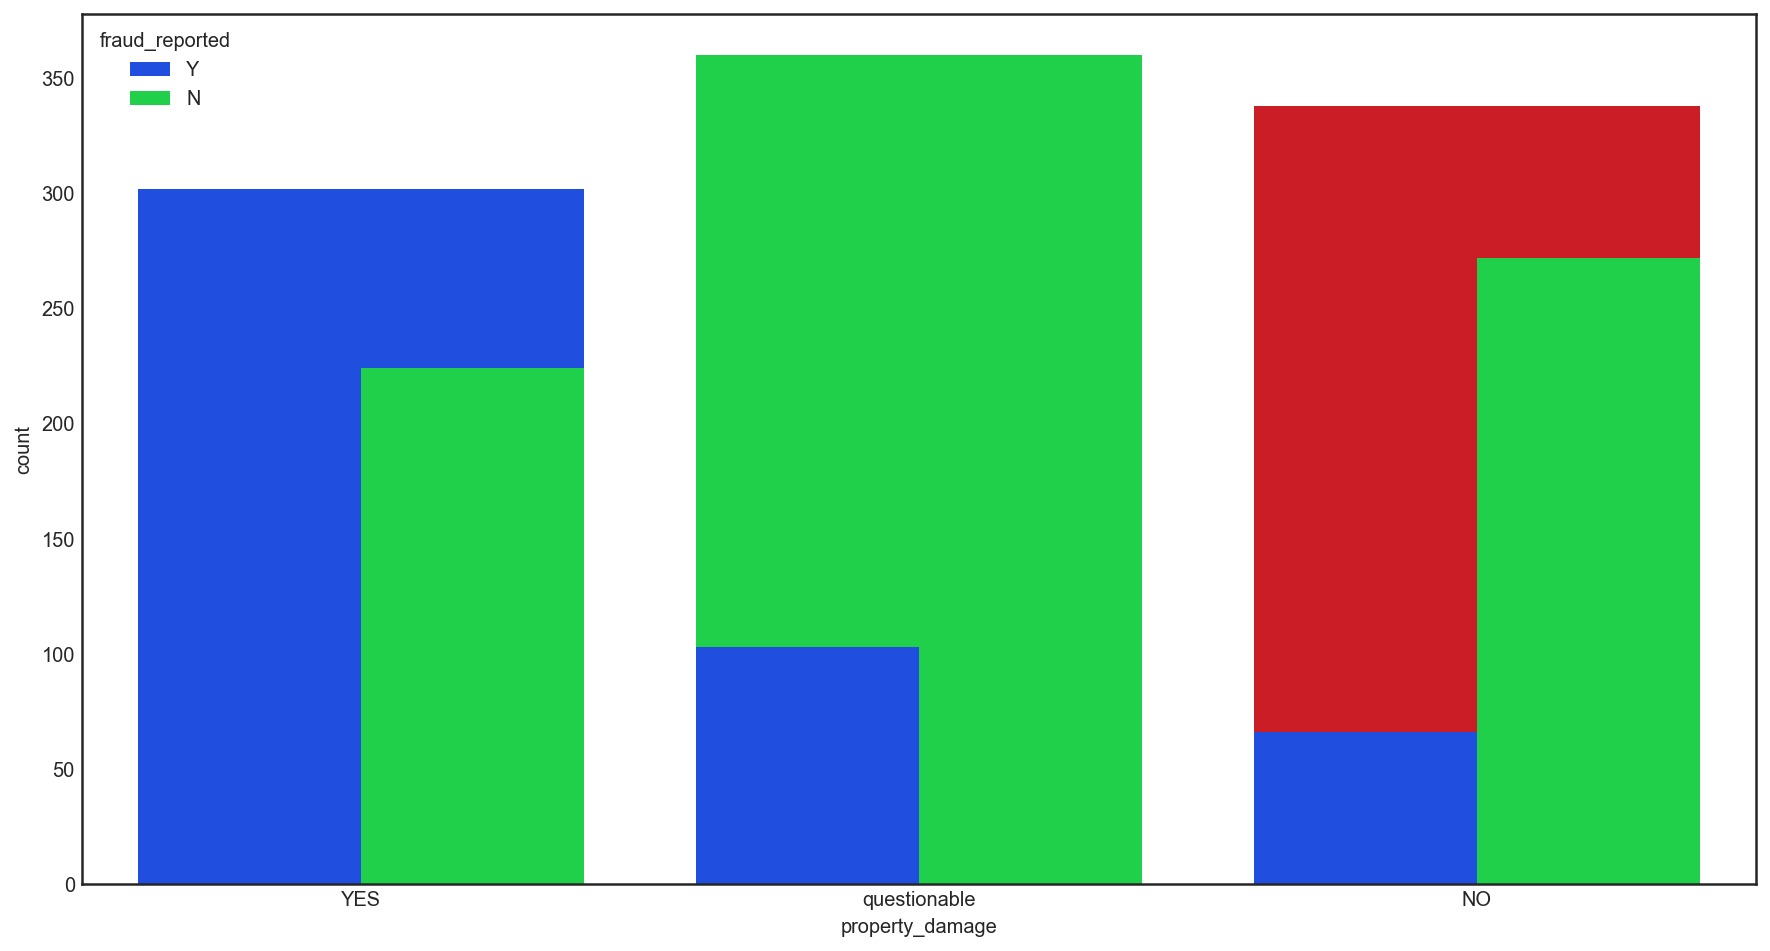

incident_type vs fraud_reported column ->


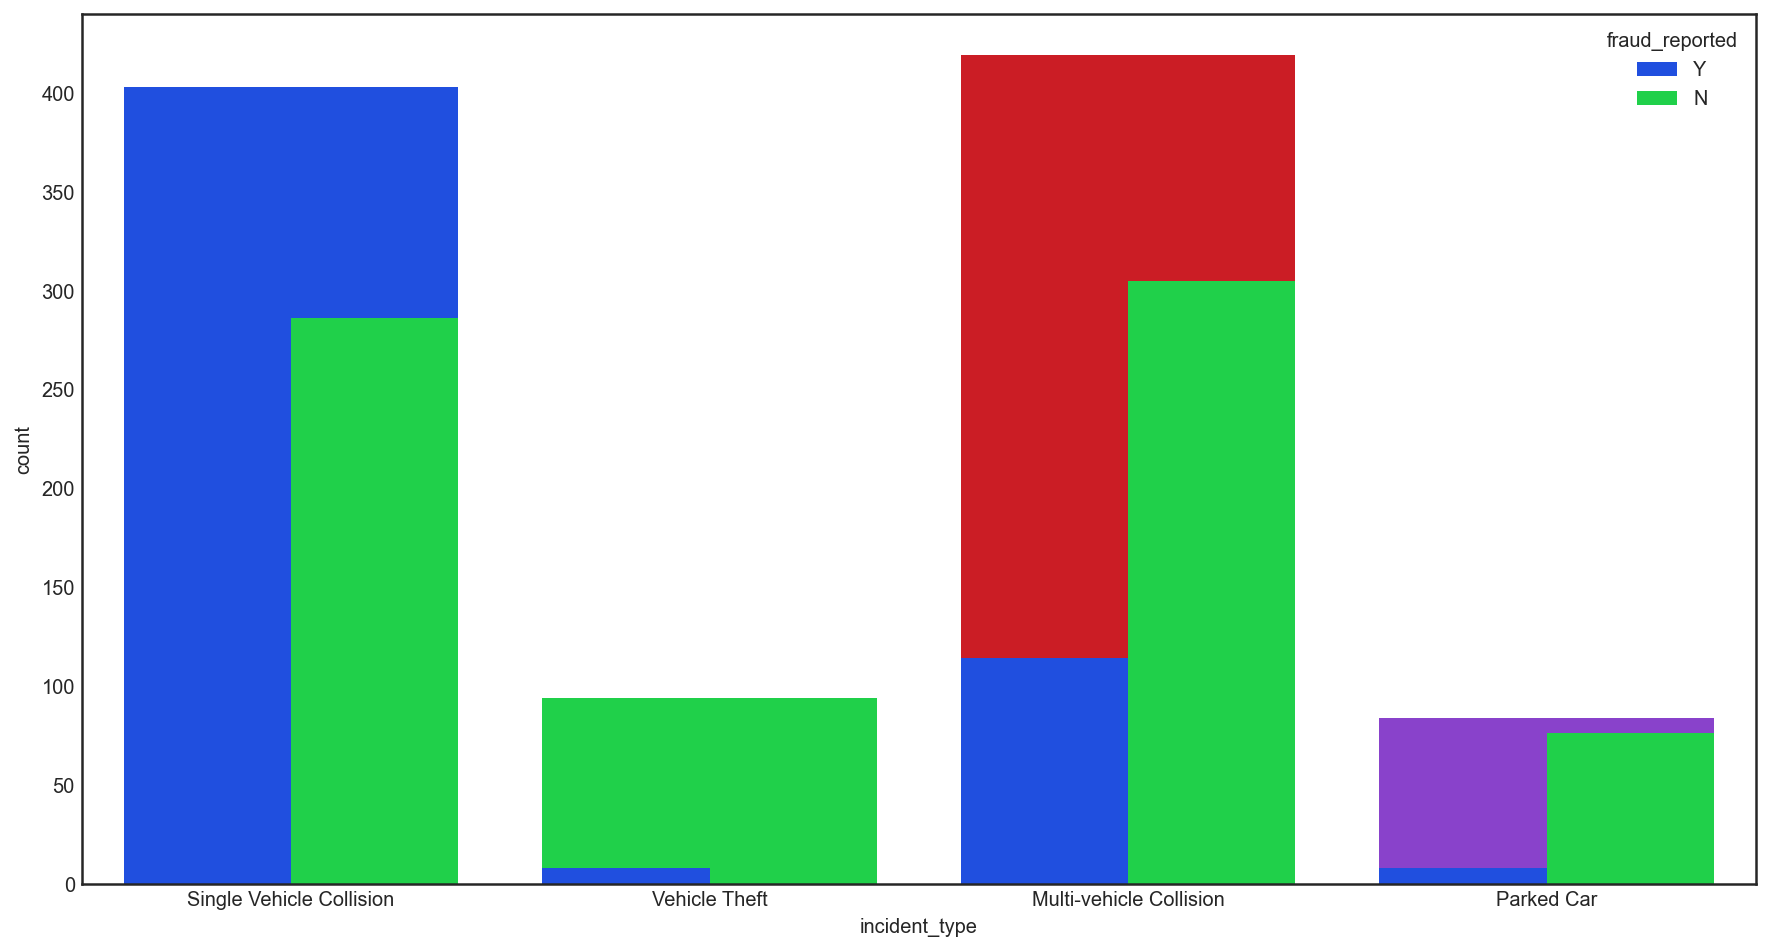

collision_type vs fraud_reported column ->


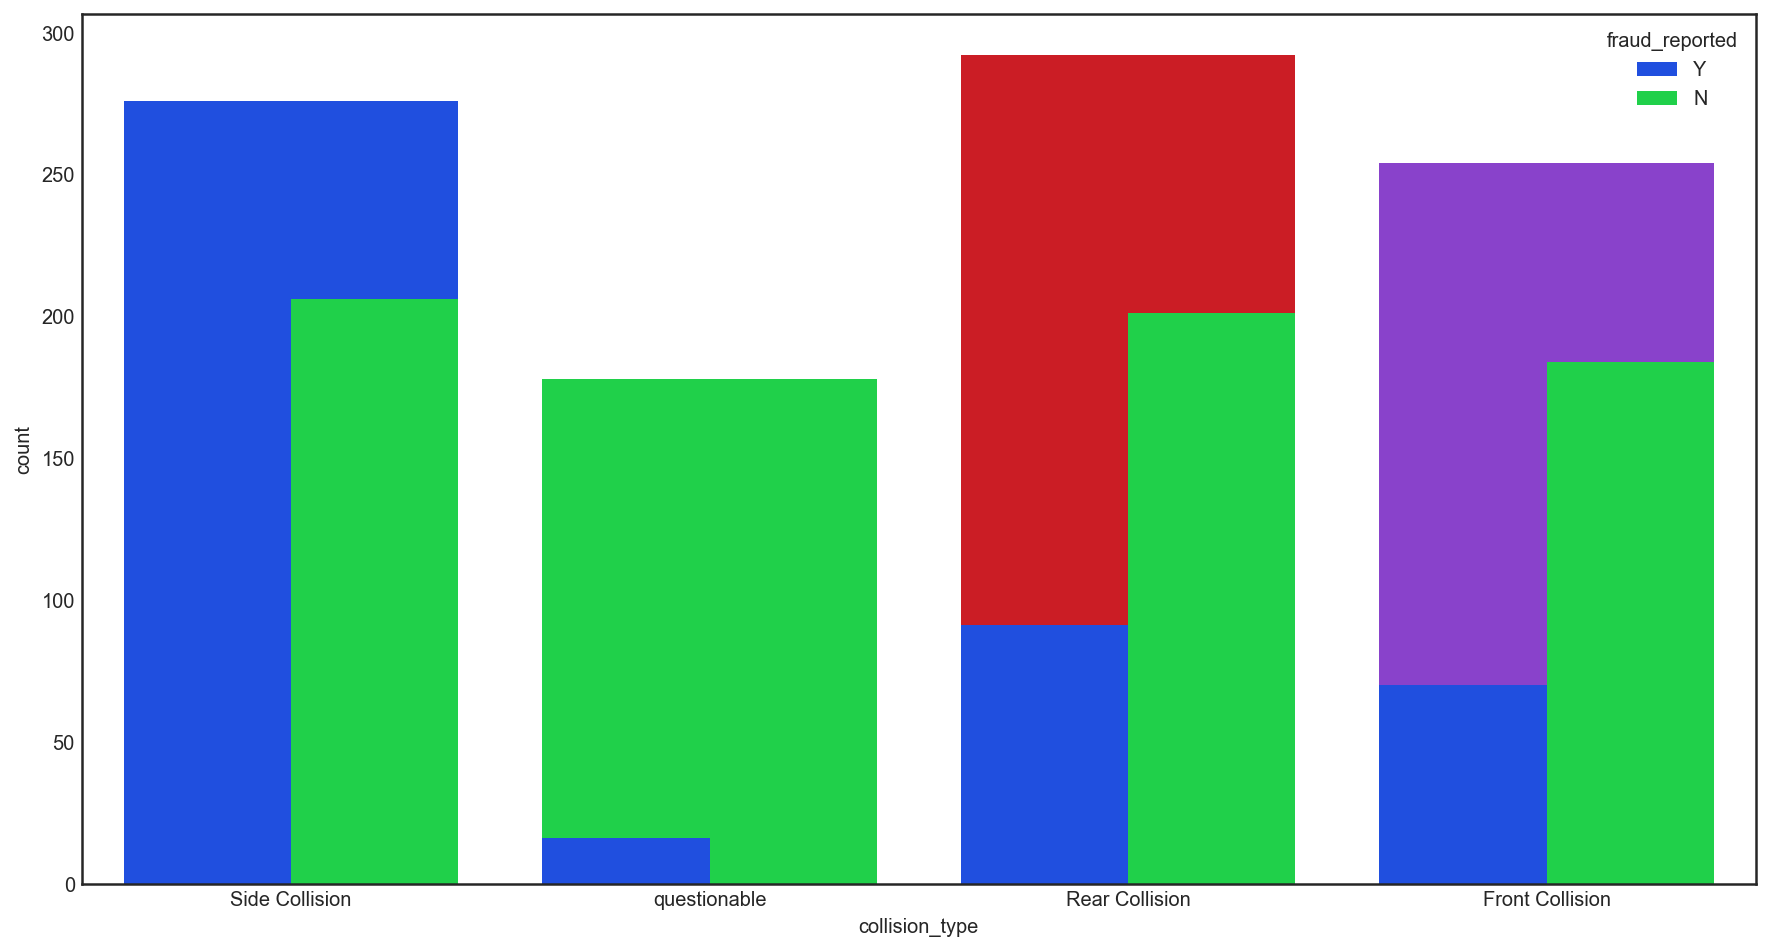

incident_severity vs fraud_reported column ->


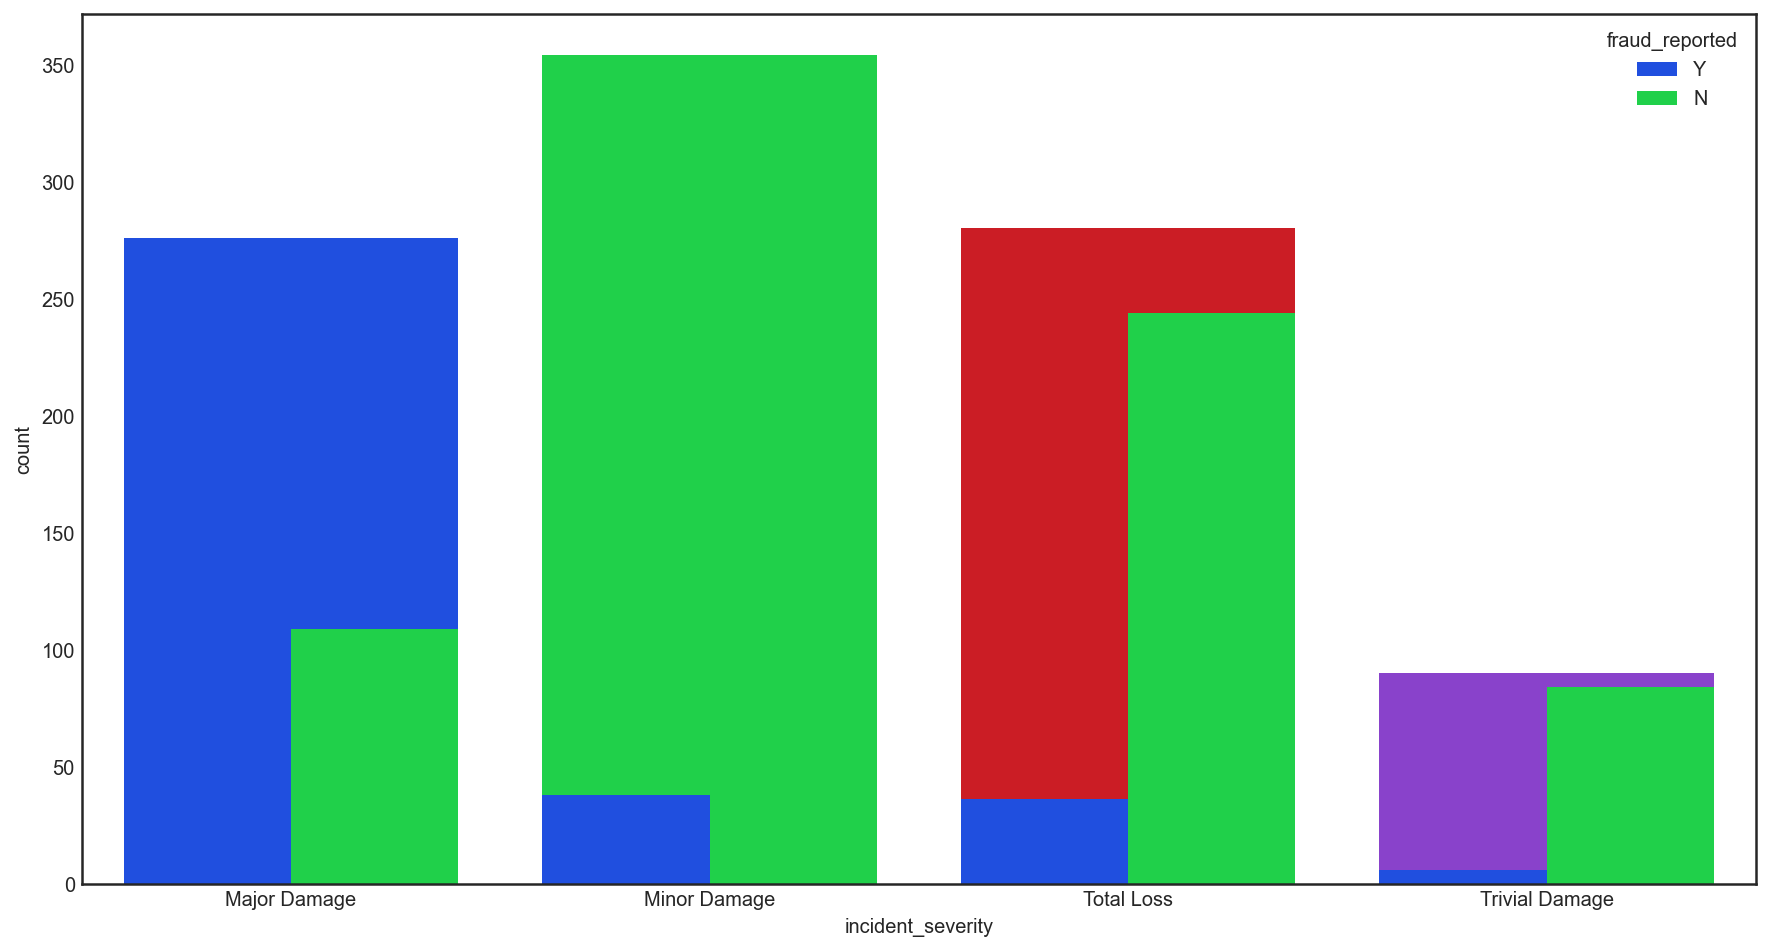

number_of_vehicles_involved vs fraud_reported column ->


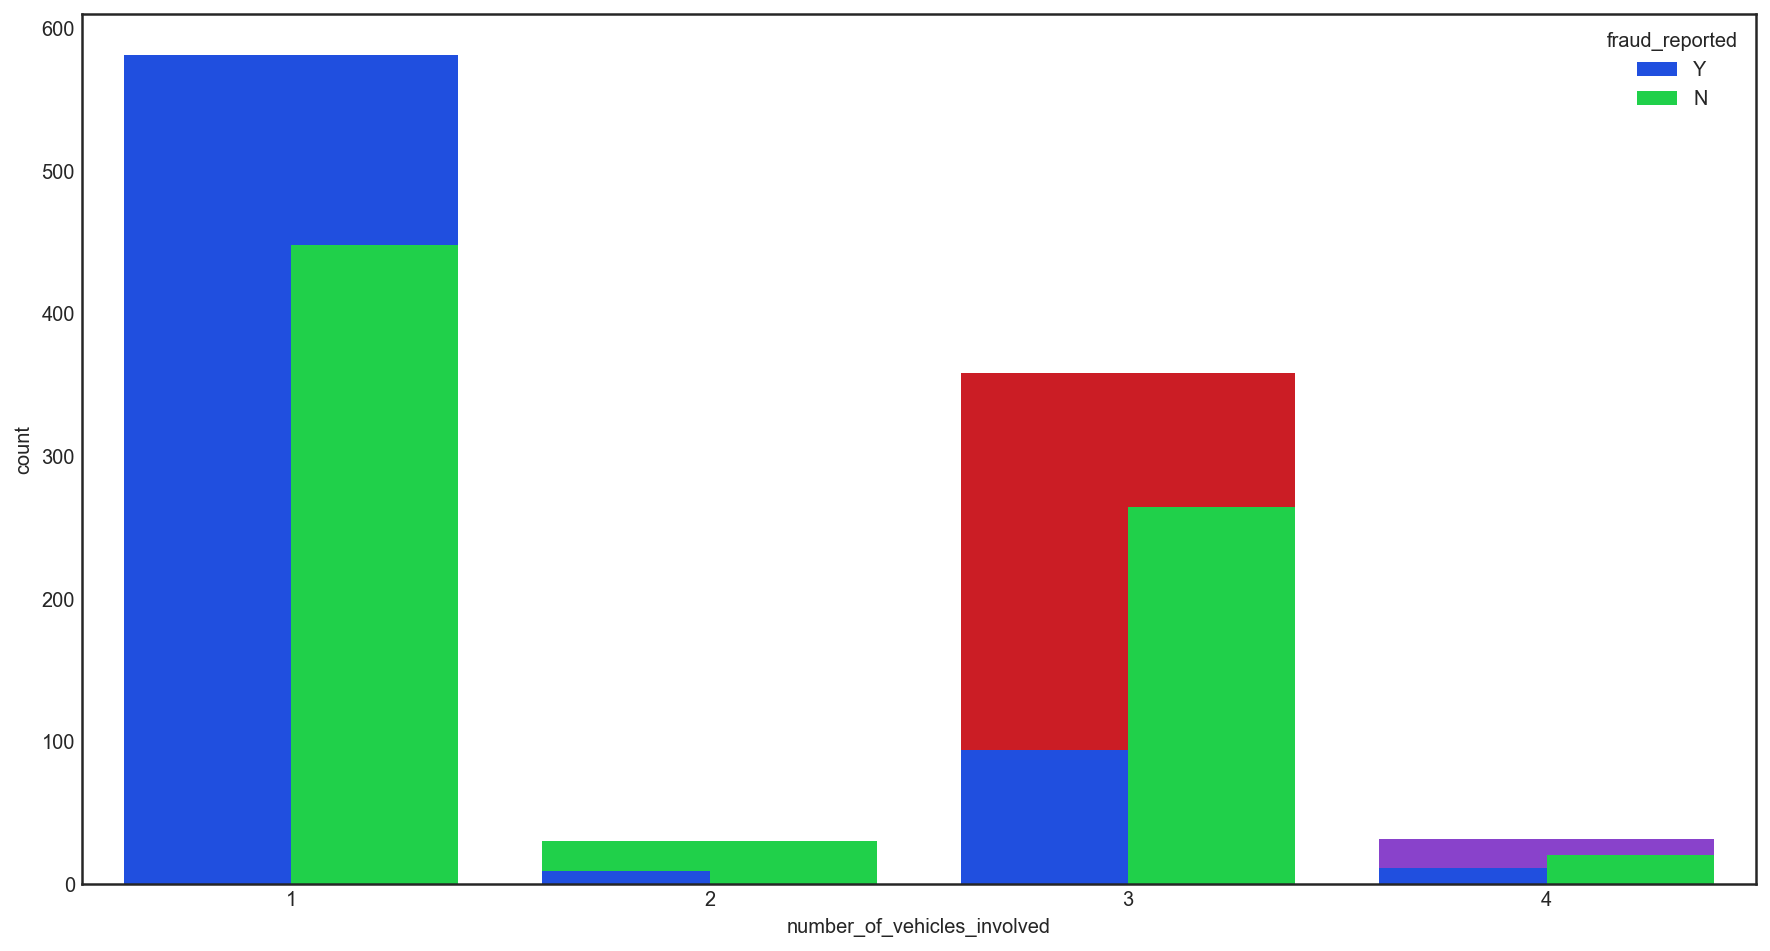

witnesses vs fraud_reported column ->


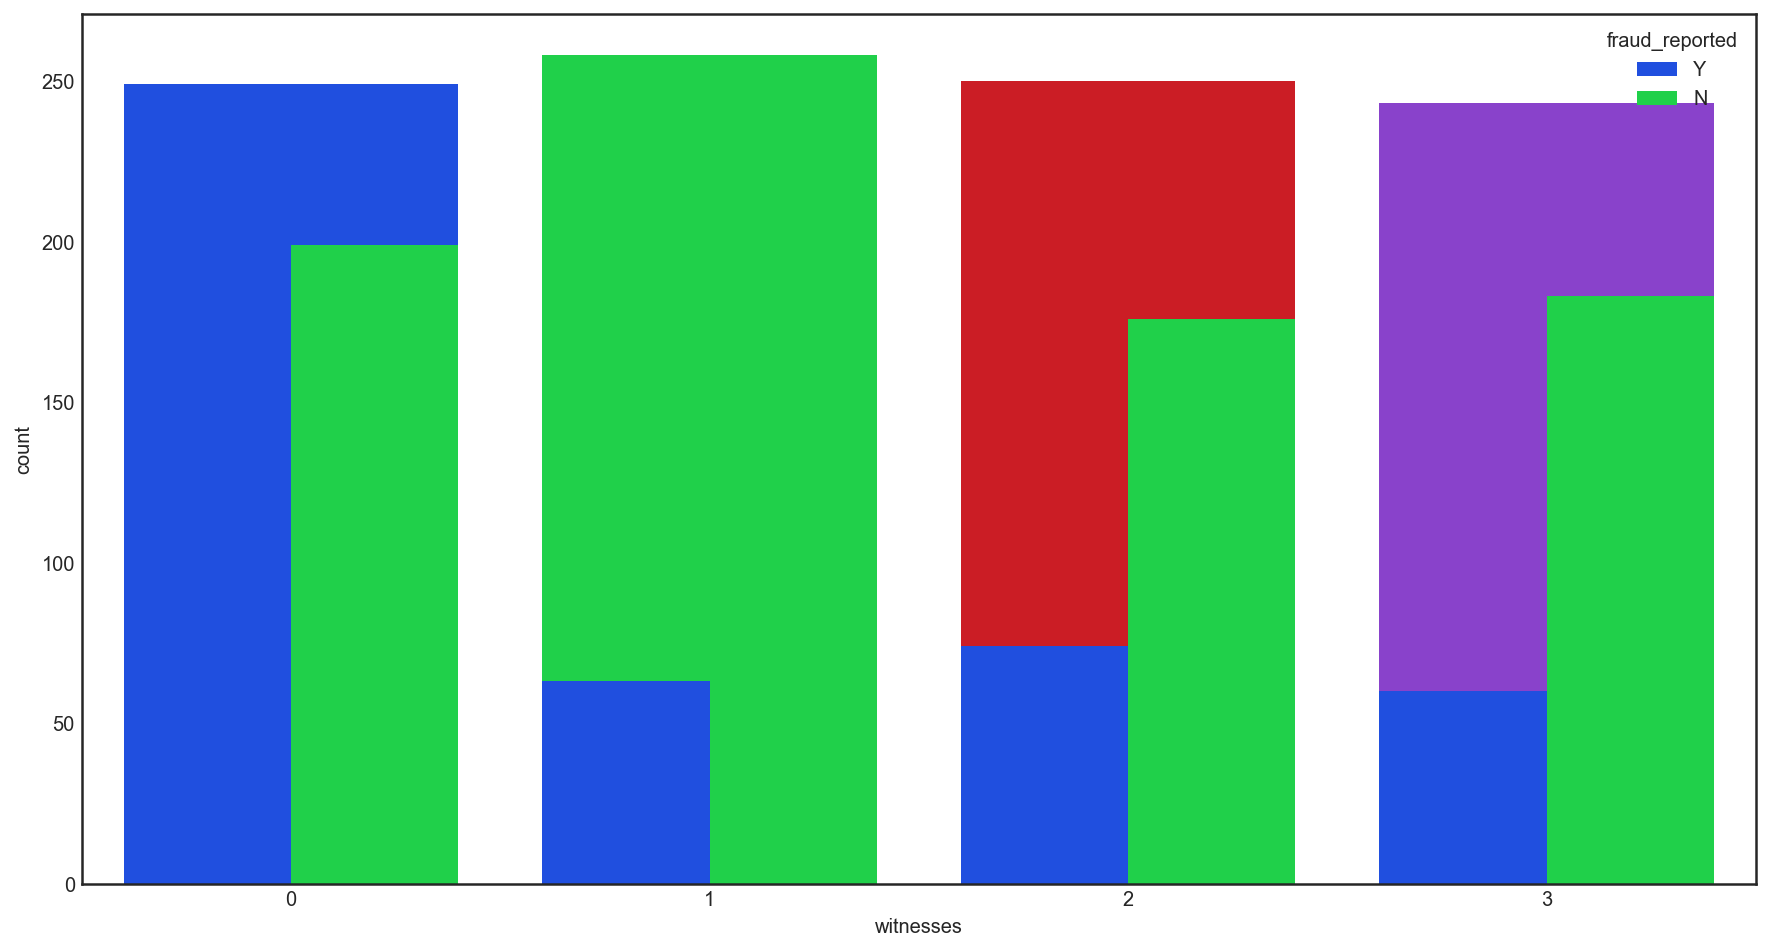

authorities_contacted vs fraud_reported column ->


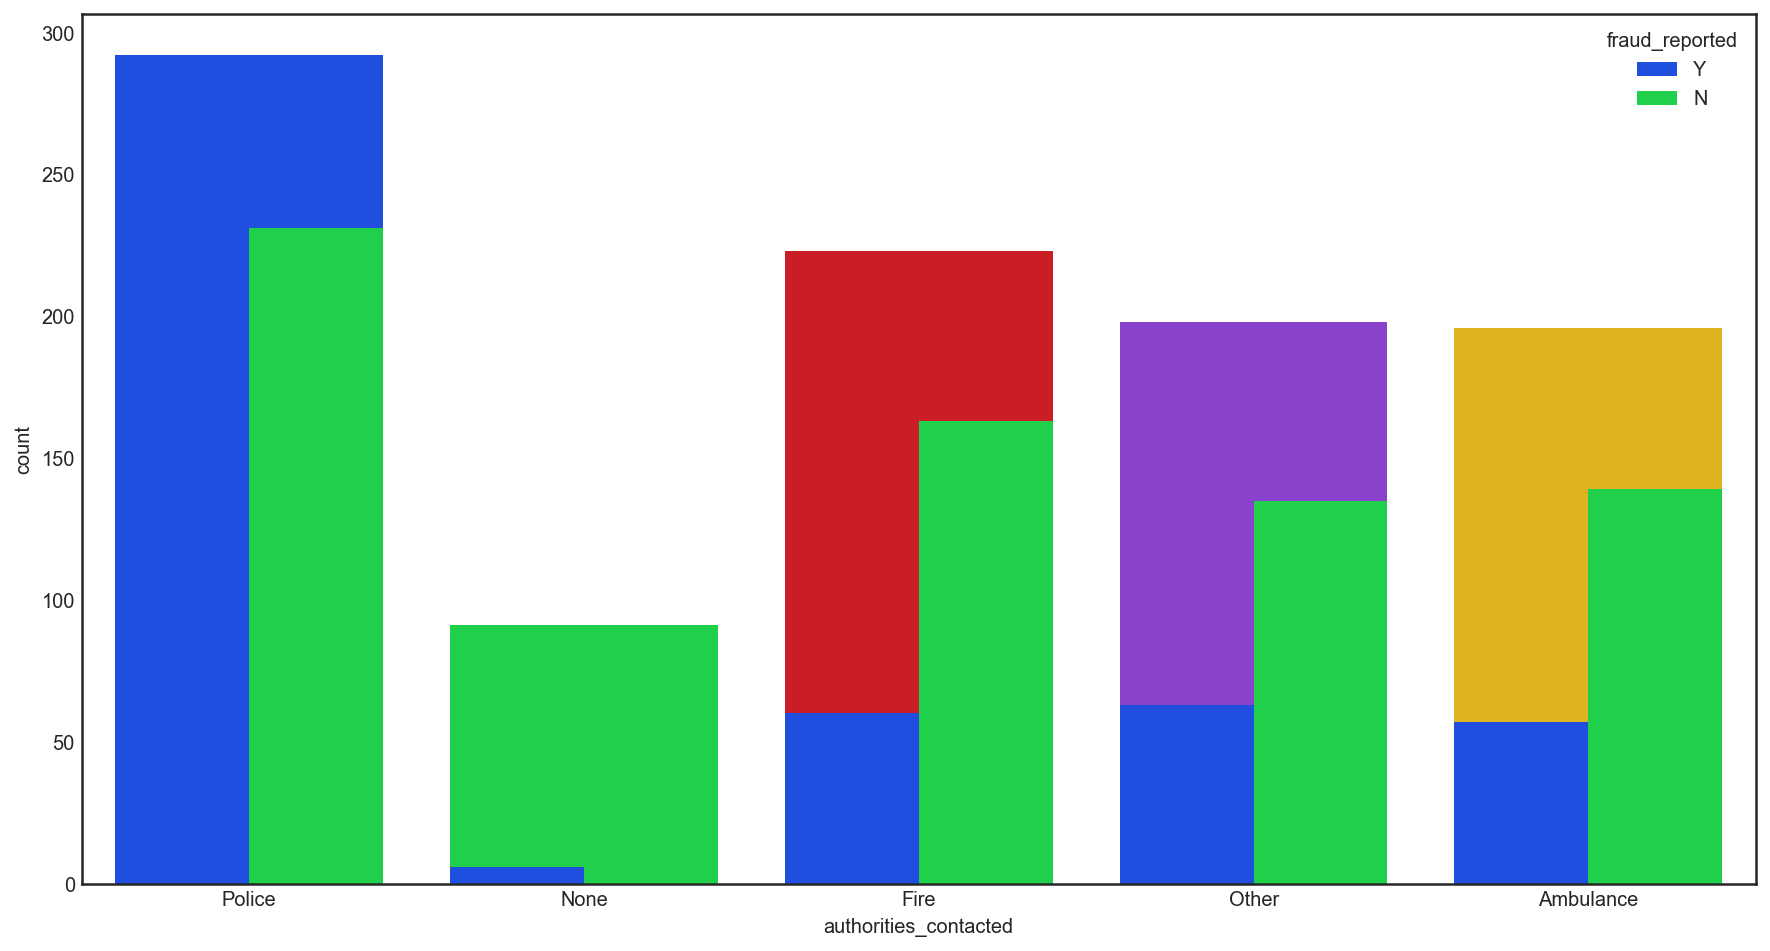

insured_relationship vs fraud_reported column ->


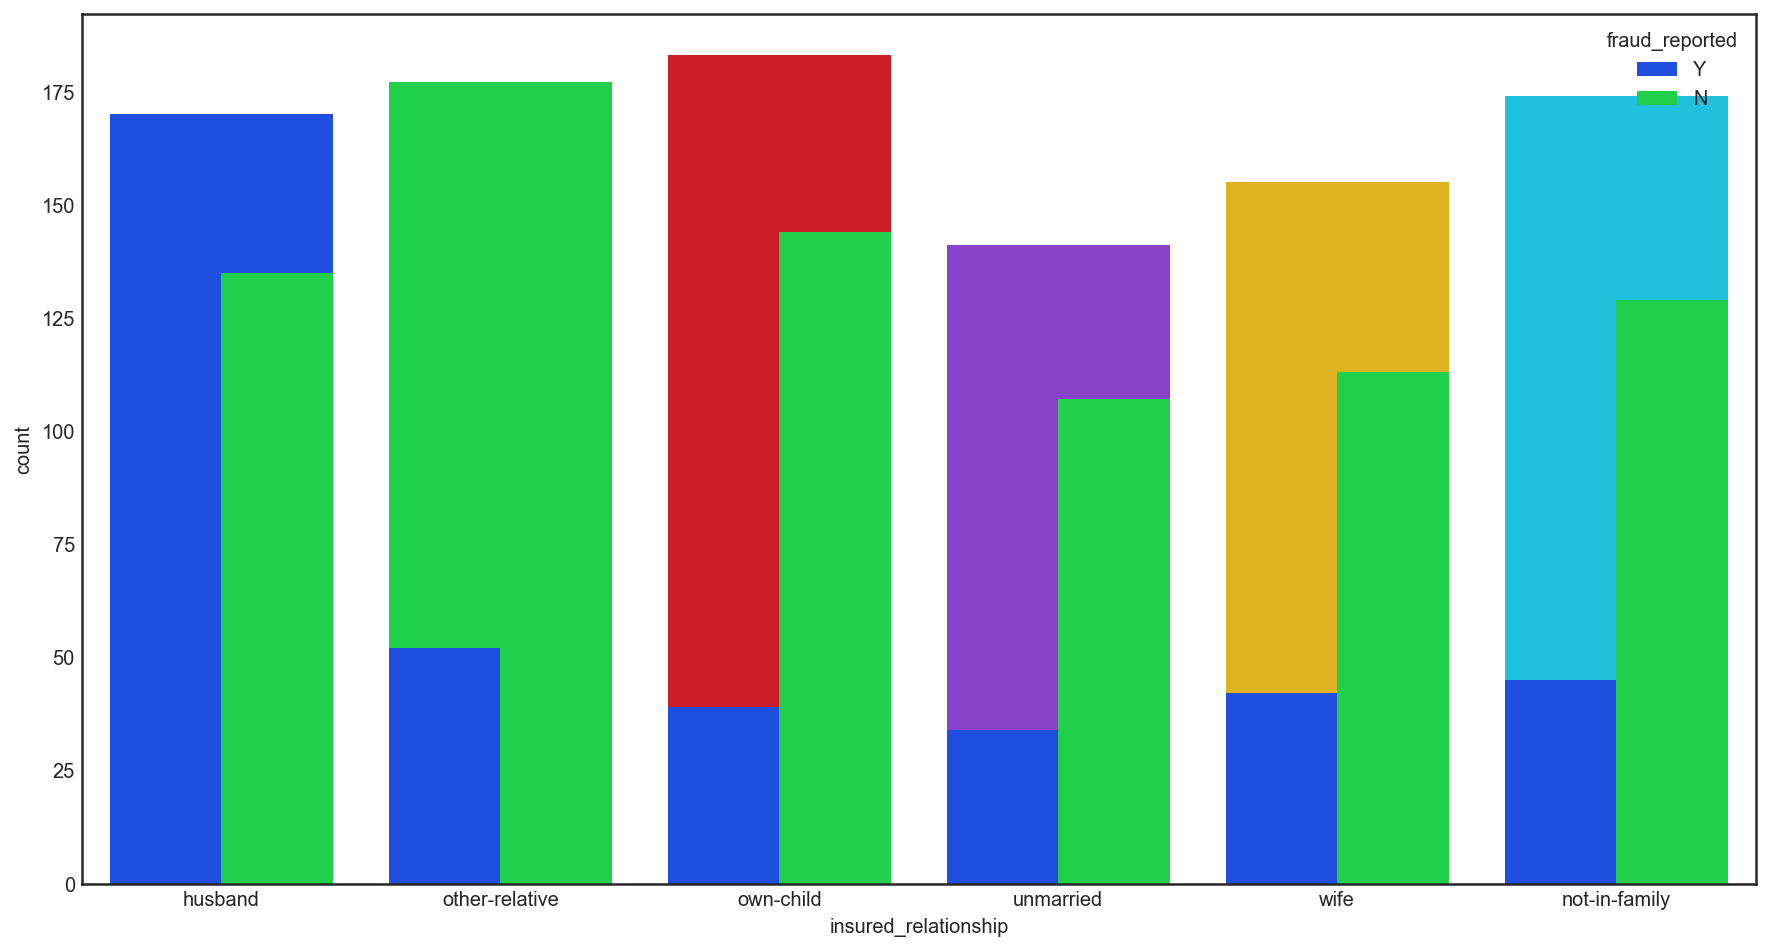

insured_education_level vs fraud_reported column ->


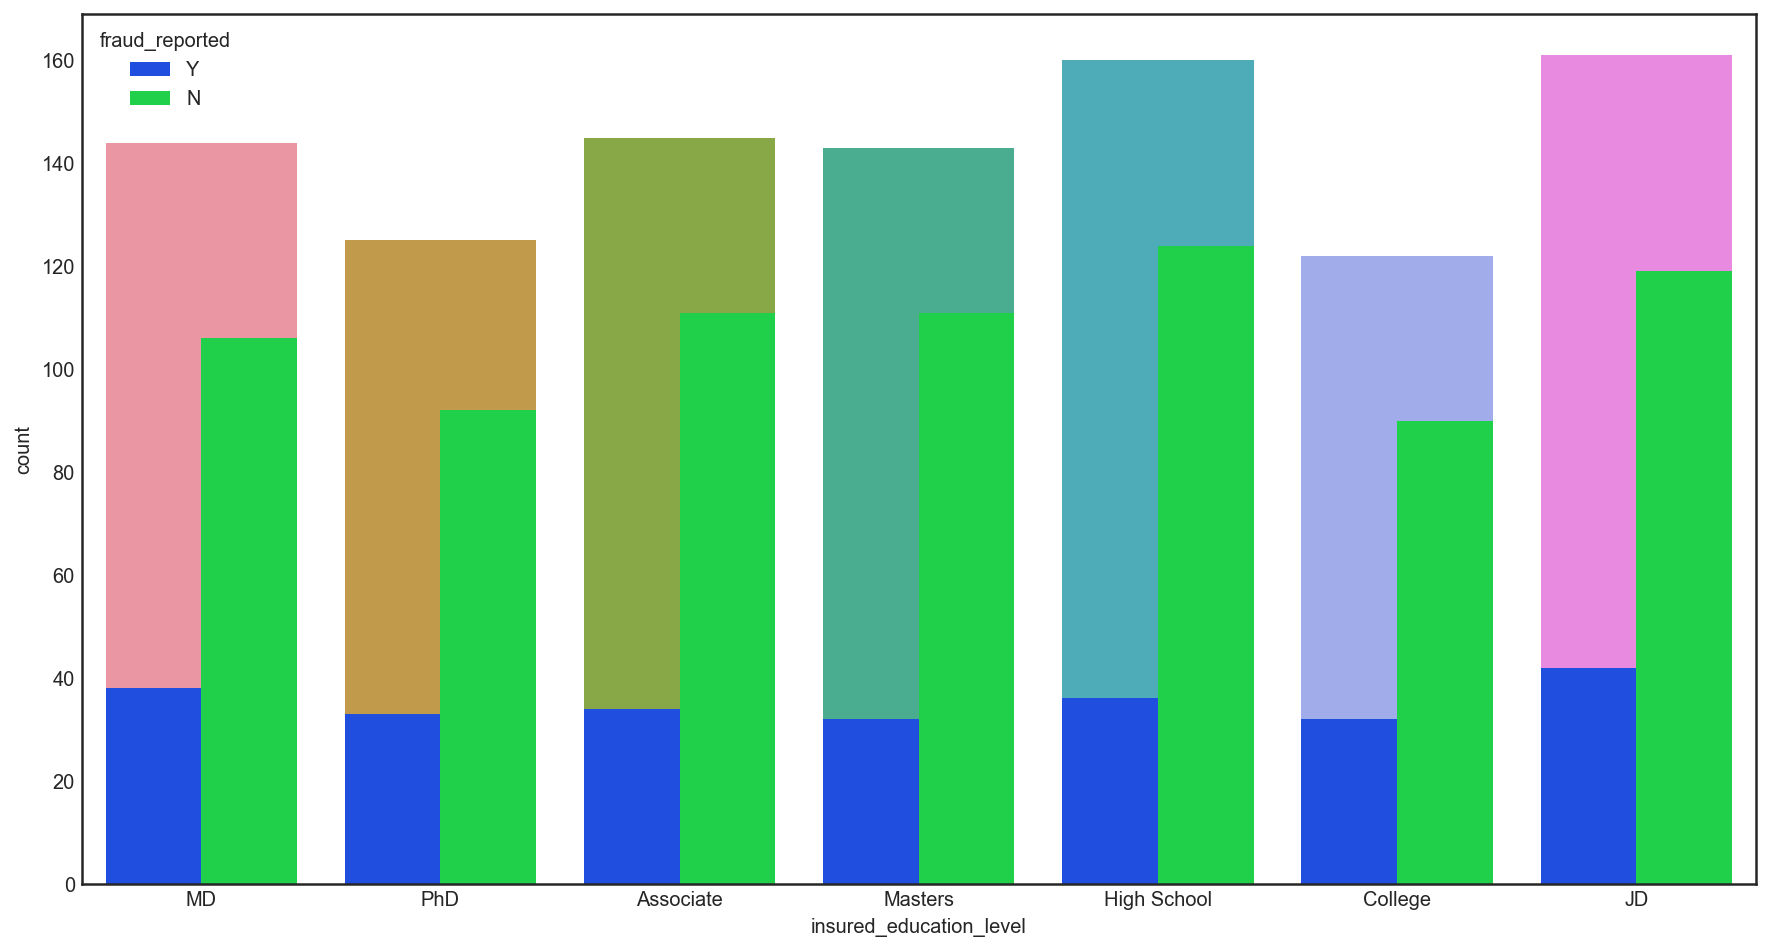

incident_state vs fraud_reported column ->


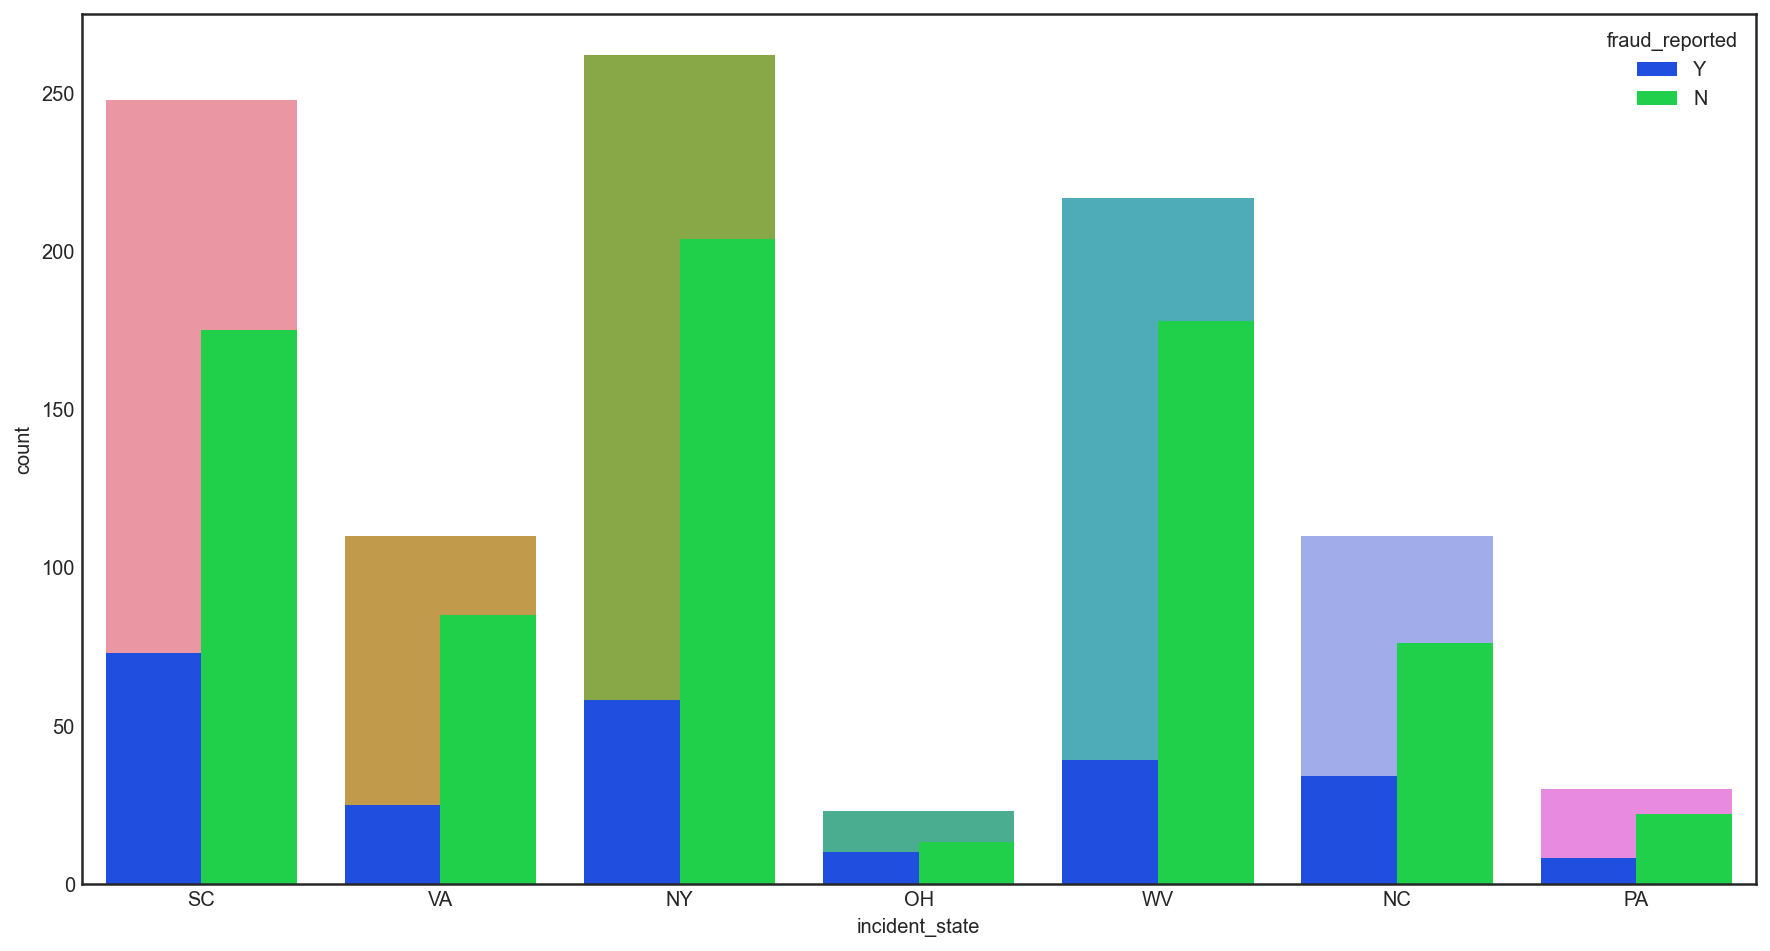

incident_city vs fraud_reported column ->


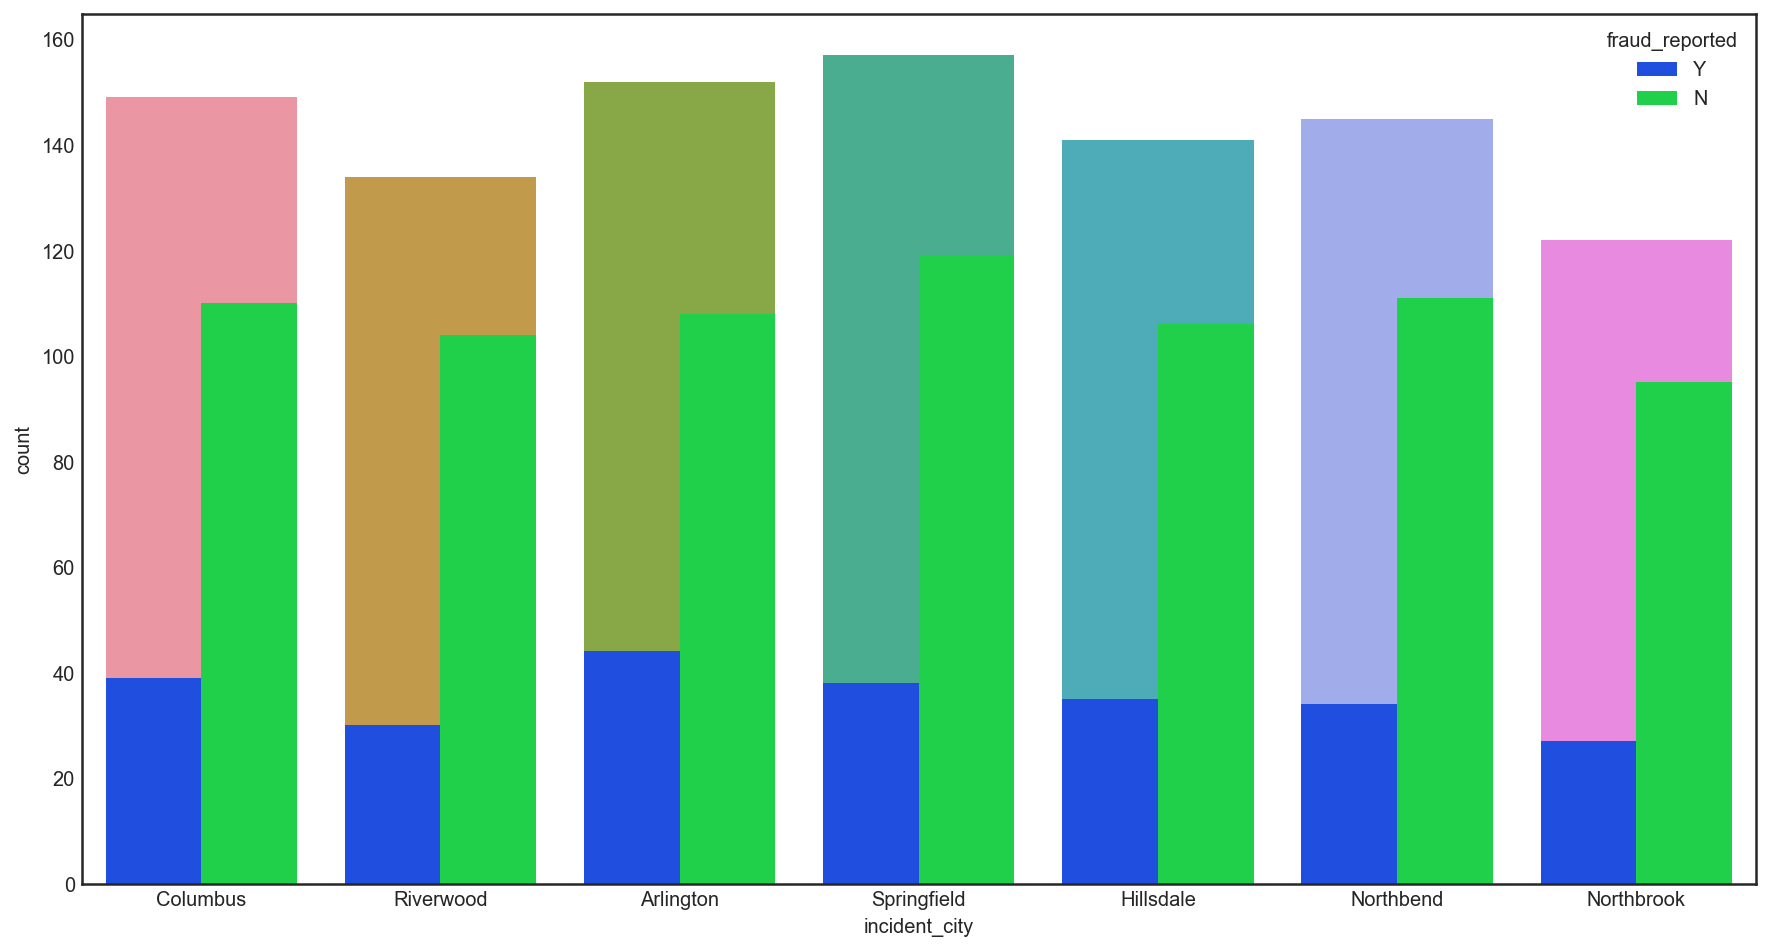

umbrella_limit vs fraud_reported column ->


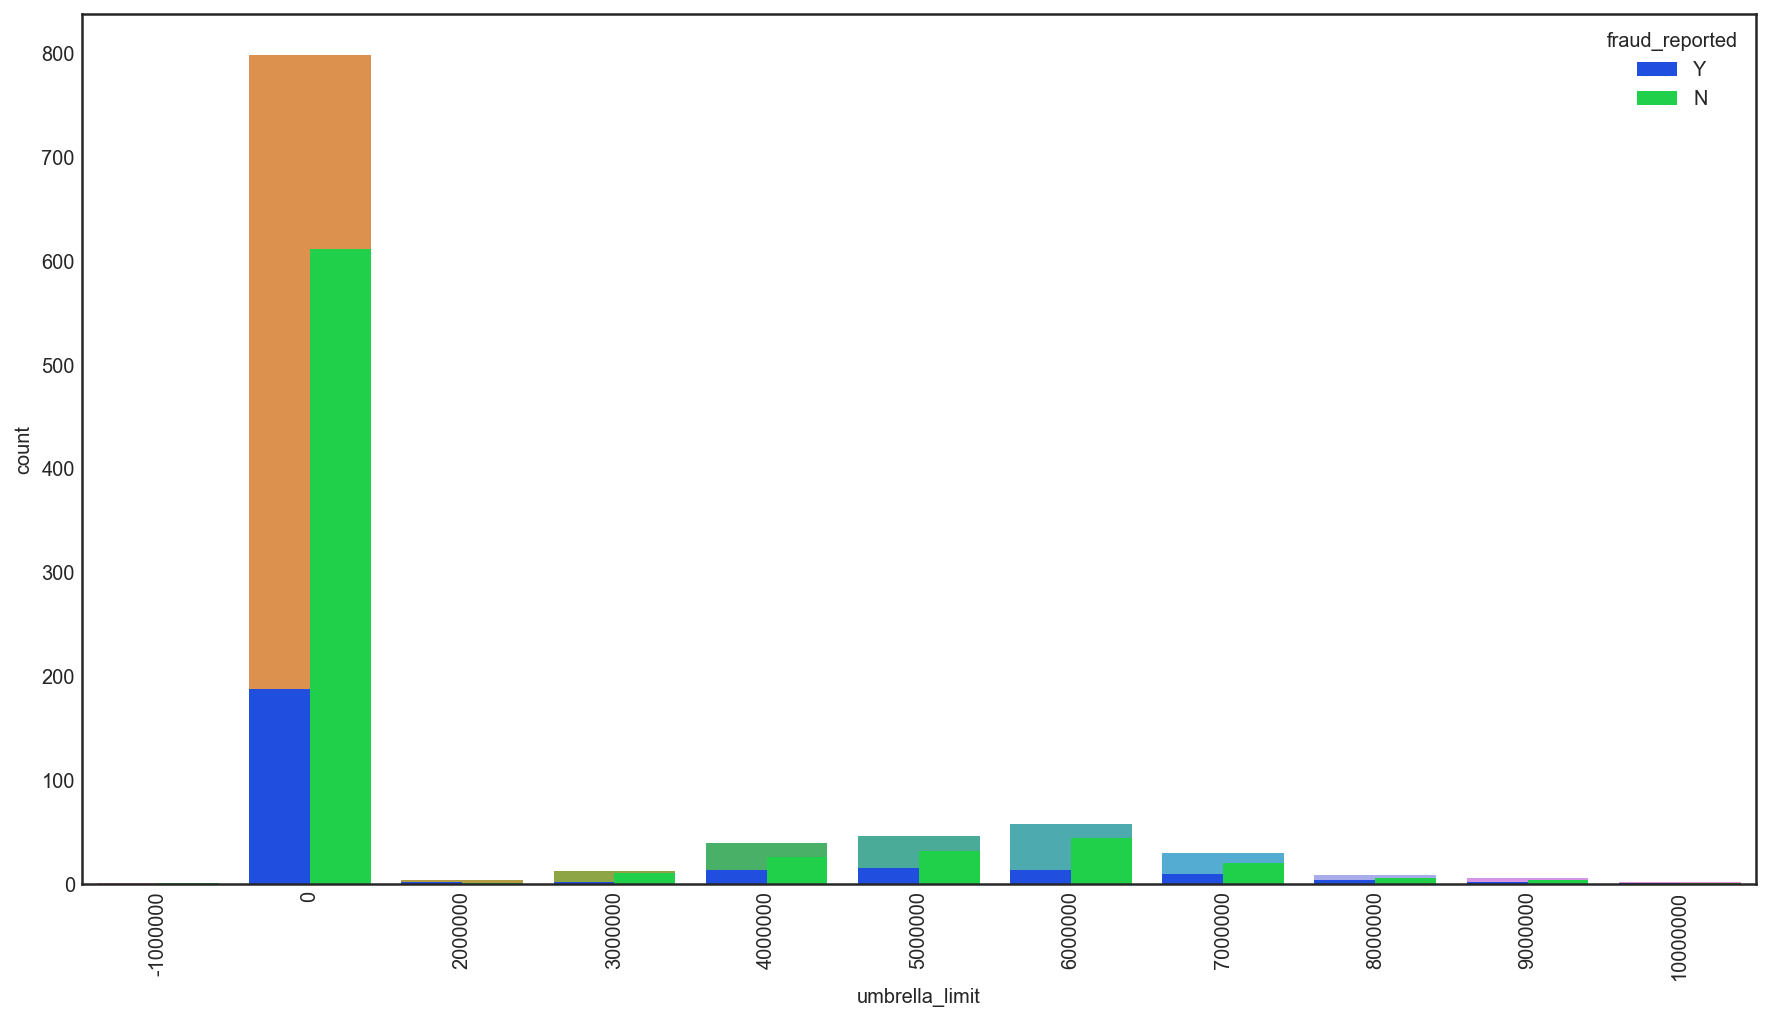

insured_occupation vs fraud_reported column ->


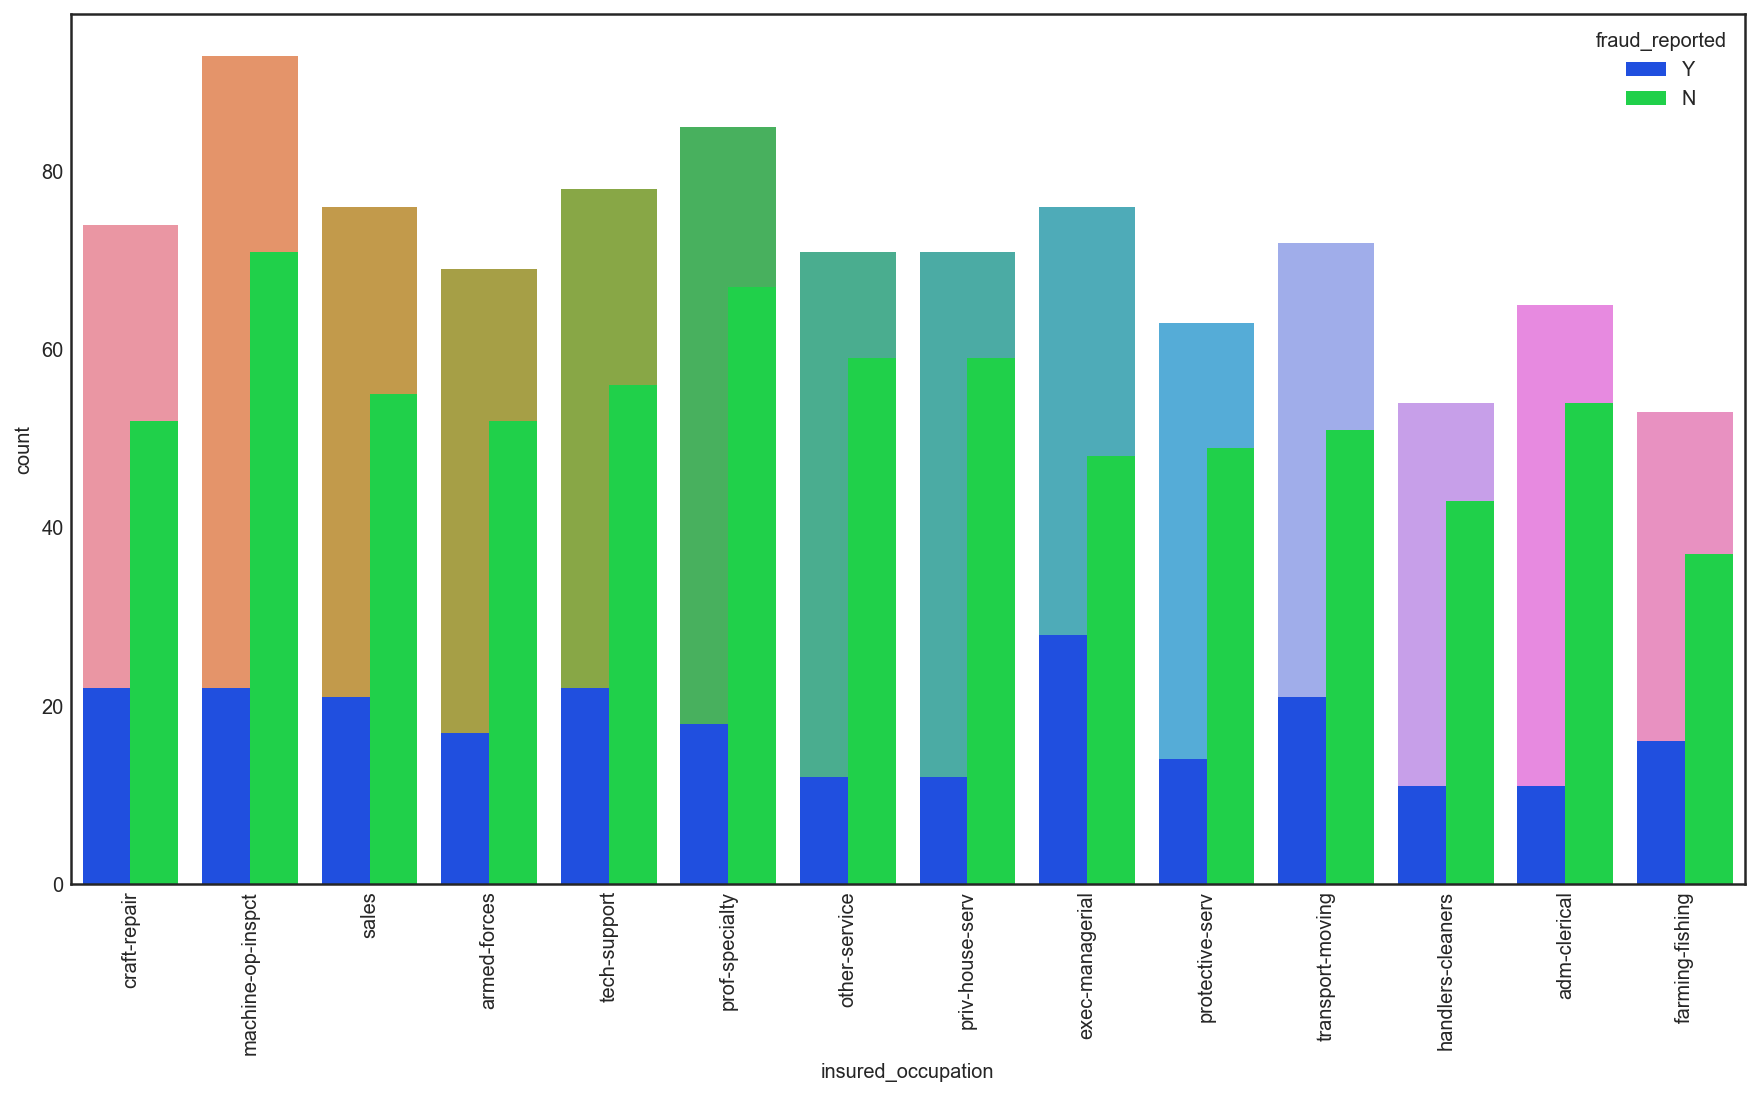

auto_make vs fraud_reported column ->


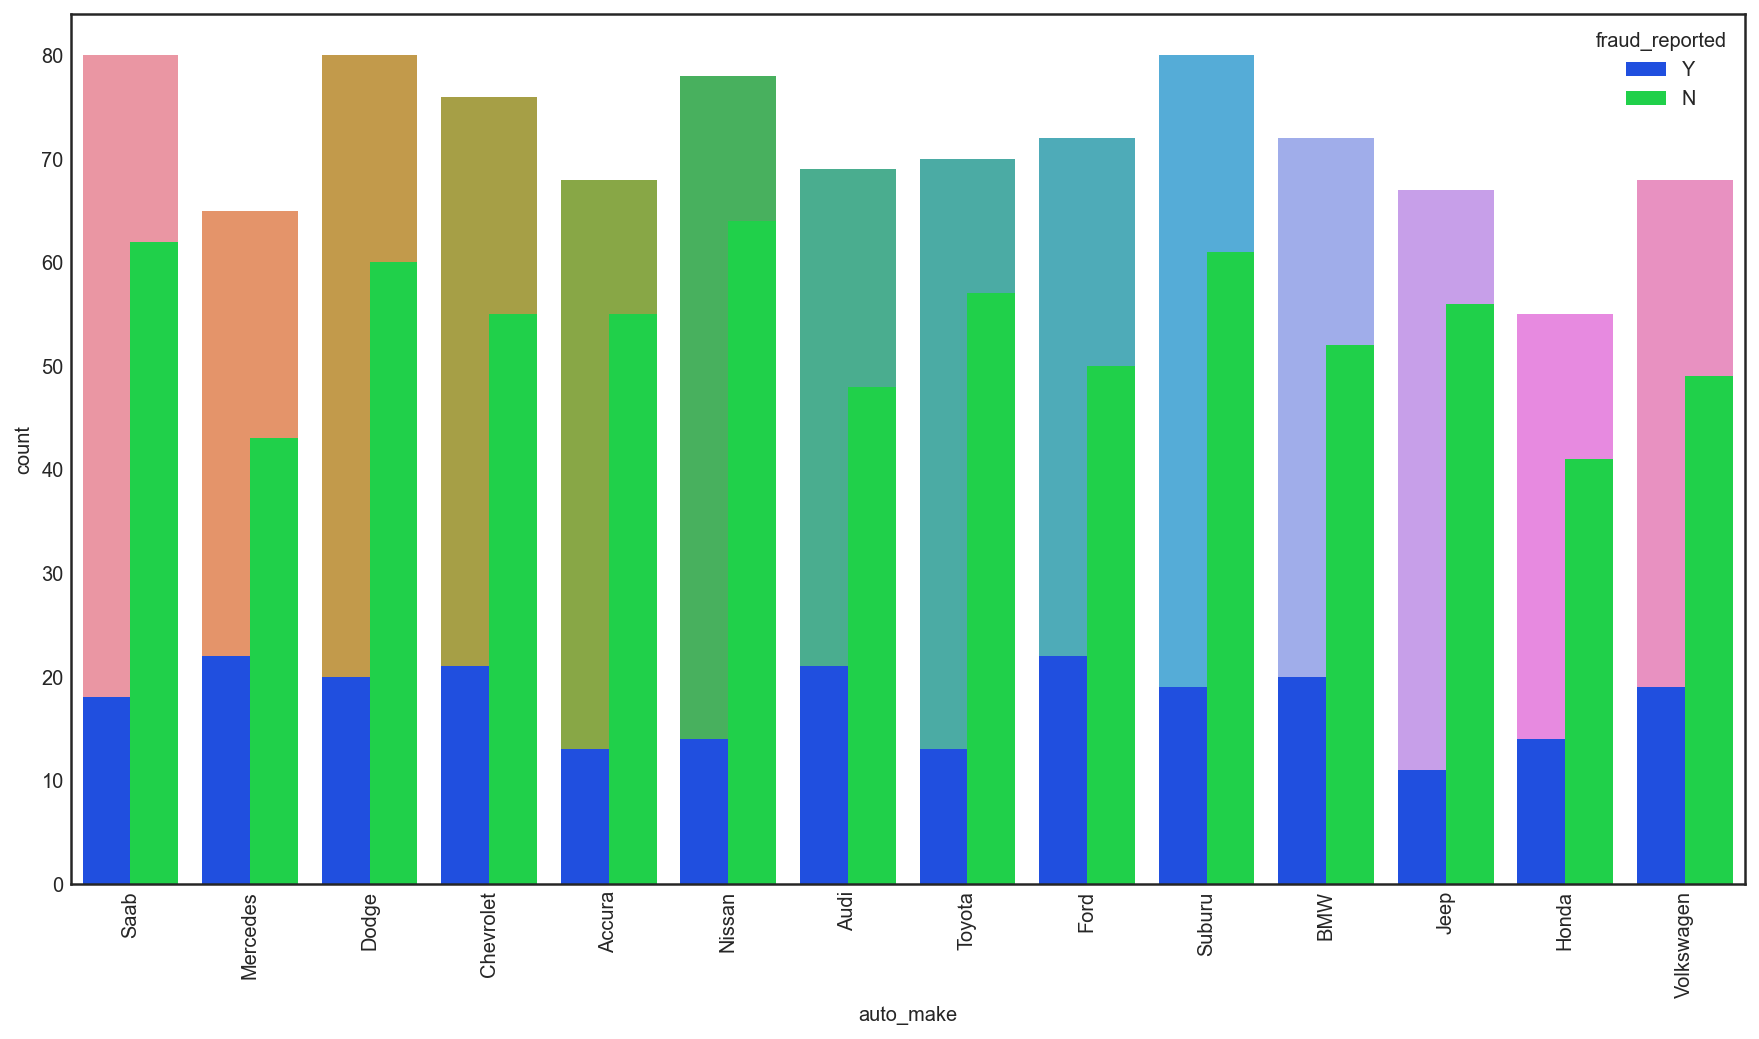

insured_hobbies vs fraud_reported column ->


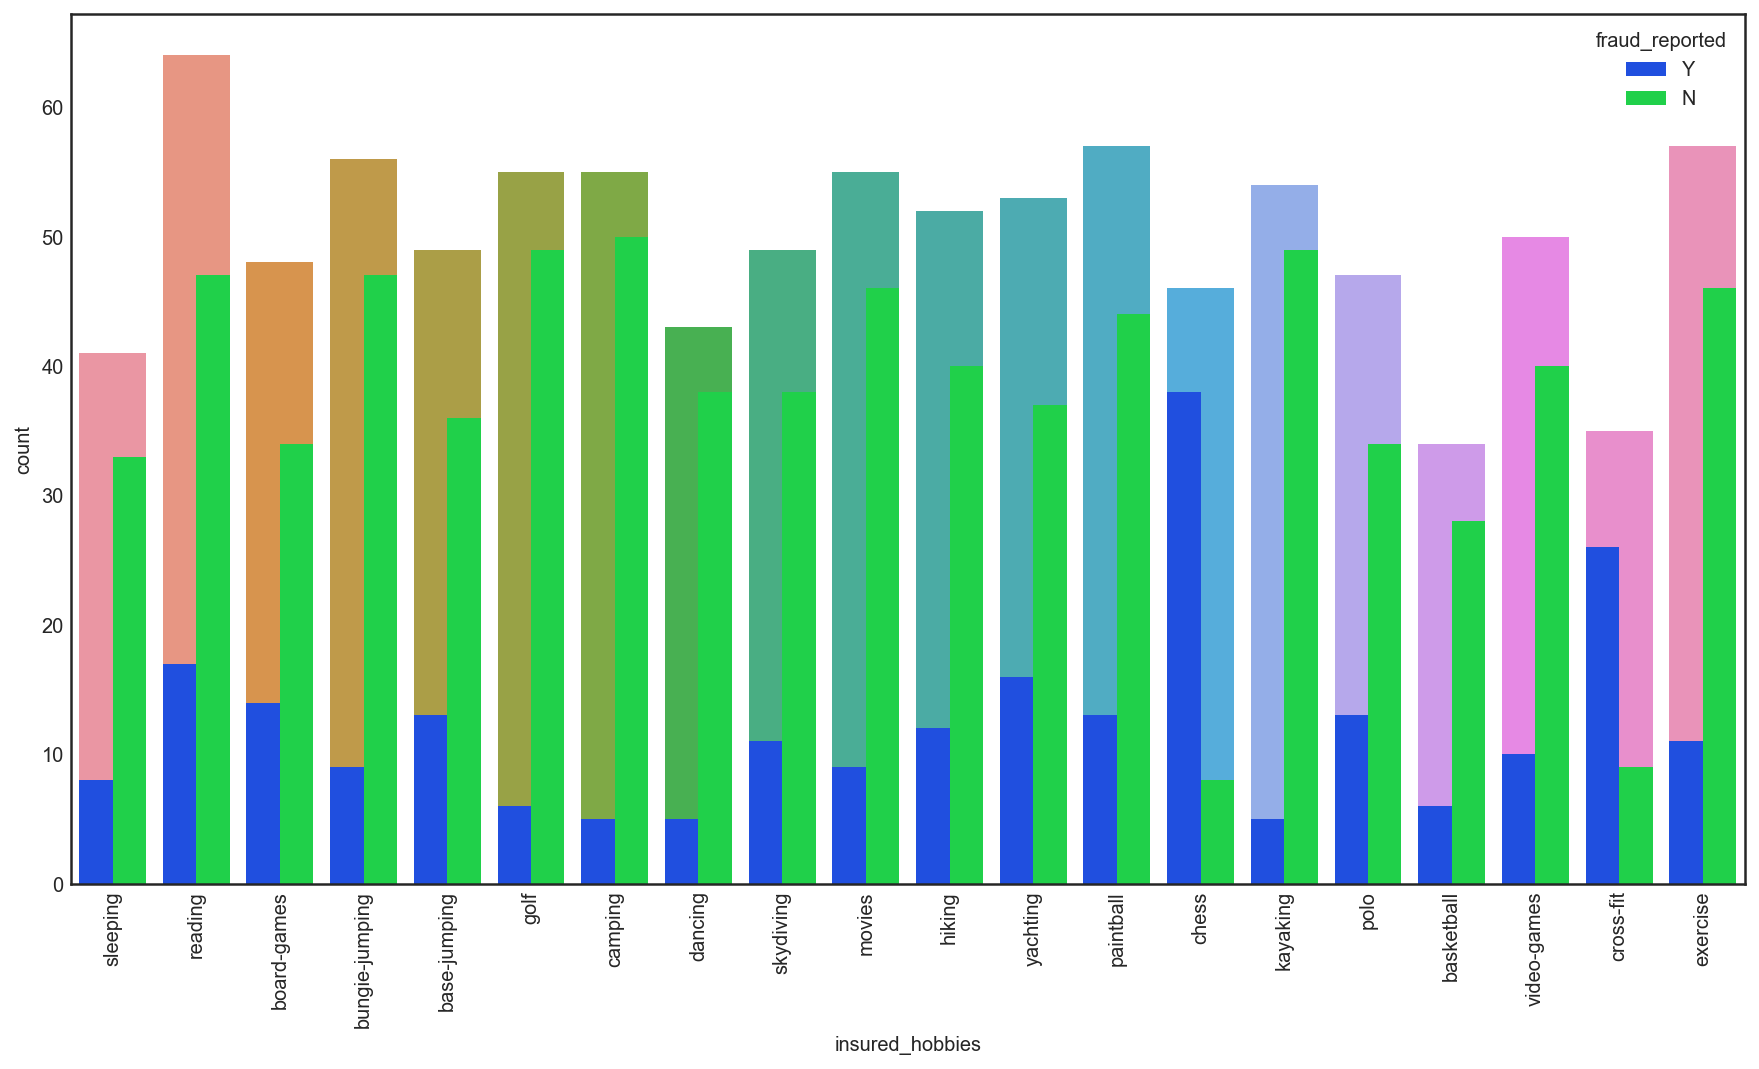

auto_model vs fraud_reported column ->


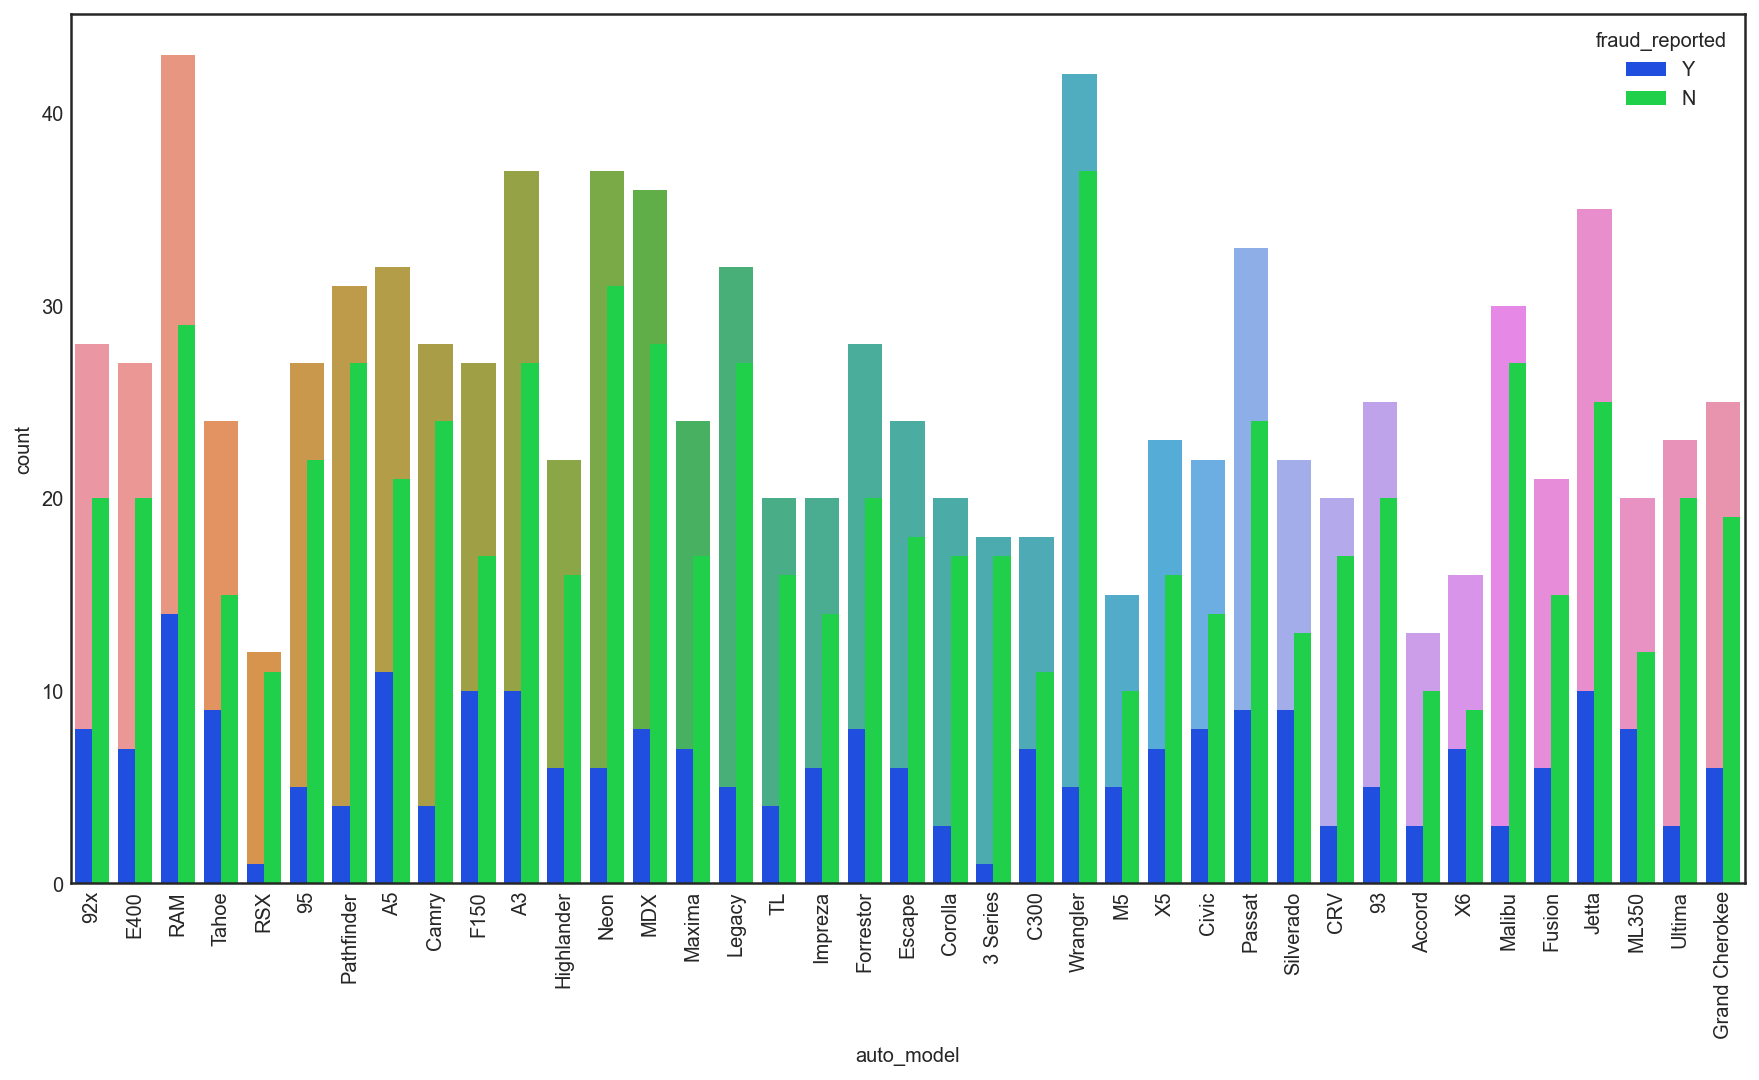

In [37]:
plt.style.use('seaborn-bright')

col1.remove("fraud_reported")

for k in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{k} vs fraud_reported column ->")
    sns.countplot(df[k])
    sns.countplot(df[k], hue=df['fraud_reported'])
    plt.show()
    
for l in df[col2]:
    plt.figure(figsize=(15,8))
    print(f"{l} vs fraud_reported column ->")
    sns.countplot(df[l])
    sns.countplot(df[l], hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

In [38]:
#have visualized all the feature columns with respect to our target variable.

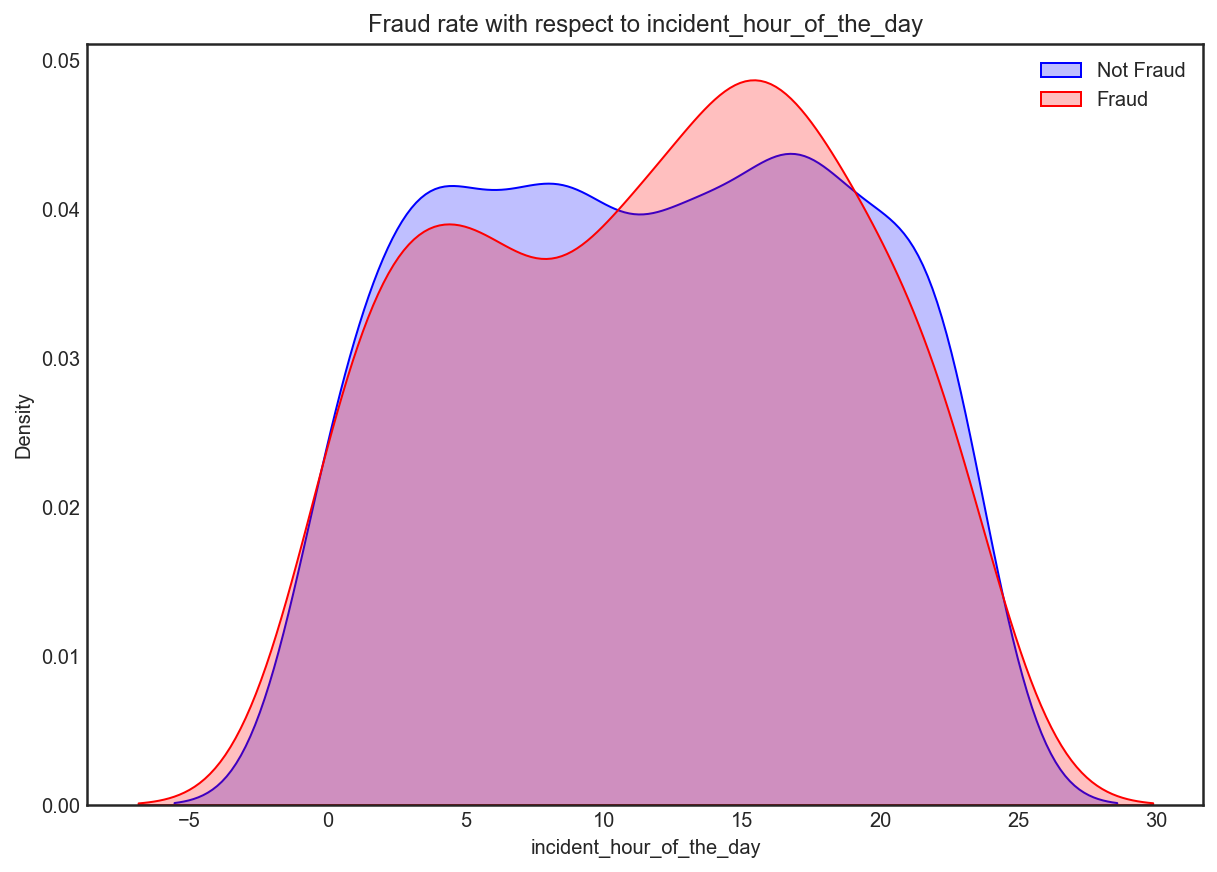

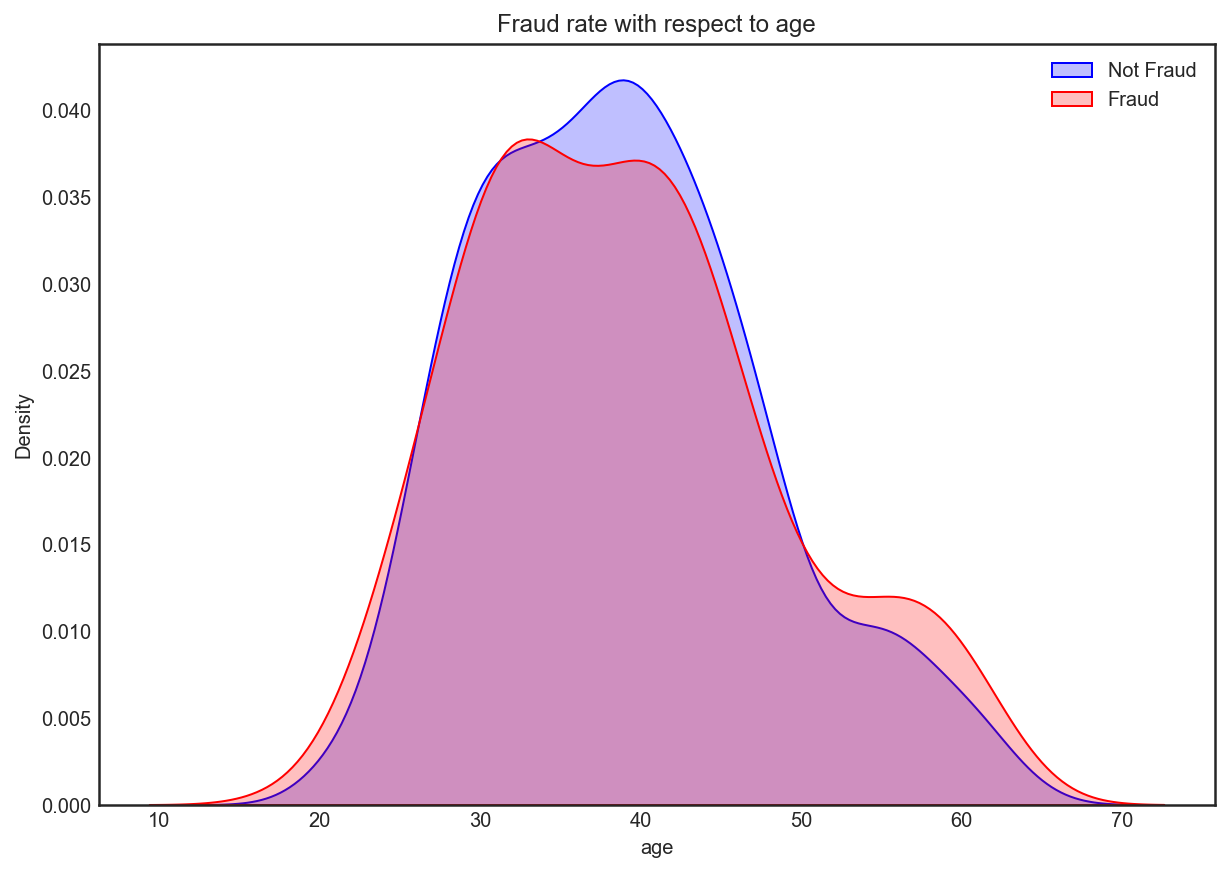

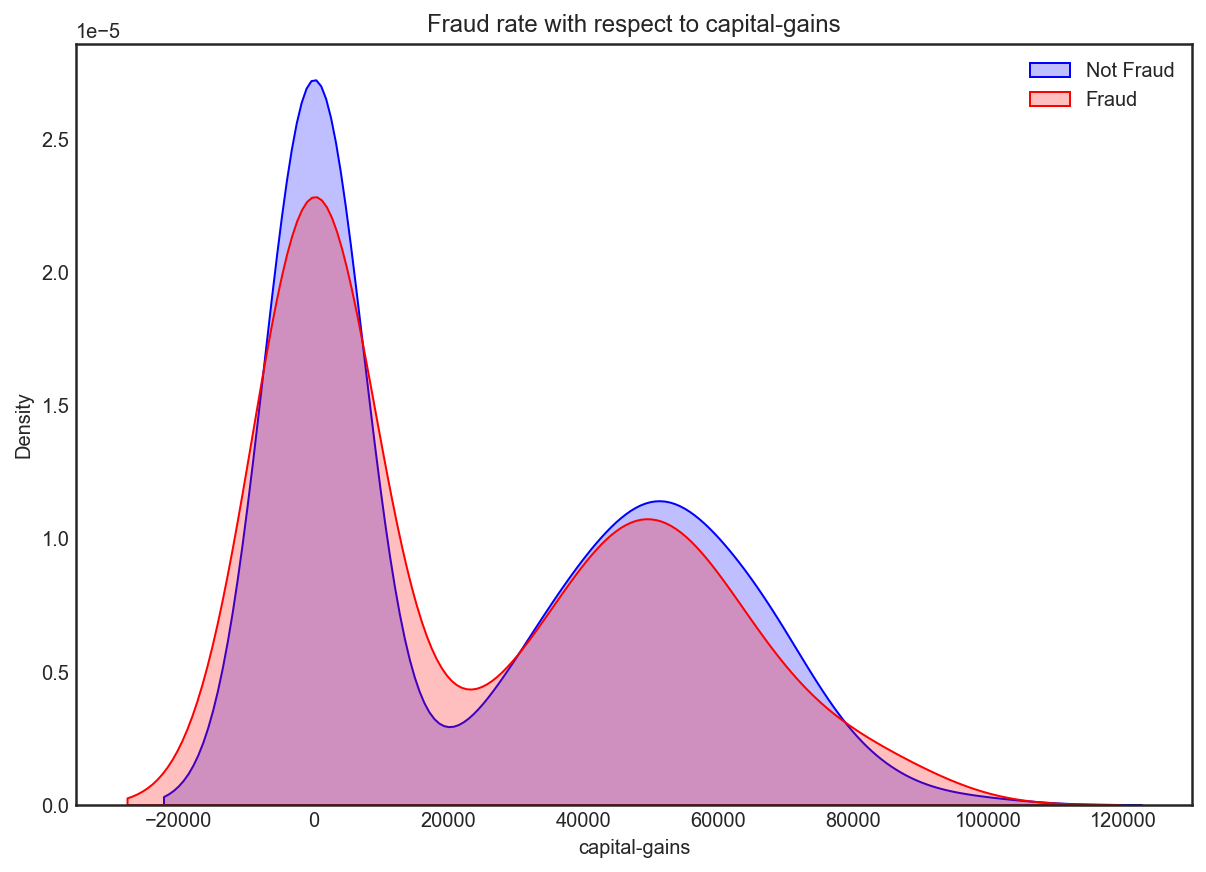

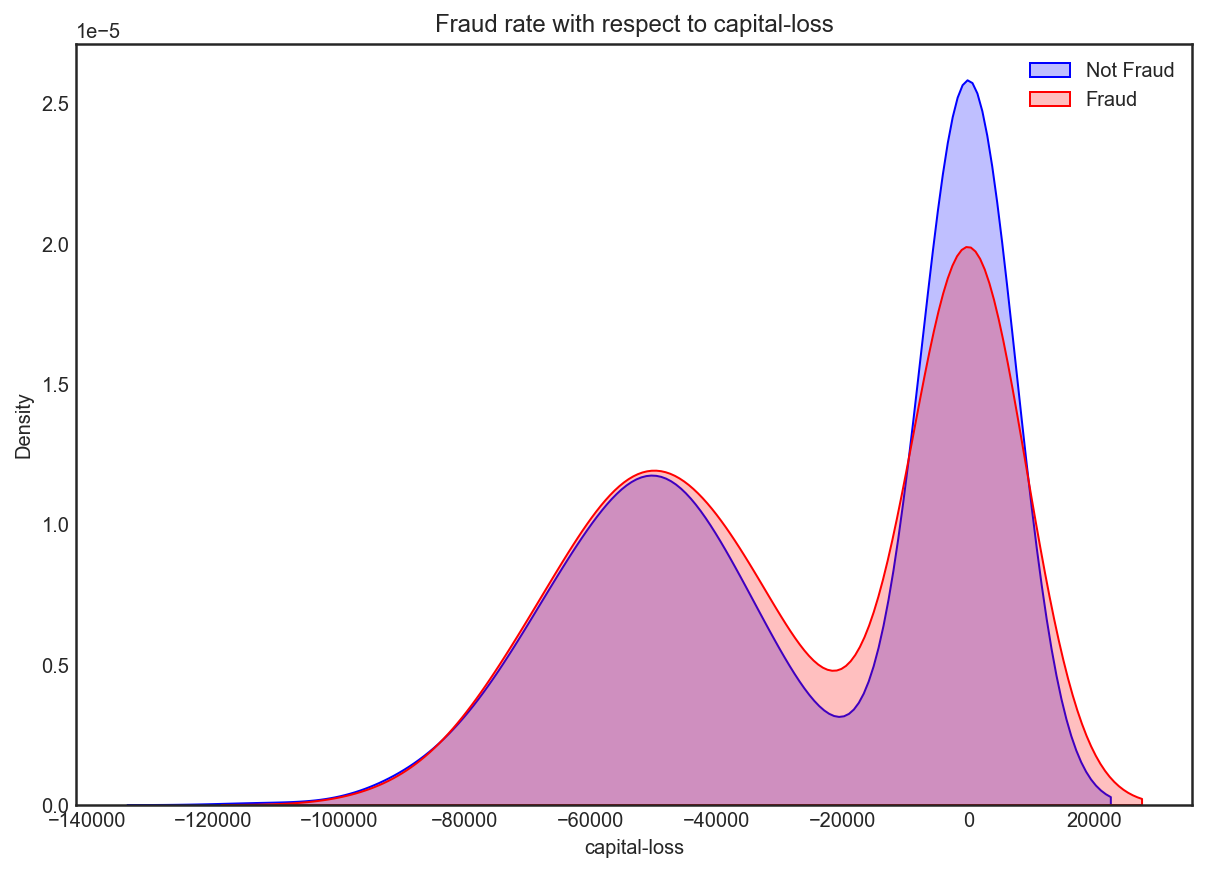

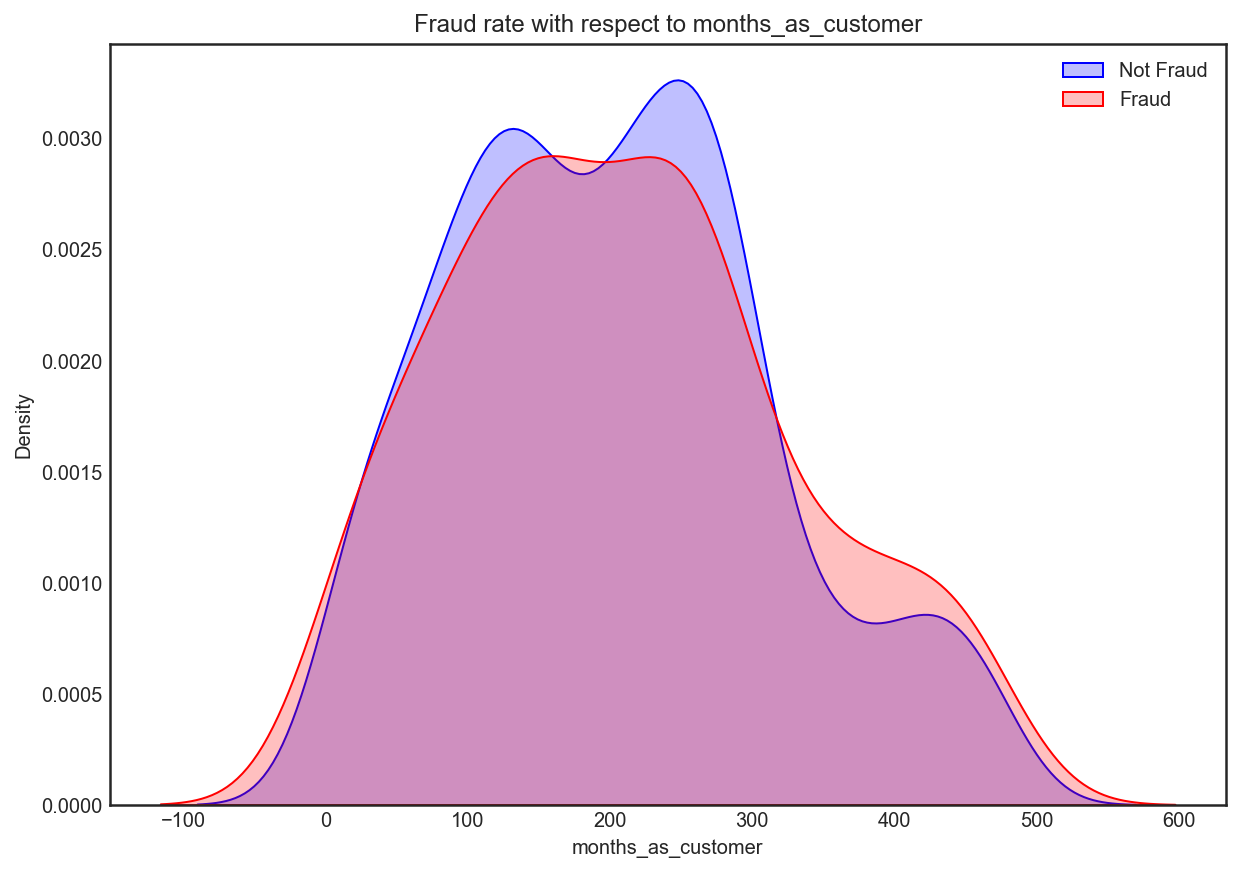

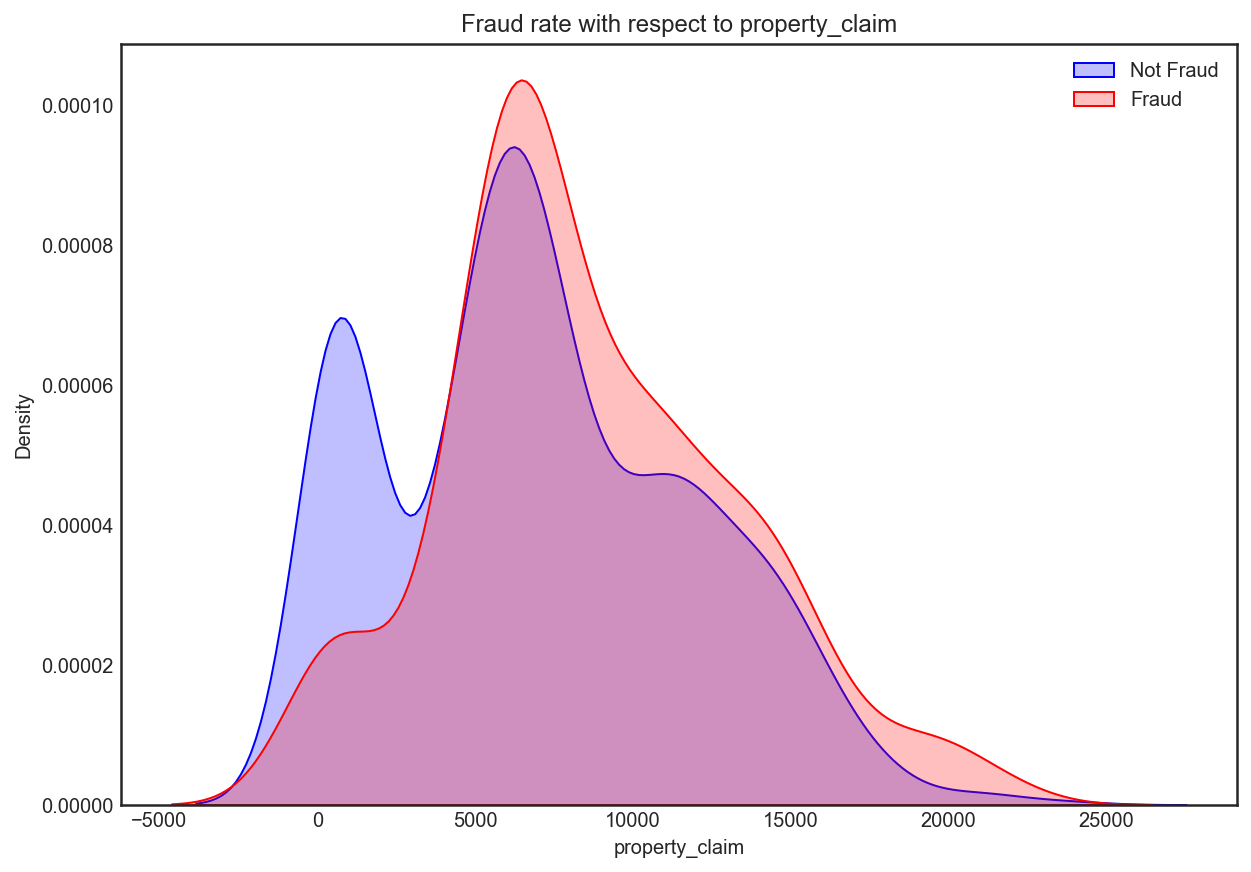

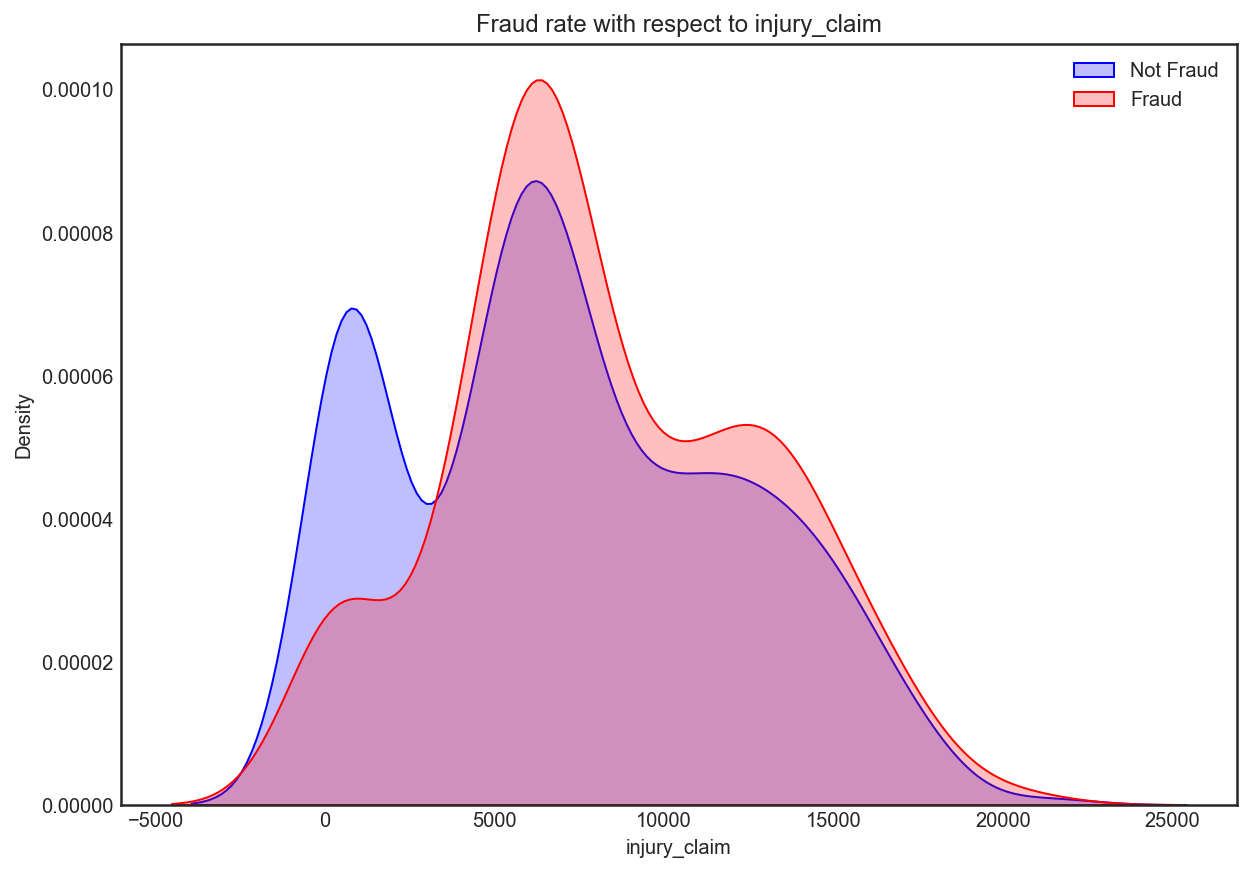

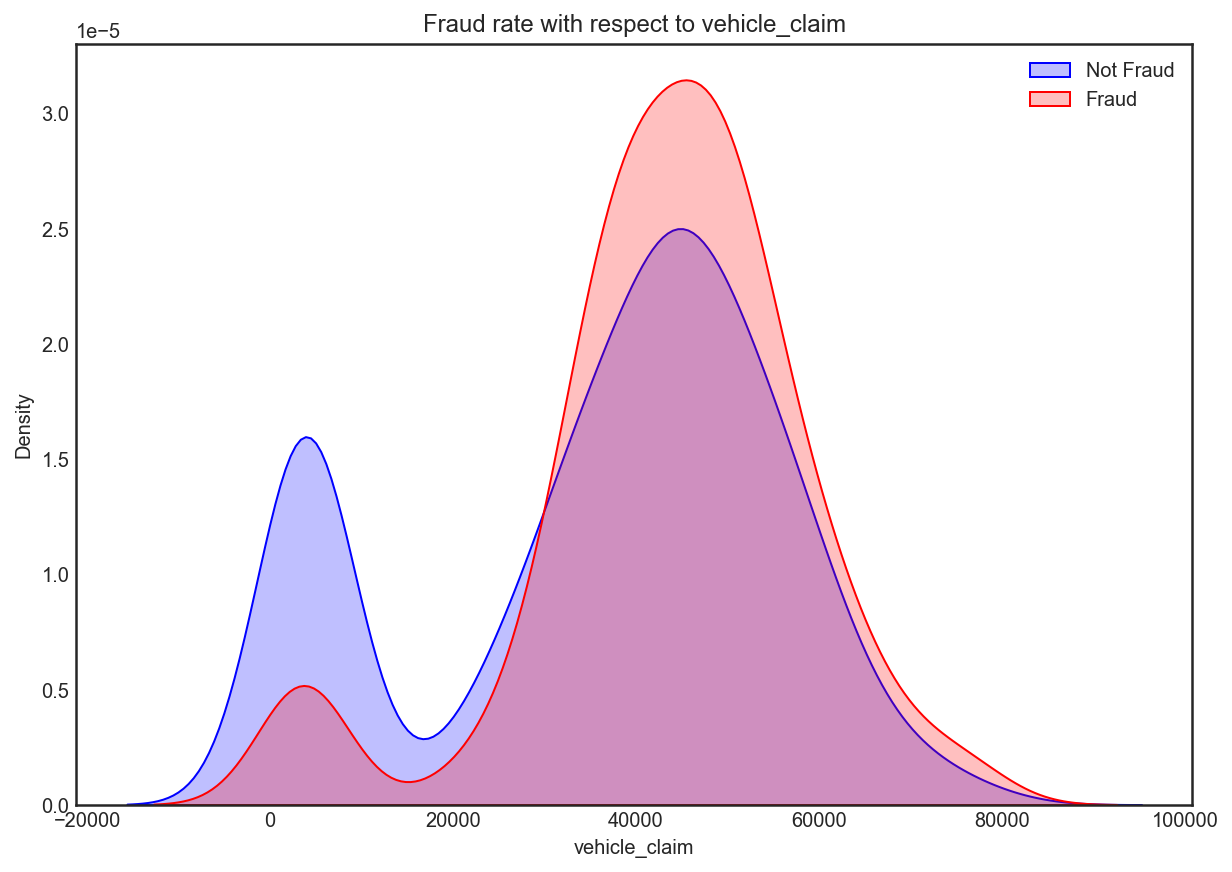

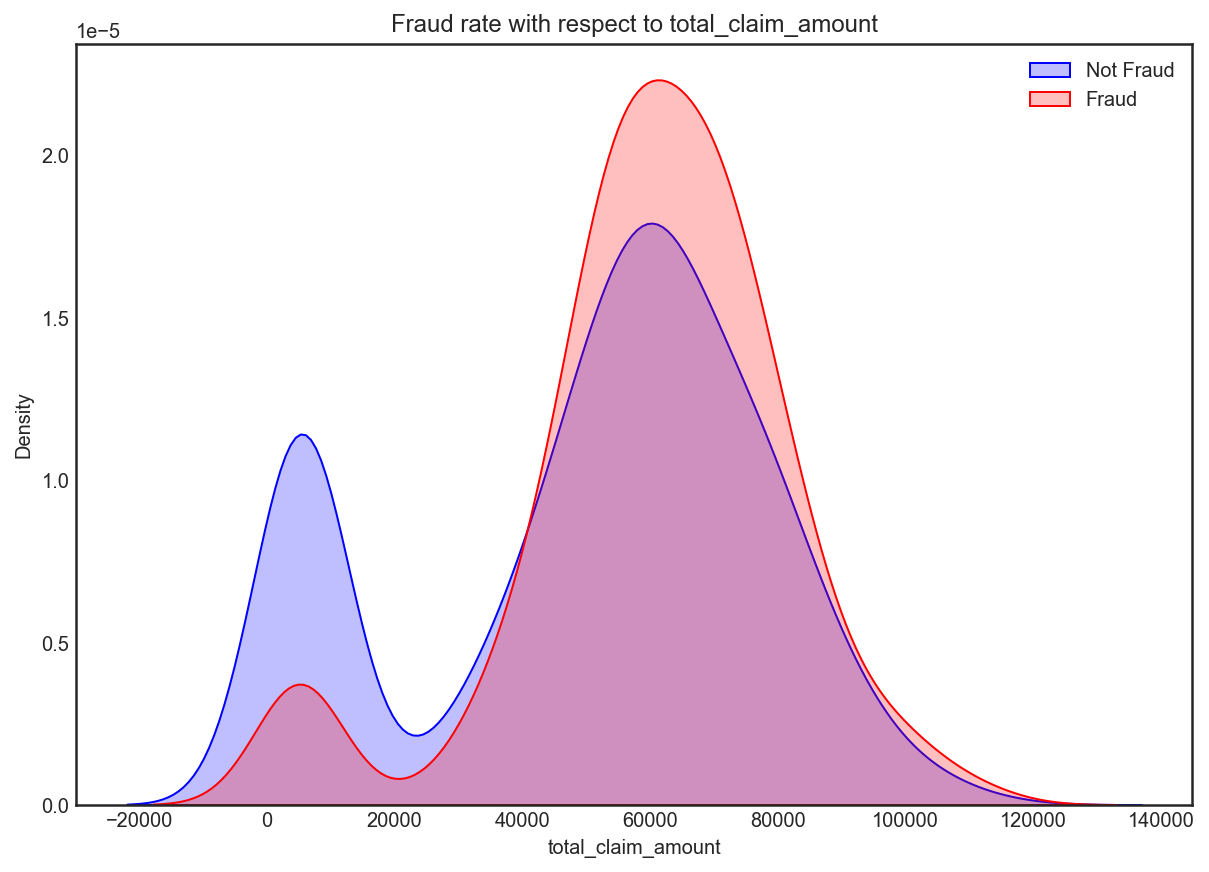

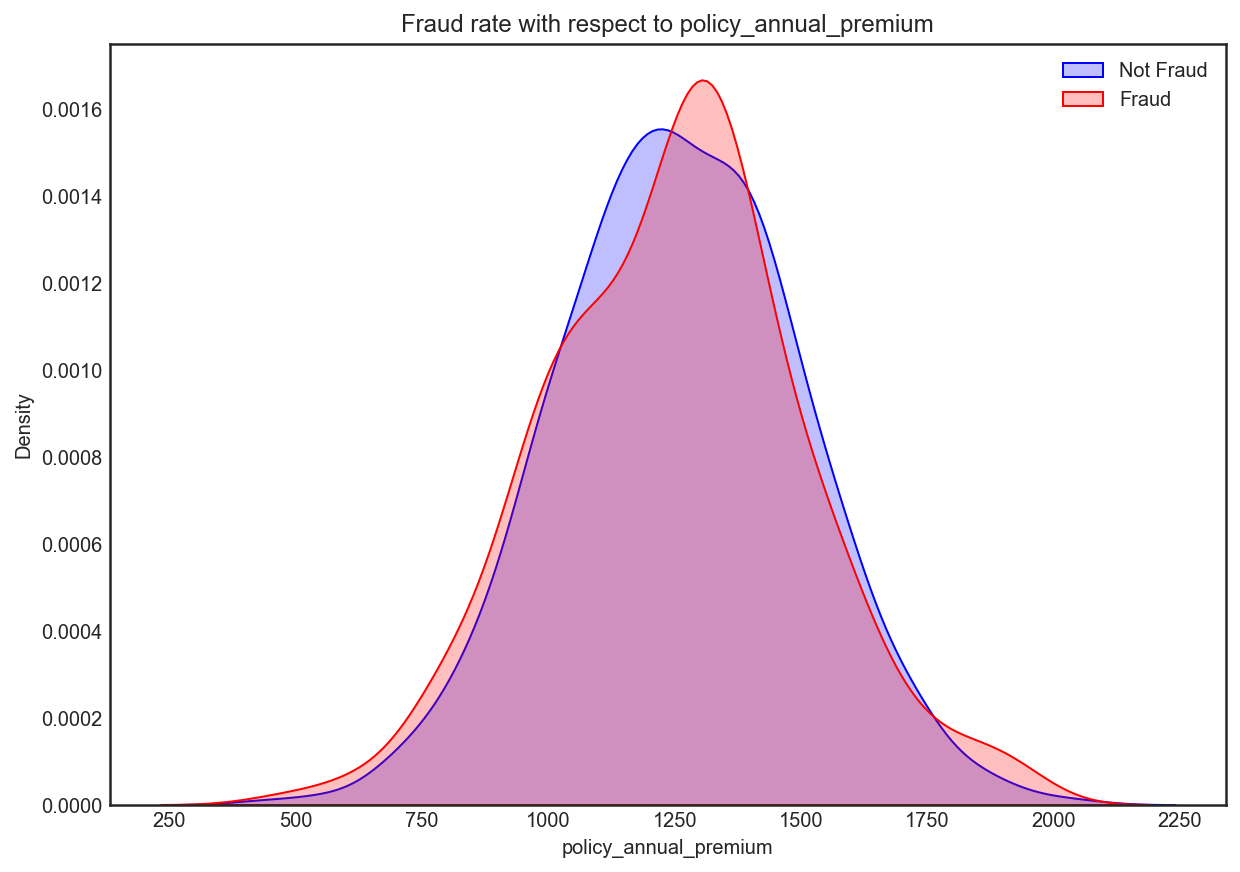

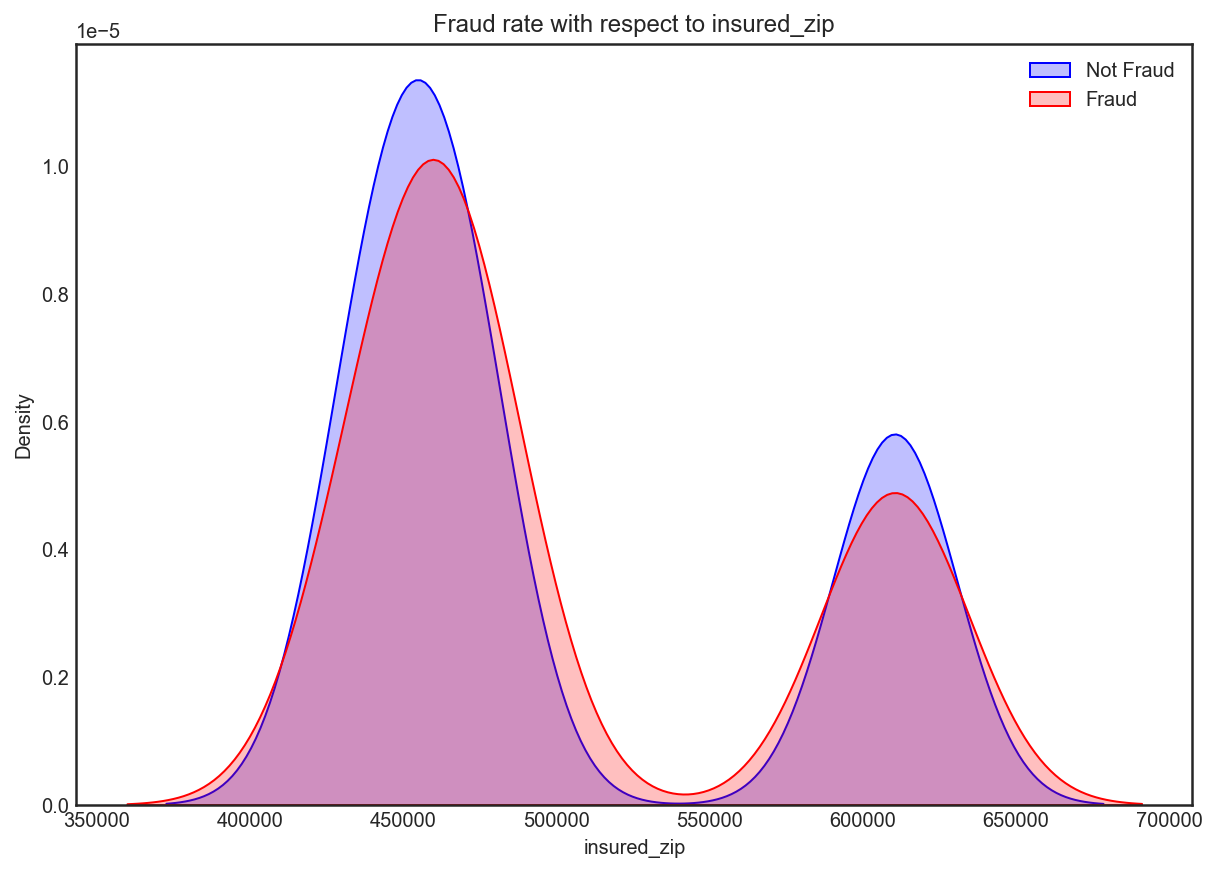

In [40]:
col3 = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

for z in df[col3]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),z], color='b', shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),z], color='r', shade=True, label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()

In [41]:
#Above visualization shows all the columns with respect to our label column

In [42]:
# getting list of all object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

object_datatype.remove('fraud_reported')
object_datatype

Object Data Type Columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [43]:
#Have removed the label column from our categorical column list so that we can use label encoder on the target and ordinal encoder on the feature columns properly.

# Encoding the categorical object datatype columns

In [44]:
# Label Encoder

le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1     questionable      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4     questionable      Minor Damage                  None             NY   

  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      Columbus                         5                            1   
1     Riverwood                         8                            1   
2      Columbus                         7                            3   
3     Arlington                         5                            1   
4     Arlington                        20                            1   

  property_damage  bodily_injuries  witnesses police_report_available  \
0             YES                1          2                     YES   
1    questionable                0          0            questionable   
2              NO                2          3                      NO   
3    questionable                1          2                      NO   
4              NO                0          1                      NO   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       Saab   
1                5070           780             780           3510   Mercedes   
2               34650          7700            3850          23100      Dodge   
3               63400          6340            6340          50720  Chevrolet   
4                6500          1300             650           4550     Accura   

  auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0        92x       2004               1               17                 10   
1       E400       2007               1               27                  6   
2        RAM       2007               0                9                  6   
3      Tahoe       2014               1               25                  5   
4        RSX       2009               0         

In [45]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, object_datatype)
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             2.0                0.0                    4.0             4.0   
1             3.0                1.0                    4.0             5.0   
2             1.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             3.0                1.0                    2.0             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              2.0                0          0                      2.0   
2              0.0                2          3                      0.0   
3              2.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0         1.0       2004               1               17                 10   
1        12.0       2007               1               27                  6   
2        30.0       2007               0                9                  6   
3        34.0       2014               1               25                  5   
4        31.0       2009             

In [46]:
df.isnull().sum()

#Checking for null values

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

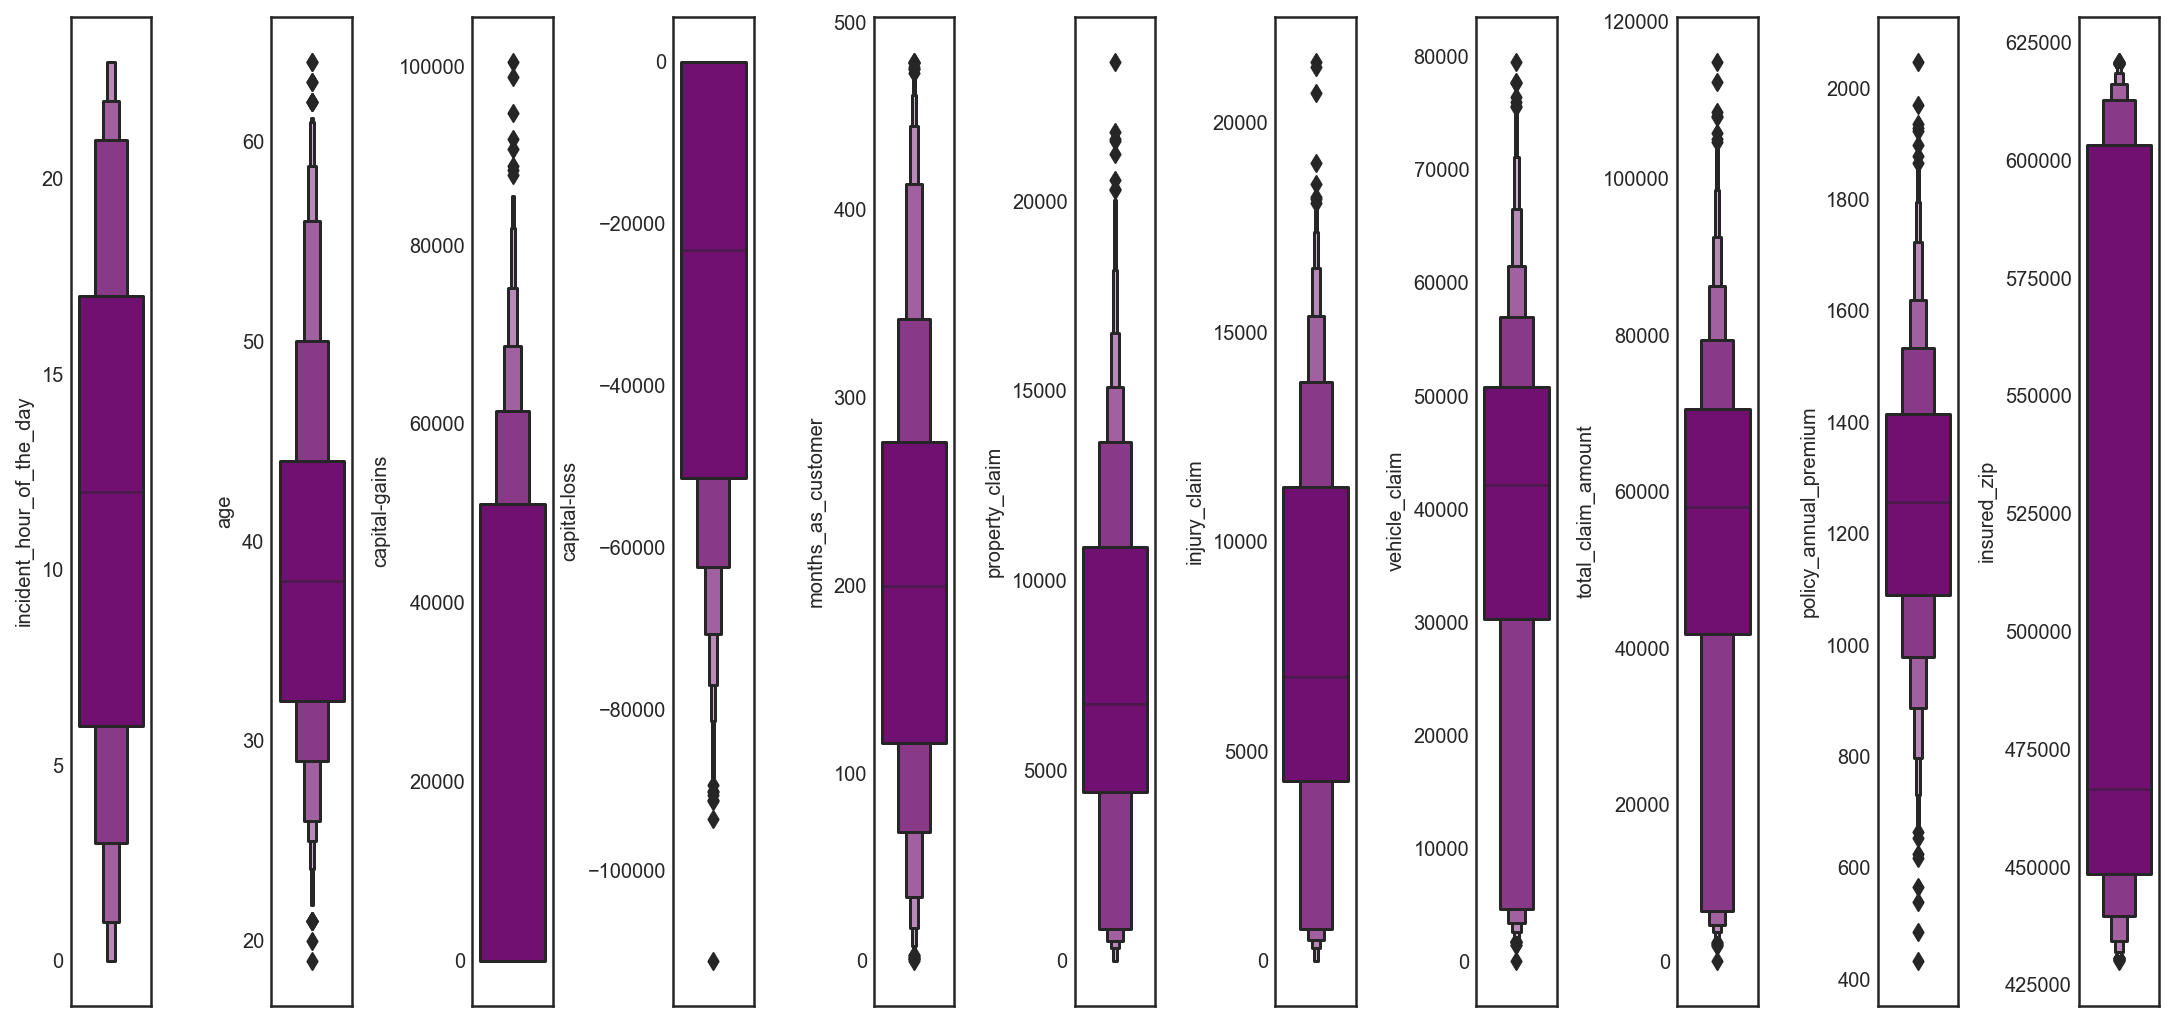

In [47]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [48]:
#With the help of boxen plot we can see the outlier details present in our numerical data columns which will need to be treated.

In [49]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


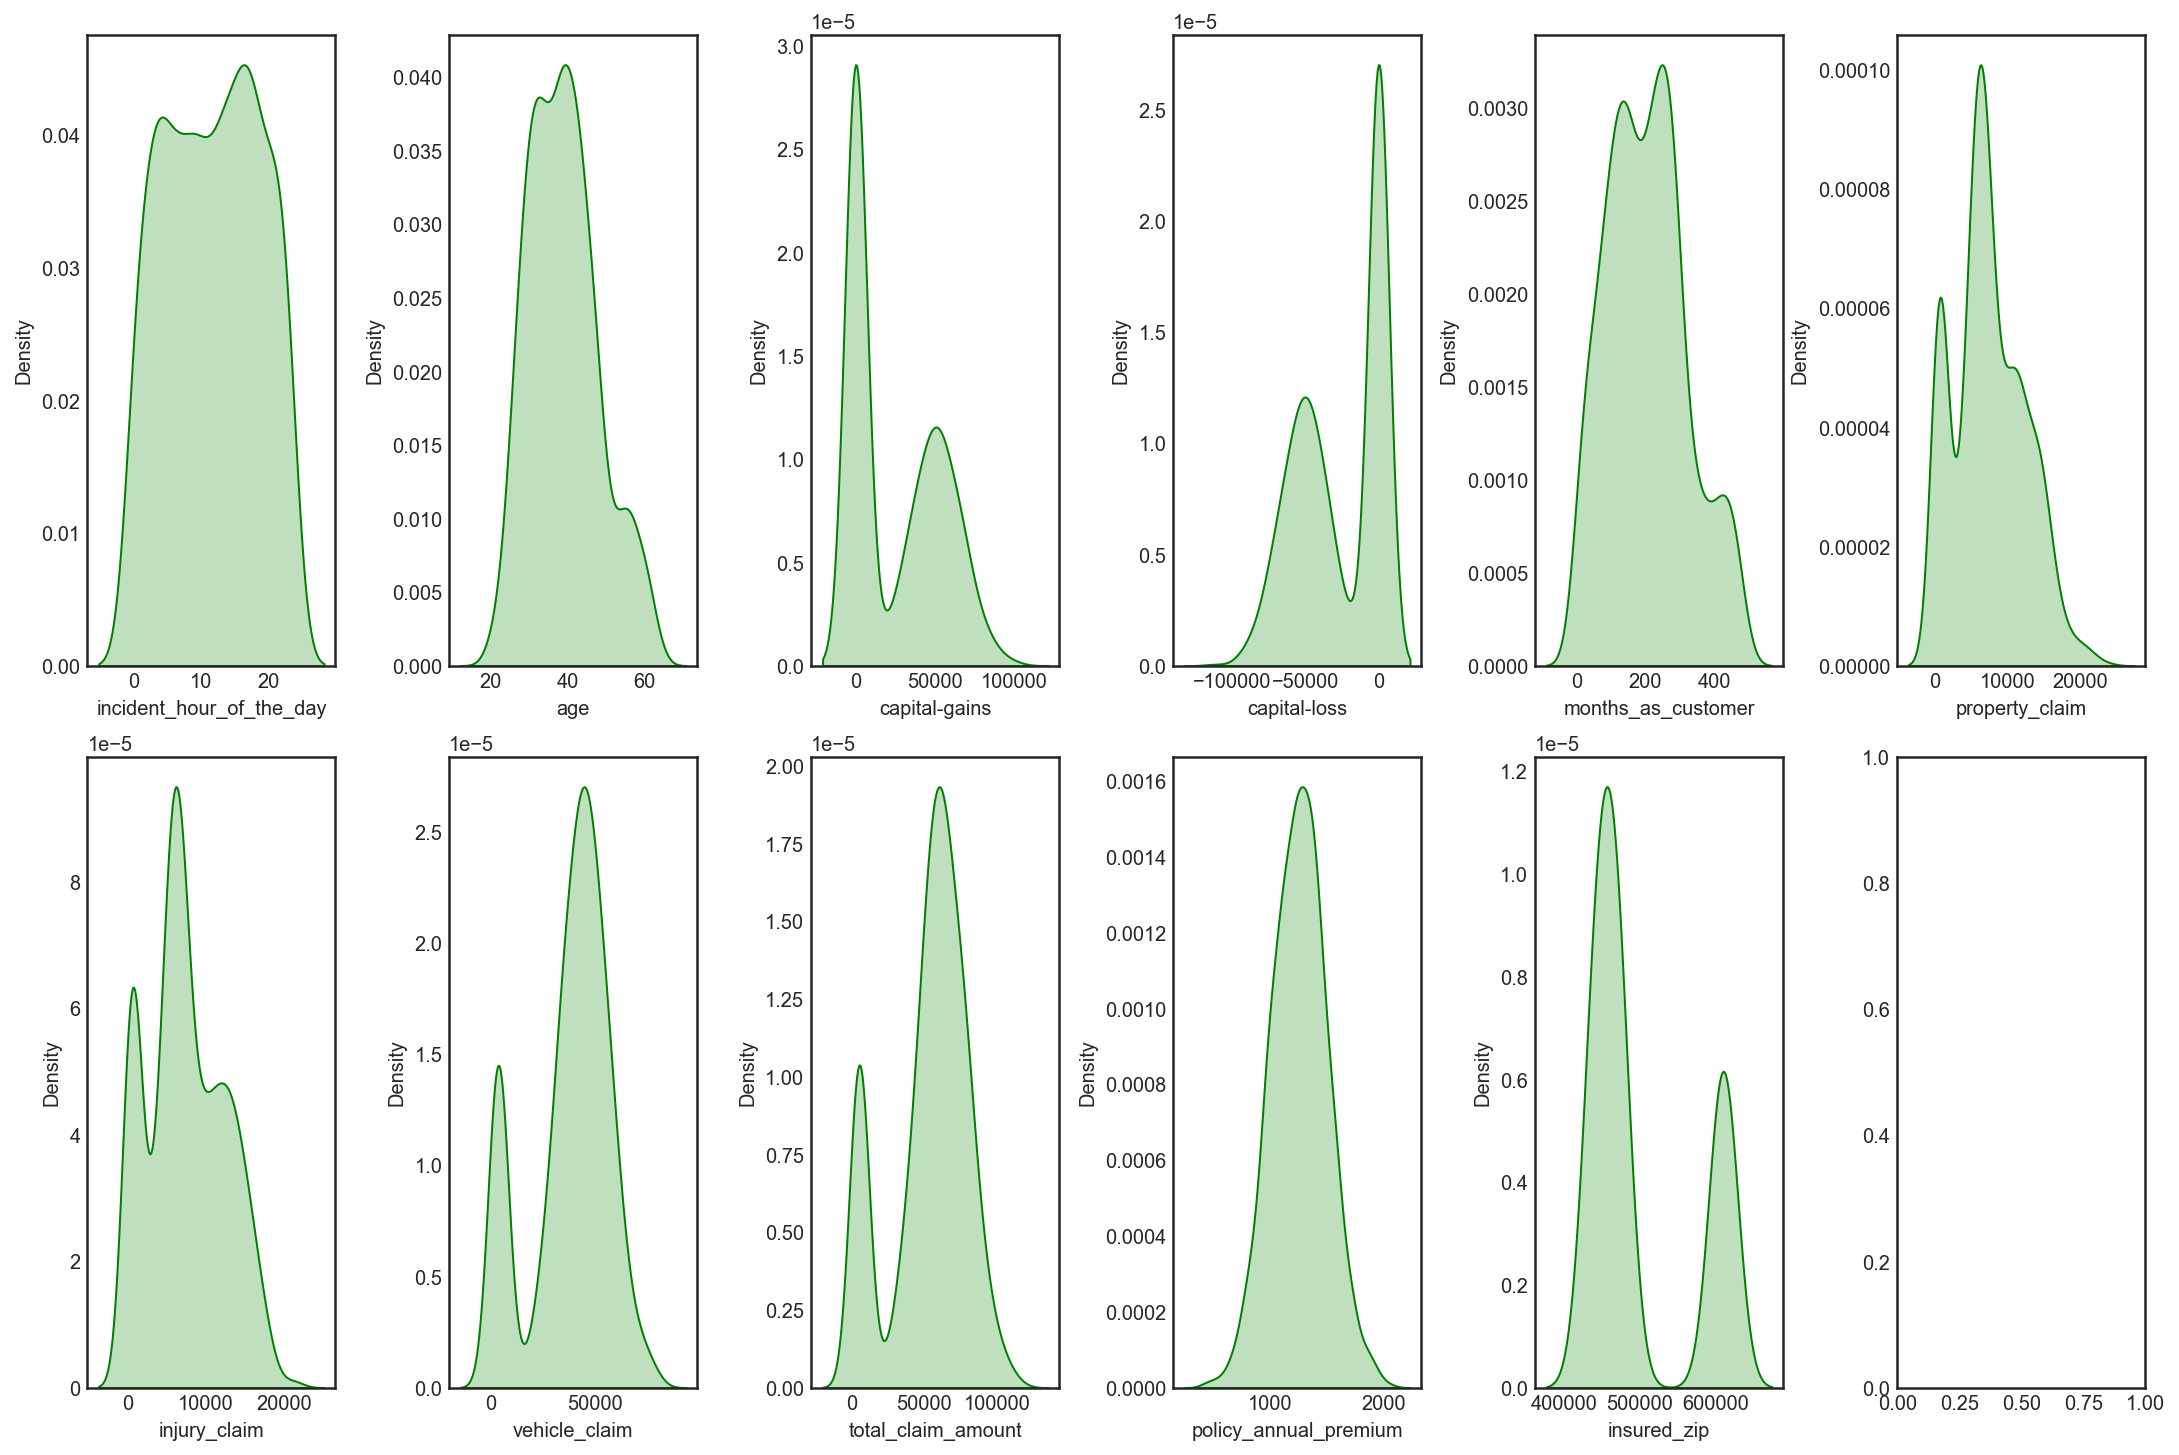

In [50]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Using Z Score to remove outliers

In [51]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


# Using Log Transform to fix skewness

In [52]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# Correlation Bar Plot comparing features with our label

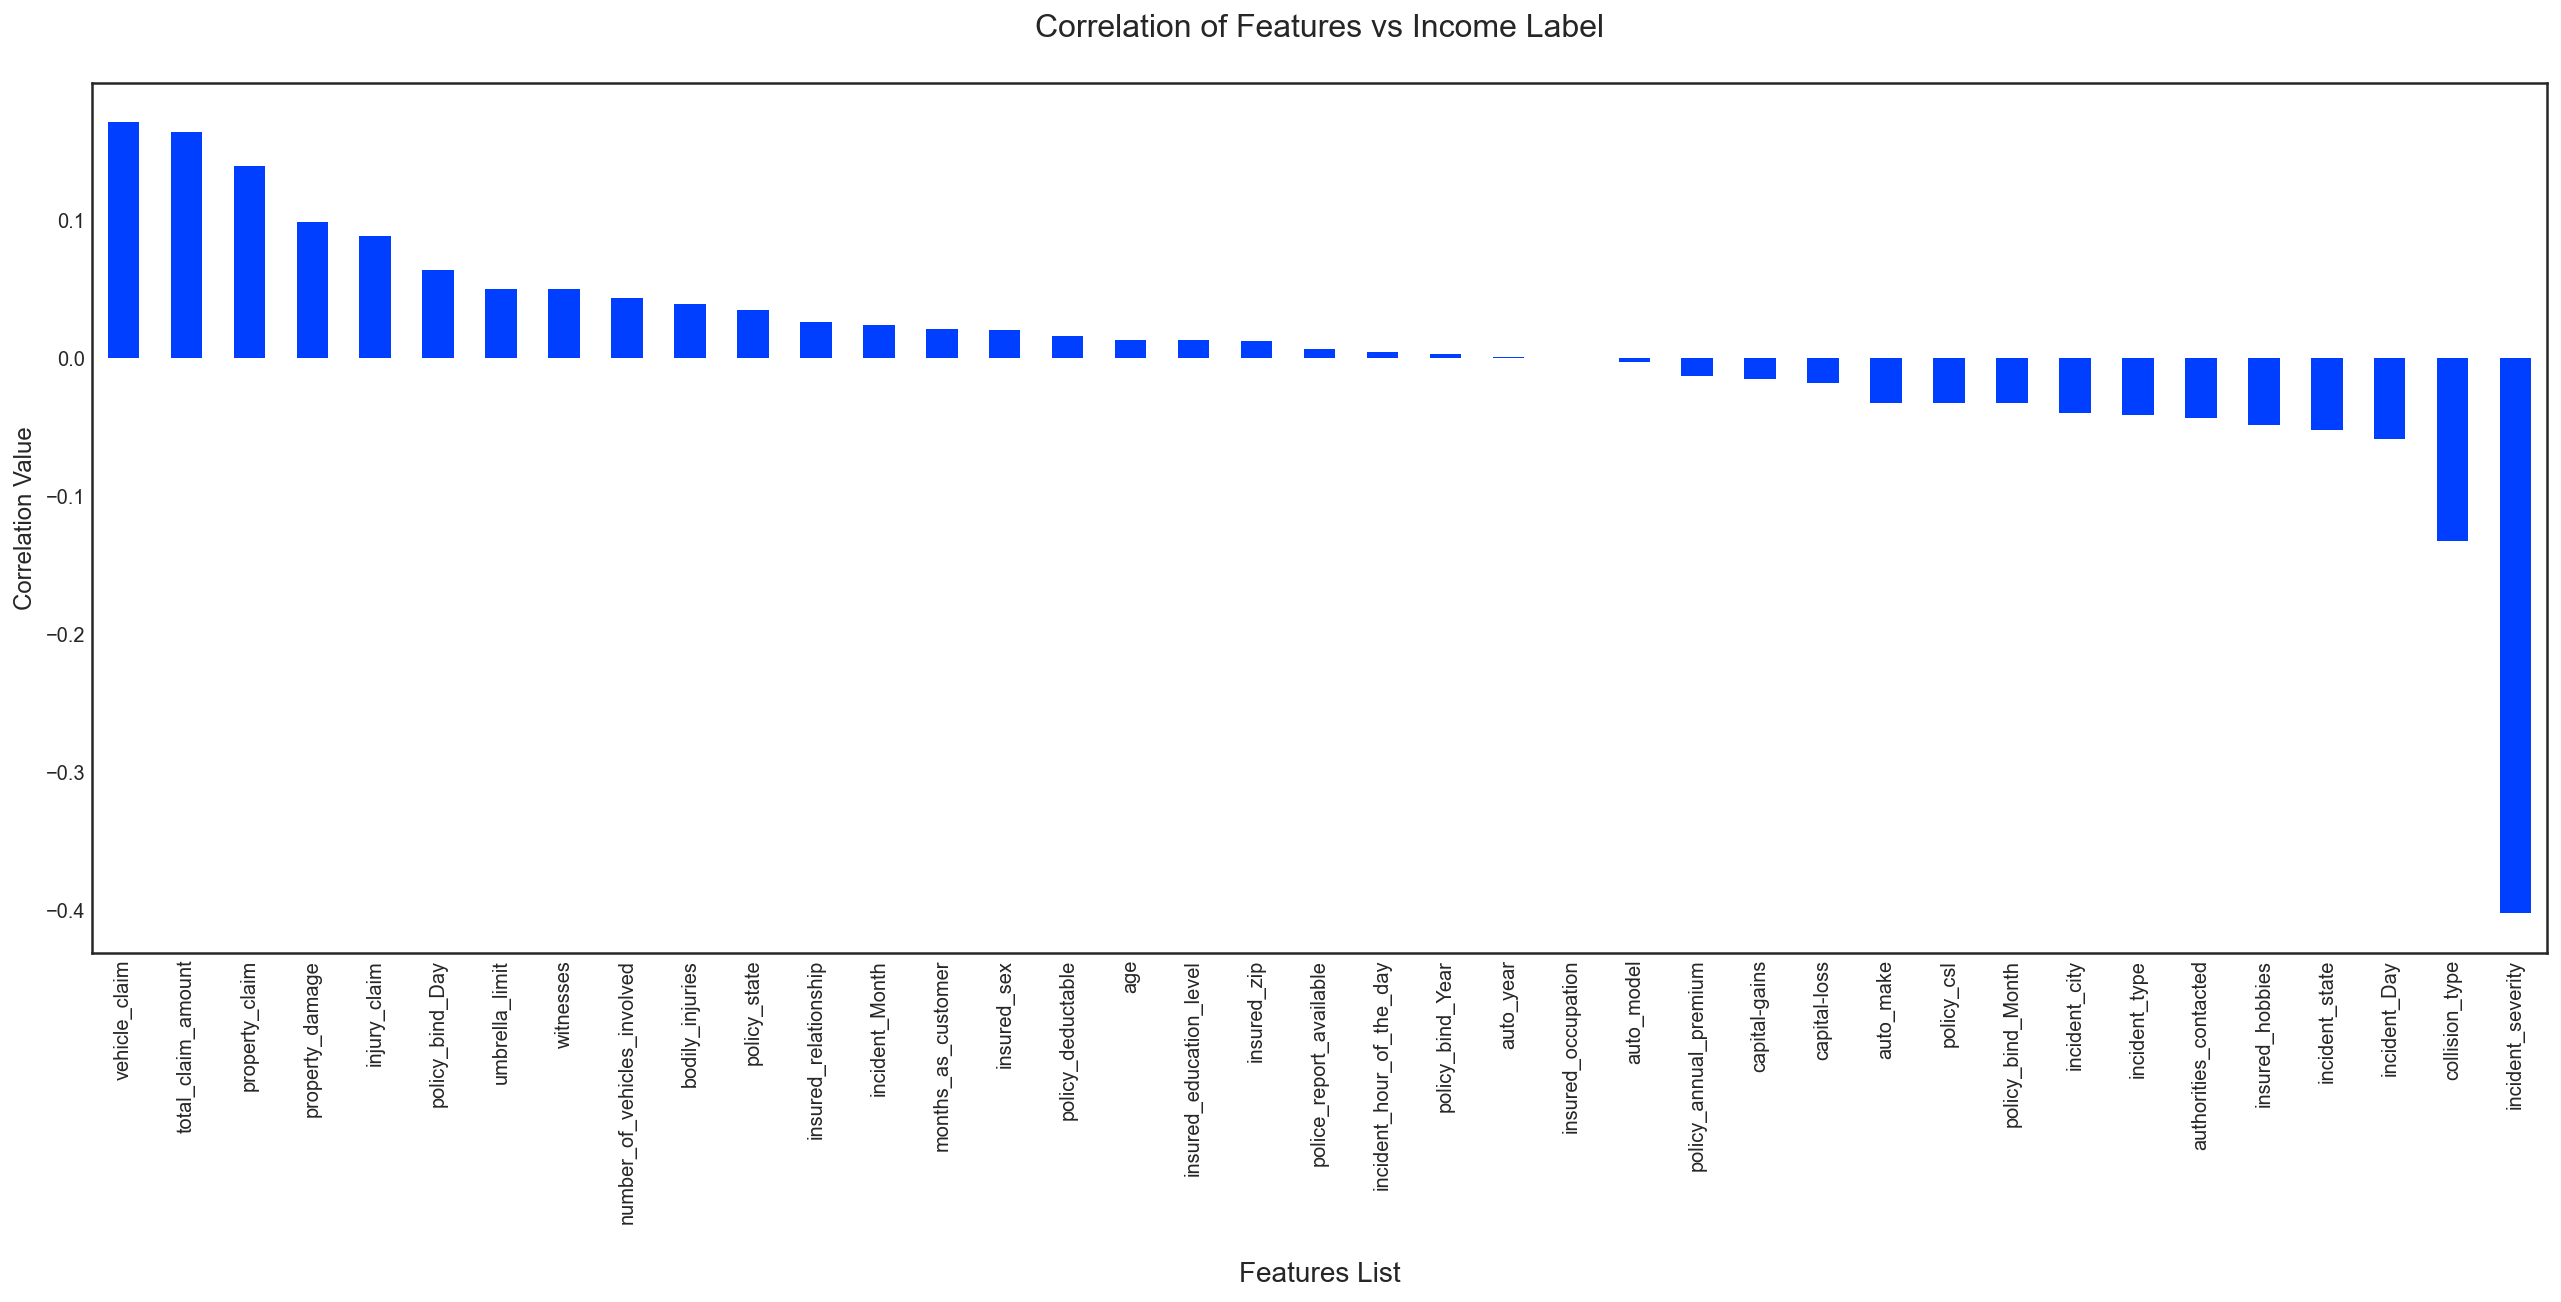

In [53]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(22,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [54]:
#The above chart more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.

In [55]:
df.dropna(inplace=True)

#to make sure there are no null values.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [56]:
X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

In [57]:
Y.value_counts() #Checking for Class Imbalance

0    739
1    240
Name: fraud_reported, dtype: int64

In [58]:
#resolving class Imbalance using SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [59]:
Y.value_counts()

0    739
1    739
Name: fraud_reported, dtype: int64

# Feature Scaling

In [60]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.108538  1.047811      1.226063    0.079144          -0.238796   
1            0.190687  0.355516     -0.055213    0.079144           1.487159   
2           -0.672093 -1.144457      1.226063   -1.246715           1.487159   
3            0.447685  0.240133     -1.336490    0.079144           1.487159   
4            0.190687  0.586281     -1.336490    1.405002          -0.238796   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.658903       -0.537403    -0.512089     1.141503   
1              -0.258180        2.134224    -0.477431     1.141503   
2               0.686150        2.134224    -1.139545    -1.000408   
3               0.697521        2.165803     1.594075    -1.000408   
4               1.433015        2.165803     1.627726     1.141503   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.541926           -1.212981         1.404371   
1                 0.541926           -0.163447         1.032347   
2                 1.628689            1.148471        -1.385811   
3                 1.628689           -1.475364        -1.385811   
4                -1.631600            1.148471        -1.385811   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.530434       1.030458      0.955502       0.865320   
1             -0.264557      -0.899292      0.955502       1.850466   
2              0.368382       0.371519      0.955502      -1.104971   
3              1.001321       0.871154     -1.298852       0.865320   
4              1.001321       1.490267     -0.706362       1.850466   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        0.698671          -1.055256               1.297492        0.416720   
1        1.721885           0.038047               1.297492        0.909897   
2       -0.324543           0.038047               1.297492       -1.062808   
3       -1.347757          -1.055256               1.297492       -0.569632   
4        1.721885           0.038047              -0.100279       -1.062808   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      -1.002782                 -0.990525                    -0.832041   
1       1.080027                 -0.528697                    -0.832041   
2      -1.002782                 -0.682639                     1.254060   
3      -1.523484                 -0.990525                    -0.832041   
4      -1.523484                  1.318617                    -0.832041   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0        -0.094896         0.105801   0.576821                 0.019769   
1         1.182590        -1.145186  -1.330430                 1.288726   
2        -1.372383         1.356787   1.530446                -1.249188   
3         1.182590         0.105801   0.576821                -1.249188   
4        -1.372383        -1.145186  -0.376805                -1.249188   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.679229     -0.232929        1.150906       0.707686   0.934642   
1           -1.996367     -1.482428       -1.487358      -2.015756   0.407465   
2           -0.806945      0.026565       -0.825637      -0.917295  -0.646890   
3            0.349103     -0.270000       -0.288931       0.631427  -0.910479   
4           -1.938866     -1.369036       -1.515379      -1.957440  -1.701245   

   auto_model  auto_year  policy_bind_Day  policy_bind_Month  \
0   -1.725226  -0.187792         0.165145           1.154753   
1   -0.678880   0.345288         1.357542          -0.102966   
2    1.033323   0.345288        -0.788773          -0.102966   
3    1.413812   1.589142         1.119062          -0.417396   
4    1.128445   0.700675        -1.146492          -0.102966   

   policy_bind_Year  i

# Finding best random state for building our Classification Models

In [61]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.27027027027027 on Random State 683


# Feature importance bar graph

In [62]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                               
incident_severity                 0.212
property_damage                   0.050
insured_hobbies                   0.041
insured_zip                       0.038
collision_type                    0.033
policy_csl                        0.029
insured_sex                       0.029
vehicle_claim                     0.028
injury_claim                      0.026
incident_state                    0.025
total_claim_amount                0.025
insured_occupation                0.025
property_claim                    0.024
months_as_customer                0.023
policy_annual_premium             0.022
incident_hour_of_the_day          0.022
auto_make                         0.021
authorities_contacted             0.020
auto_year                         0.020
insured_education_level           0.019
incident_Day                      0.019
policy_bind_Month                 0.019
auto_model                        0.019
incident_city                     0.019
policy_bind_Year                  0.018
policy_bind_Day                   0.018
umbrella_limit                    0.018
age                               0.017
insured_relationship              0.017
policy_deductable                 0.014
policy_state                      0.014
capital-gains                     0.014
capital-loss                      0.012
police_report_available           0.012
incident_Month                    0.010
incident_type                     0.009
number_of_vehicles_involved       0.007
witnesses                         0.006
bodily_injuries                   0.006

# Machine Learning Model for Classification with Evaluation Metrics

In [63]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=213)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [64]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       170
           1       0.80      0.82      0.81       200

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370

Accuracy Score: 78.91891891891892
Cross Validation Score: 73.88960146587264

Accuracy Score - Cross Validation Score is 5.029317453046275


In [65]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       170
           1       0.92      0.86      0.89       200

    accuracy                           0.88       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.88      0.88       370

Accuracy Score: 88.37837837837837
Cross Validation Score: 85.93678424186898

Accuracy Score - Cross Validation Score is 2.4415941365093943


In [66]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       170
           1       0.87      0.91      0.89       200

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

Accuracy Score: 87.29729729729729
Cross Validation Score: 81.19972514887769

Accuracy Score - Cross Validation Score is 6.0975721484196015


In [67]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       170
           1       0.94      0.88      0.90       200

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

Accuracy Score: 90.0
Cross Validation Score: 86.20911589555658

Accuracy Score - Cross Validation Score is 3.790884104443421


In [68]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.14      0.24       170
           1       0.58      0.99      0.73       200

    accuracy                           0.60       370
   macro avg       0.77      0.57      0.48       370
weighted avg       0.75      0.60      0.50       370

Accuracy Score: 60.0
Cross Validation Score: 56.633531836921655

Accuracy Score - Cross Validation Score is 3.366468163078345


In [69]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       170
           1       0.94      0.92      0.93       200

    accuracy                           0.92       370
   macro avg       0.92      0.93      0.92       370
weighted avg       0.92      0.92      0.92       370

Accuracy Score: 92.43243243243244
Cross Validation Score: 90.06000916170407

Accuracy Score - Cross Validation Score is 2.372423270728362


In [70]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       170
           1       0.94      0.94      0.94       200

    accuracy                           0.93       370
   macro avg       0.93      0.93      0.93       370
weighted avg       0.93      0.93      0.93       370

Accuracy Score: 93.24324324324324
Cross Validation Score: 86.54557947778287

Accuracy Score - Cross Validation Score is 6.697663765460376


In [71]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       170
           1       0.94      0.92      0.93       200

    accuracy                           0.92       370
   macro avg       0.92      0.92      0.92       370
weighted avg       0.92      0.92      0.92       370

Accuracy Score: 92.43243243243244
Cross Validation Score: 86.95052679798442

Accuracy Score - Cross Validation Score is 5.481905634448012


# Hyper parameter tuning on the best Regression ML Model

In [72]:
#Choosing Extra Tree Classifier as my best model for tuning since the Accuracy score and Cross Validation score even though Accuracy score is good in XGB Classifier.

In [73]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

In [74]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [75]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [76]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 500,
 'n_jobs': -2,
 'random_state': 213}

In [77]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.37837837837837


# AUC ROC Curve

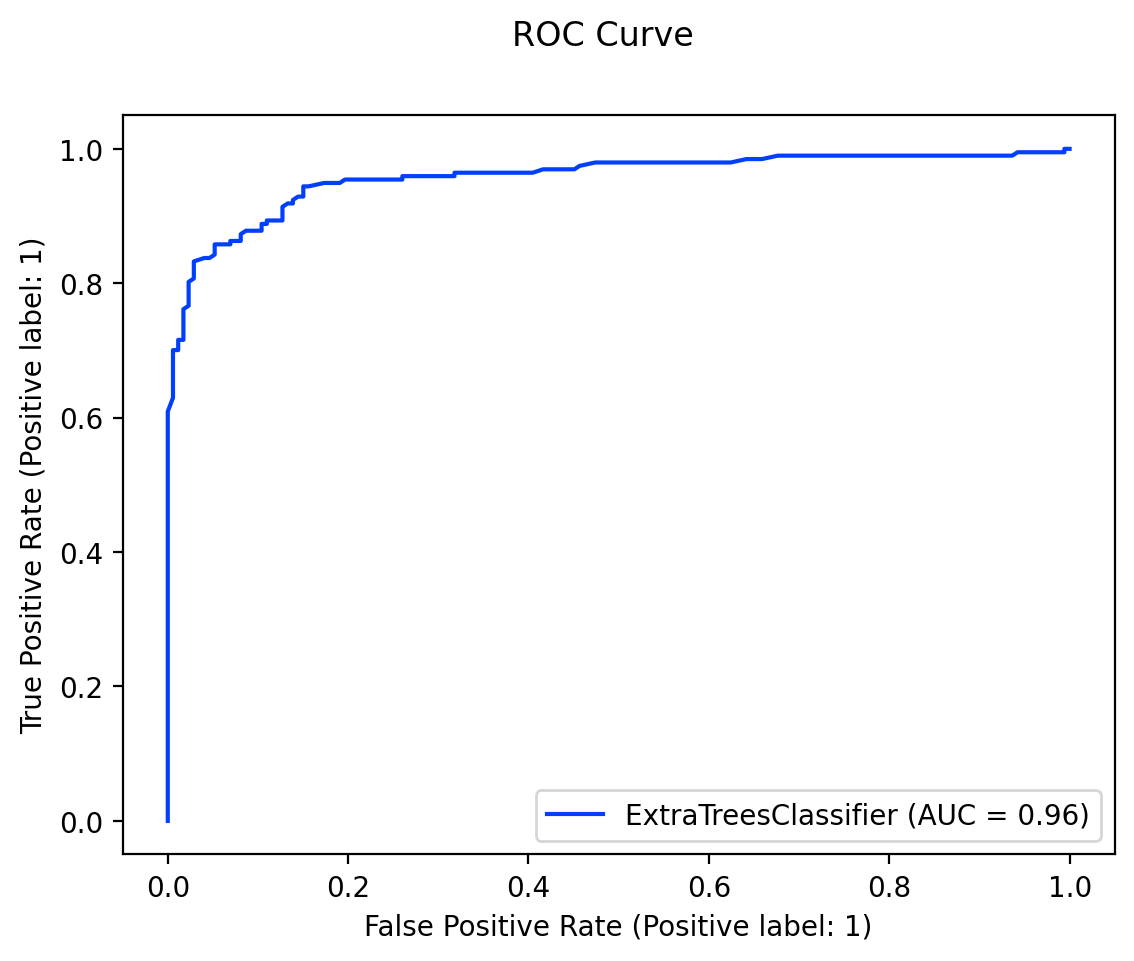

In [80]:
from sklearn import metrics
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Confusion Matrix

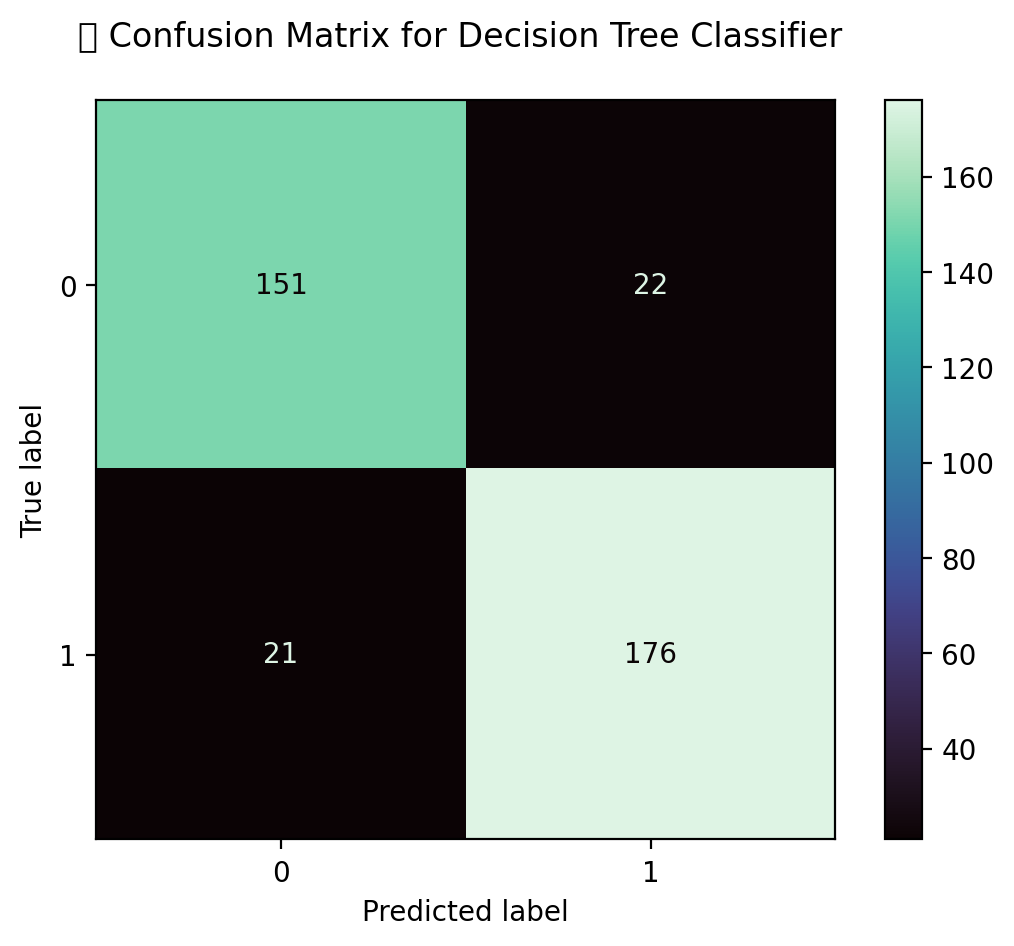

In [81]:
from sklearn import metrics
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()